# Setting up the Notebook

In [7]:
# Things to import

# Standard tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import re

# PCA
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Statistical tools
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import scipy
import pingouin as pg

# ML tools
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Initial Data Importing and Organization

In [8]:
# Reading in the data frame

df=pd.read_excel('Aging Wisely Data Columns Renamed.xlsx')

In [9]:
# Columns

df.columns
# print(len(df.columns))

Index(['Case Number', 'Dem: Age', 'Dem: Gender', 'Dem: Marital Status',
       'Dem: Ethnicity', 'Dem: Socio-Economic Staus',
       'Dem: Residential Status', 'Dem: Religious Upbringing', 'Gratitude: SF',
       'Gratitude: BG', 'Gratitude: Average',
       'Active Habits: Physical, Mental, Social: SF',
       'Active Habits: Physical, Mental, Social: BG',
       'Active Habits: Physical, Mental, Social: Average',
       'Purpose, Meaning: SF', 'Purpose, Meaning: BG',
       'Purpose, Meaning: Average',
       'Resilience (including post-traumatic growth): SF',
       'Resilience (including post-traumatic growth): BG',
       'Resilience (including post-traumatic growth): Average',
       'Self-Acceptance, Self-Esteem: SF', 'Self-Acceptance, Self-Esteem: BG',
       'Self-Acceptance, Self-Esteem: Average', 'Generativity: SF',
       'Generativity: BG', 'Generativity: Average', 'Keeper of Meaning: SF',
       'Keeper of Meaning: BG', 'Keeper of Meaning: Average',
       'Ego Integrity:

## Organizing columns

In [10]:
# Demographic Variables
dem_vars=['Dem: Age', 'Dem: Gender', 'Dem: Marital Status', 'Dem: Ethnicity', 'Dem: Socio-Economic Status',
         'Dem: Residential Status', 'Dem: Religious Upbringing']

# Meta factors
meta_factors=['Gratitude: SF','Gratitude: BG', 'Gratitude: Average',
              'Active Habits: Physical, Mental, Social:SF',
       'Active Habits: Physical, Mental, Social: BG',
       'Active Habits: Physical, Mental, Social: Average',
       'Purpose, Meaning: SF', 'Purpose, Meaning: BG',
       'Purpose, Meaning: Average',
       'Resilience (including post-traumatic growth): SF',
       'Resilience (including post-traumatic growth): BG',
       'Resilience (including post-traumatic growth): Average',
       'Self-Acceptance, Self-Esteem: SF', 'Self-Acceptance, Self-Esteem: BG',
       'Self-Acceptance, Self-Esteem: Average']

meta_factors_sf=['Gratitude: SF', 'Active Habits: Physical, Mental, Social: SF',
                 'Purpose, Meaning: SF', 'Resilience (including post-traumatic growth): SF',
                 'Self-Acceptance, Self-Esteem: SF']

meta_factors_bg=['Gratitude: BG', 'Active Habits: Physical, Mental, Social: BG',
                 'Purpose, Meaning: BG', 'Resilience (including post-traumatic growth): BG',
                 'Self-Acceptance, Self-Esteem: BG']

meta_factors_avg=['Gratitude: Average', 'Active Habits: Physical, Mental, Social: Average',
                 'Purpose, Meaning: Average', 'Resilience (including post-traumatic growth): Average',
                 'Self-Acceptance, Self-Esteem: Average']

# Elder Developmental Tasks
elder_dev_tasks=['Generativity: SF',
       'Generativity: BG', 'Generativity: Average', 'Keeper of Meaning: SF',
       'Keeper of Meaning: BG', 'Keeper of Meaning: Average',
       'Ego Integrity: SF', 'Ego Integrity: BG', 'Ego Integrity: Average']

elder_dev_tasks_sf=['Generativity: SF', 'Keeper of Meaning: SF',
                    'Ego Integrity: SF']

elder_dev_tasks_bg=['Generativity: BG', 'Keeper of Meaning: BG',
                    'Ego Integrity: BG']

elder_dev_tasks_avg=['Generativity: Average', 'Keeper of Meaning: Average',
                    'Ego Integrity: Average']


# Controllable Protective Factors
cont_pred_factors=['Controllable Protective Factors: Only factor that goes up to 7: SF',
       'Controllable Protective Factors: Only factor that goes up to 7: BG',
       'Controllable Protective Factors: Only factor that goes up to 7: Average']

cont_pred_factors_sf=['Controllable Protective Factors: Only factor that goes up to 7: SF']

cont_pred_factors_bg=['Controllable Protective Factors: Only factor that goes up to 7: BG']

cont_pred_factors_avg=['Controllable Protective Factors: Only factor that goes up to 7: Average']

# Other
other=['Reliable Attachment Figure(s): SF',
       'Reliable Attachment Figure(s): BG',
       'Reliable Attachment Figure(s): Average', 'Healthy Grieving: SF',
       'Healthy Grieving: BG', 'Healthy Grieving: Average',
       'Sense of Humor: SF', 'Sense of Humor: BG', 'Sense of Humor: Average',
       'Tragic Optimism (realistic but hopeful): SF',
       'Tragic Optimism (realistic but hopeful): BG',
       'Tragic Optimism (realistic but hopeful): Average']

other_sf=['Reliable Attachment Figure(s): SF', 'Healthy Grieving: SF',
          'Sense of Humor: SF', 'Tragic Optimism (realistic but hopeful): SF']

other_bg=['Reliable Attachment Figure(s): BG', 'Healthy Grieving: BG',
          'Sense of Humor: BG', 'Tragic Optimism (realistic but hopeful): BG']

other_avg=['Reliable Attachment Figure(s): Average', 'Healthy Grieving: Average',
          'Sense of Humor: Average', 'Tragic Optimism (realistic but hopeful): Average']

# Interview Presentation Variables
interview_pres_vars=['Mood: SF','Mood: BG', 'Mood: Average', 'Anxiety: SF', 'Anxiety: BG',
       'Anxiety: Average', 'Energy: SF', 'Energy: BG', 'Energy: Average',
       'Cognitive: SF', 'Cognitive: BG', 'Cognitive: Average',
       'Engagement: SF', 'Engagement: BG', 'Engagement: Average', 'Candor: SF',
       'Candor: BG', 'Candor: Average', 'Open System: SF', 'Open System: BG',
       'Open System: Average', 'Narrative Coherence: SF',
       'Narrative Coherence: BG', 'Narrative Coherence: Average',
       'Transparency: SF', 'Transparency: BG', 'Transparency: Average',
       'Youthfulness: SF', 'Youthfulness: BG', 'Youthfulness: Average']

interview_pres_vars_sf=['Mood: SF', 'Anxiety: SF', 'Energy: SF',
                        'Cognitive: SF', 'Engagement: SF', 'Candor: SF',
                        'Open System: SF', 'Narrative Coherence: SF',
                        'Transparency: SF', 'Youthfulness: SF']

interview_pres_vars_bg=['Mood: BG', 'Anxiety: BG', 'Energy: BG',
                        'Cognitive: BG', 'Engagement: BG', 'Candor: BG',
                        'Open System: BG', 'Narrative Coherence: BG',
                        'Transparency: BG', 'Youthfulness: BG']

interview_pres_vars_avg=['Mood: Average', 'Anxiety: Average', 'Energy: Average',
                        'Cognitive: Average', 'Engagement: Average', 'Candor: Average',
                        'Open System: Average', 'Narrative Coherence: Average',
                        'Transparency: Average', 'Youthfulness: Average']

# Elder Identity Revision
eir=['Control: SF', 'Control: BG', 'Control: Average', 'Competence: SF',
       'Competence: BG', 'Competence: Average', 'Continuity: SF',
       'Continuity: BG', 'Continuity: Average', 'Consciousness: SF',
       'Consciousness: BG', 'Consciousness: Average', 'Connection: SF',
       'Connection: BG', 'Connection: Average']

eir_sf=['Control: SF', 'Competence: SF', 'Continuity: SF', 'Consciousness: SF',
    'Connection: SF']

eir_bg=['Control: BG', 'Competence: BG', 'Continuity: BG', 'Consciousness: BG',
    'Connection: BG']

eir_avg=['Control: Average', 'Competence: Average', 'Continuity: Average', 'Consciousness: Average',
    'Connection: Average']


# Global Clinical Impression
gci=['GCI: SF', 'GCI: BG', 'GCI: Average']

gci_sf=['GCI: SF']

gci_bg=['GCI: BG']

gci_avg=['GCI: Average']


# Meta-Factor Total
meta_score=['Meta-Factor Total']


# All Averages in one list
all_averages=['Gratitude: Average', 'Active Habits: Physical, Mental, Social: Average',
                 'Purpose, Meaning: Average', 'Resilience (including post-traumatic growth): Average',
                 'Self-Acceptance, Self-Esteem: Average',
             'Generativity: Average', 'Keeper of Meaning: Average',
                    'Ego Integrity: Average',
             'Controllable Protective Factors: Only factor that goes up to 7: Average',
             'Reliable Attachment Figure(s): Average', 'Healthy Grieving: Average',
          'Sense of Humor: Average', 'Tragic Optimism (realistic but hopeful): Average',
             'Mood: Average', 'Anxiety: Average', 'Energy: Average',
                        'Cognitive: Average', 'Engagement: Average', 'Candor: Average',
                        'Open System: Average', 'Narrative Coherence: Average',
                        'Transparency: Average', 'Youthfulness: Average',
             'Control: Average', 'Competence: Average', 'Continuity: Average', 'Consciousness: Average',
    'Connection: Average']

# All non-meta-factor averages in one list
non_meta_factor_averages=['Generativity: Average', 'Keeper of Meaning: Average',
                    'Ego Integrity: Average',
             'Controllable Protective Factors: Only factor that goes up to 7: Average',
             'Reliable Attachment Figure(s): Average', 'Healthy Grieving: Average',
          'Sense of Humor: Average', 'Tragic Optimism (realistic but hopeful): Average',
             'Mood: Average', 'Anxiety: Average', 'Energy: Average',
                        'Cognitive: Average', 'Engagement: Average', 'Candor: Average',
                        'Open System: Average', 'Narrative Coherence: Average',
                        'Transparency: Average', 'Youthfulness: Average',
             'Control: Average', 'Competence: Average', 'Continuity: Average', 'Consciousness: Average',
    'Connection: Average']

In [11]:
print('Number of Factors in Total:',len(dem_vars)+len(meta_factors)+len(elder_dev_tasks)+len(cont_pred_factors)+len(other)+len(interview_pres_vars)
     +len(eir)+len(gci)+1)
print('Number of Meta-Factors:',len(meta_factors))
print('Number of Averaged Factors (What we will use):',len(all_averages))

Number of Factors in Total: 95
Number of Meta-Factors: 15
Number of Averaged Factors (What we will use): 28


In [12]:
# Scaling the Likert 1-7 column into 1-5

for col in cont_pred_factors:
    df[col] = df[col].apply(lambda x: (x-1)*(2/3)+1)
    
print('Confirming our Controllable Protective Factors has been properly scaled.')
df[cont_pred_factors[0]][0:5]

Confirming our Controllable Protective Factors has been properly scaled.


0    4.333333
1    3.666667
2    2.333333
3    4.333333
4    2.333333
Name: Controllable Protective Factors: Only factor that goes up to 7: SF, dtype: float64

In [13]:
# Scaling the Meta_score 5-25 column into 1-5

for col in meta_score:
    df[col] = df[col].apply(lambda x: x/5)
    
print('Confirming our Meta-Factor Total has been properly scaled.')
df['Meta-Factor Total'][0:5]

Confirming our Meta-Factor Total has been properly scaled.


0    4.2
1    4.0
2    2.6
3    4.4
4    2.4
Name: Meta-Factor Total, dtype: float64

Confirming our Age has been properly scaled.


0    4.407407
1    2.481481
2    4.111111
3    3.074074
4    2.481481
Name: Dem: Age, dtype: float64

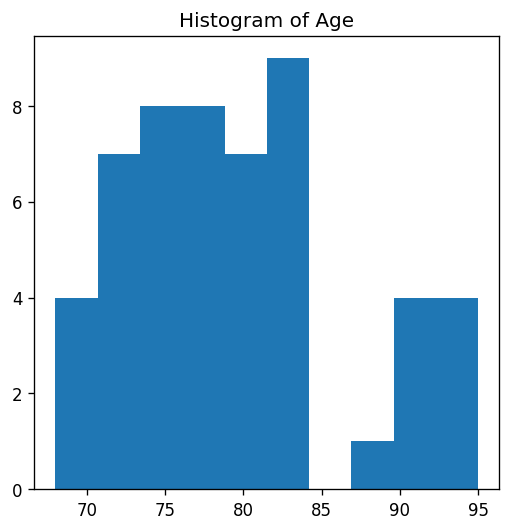

In [14]:
# Histogram of Age
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':120})
plt.hist(df['Dem: Age'])
plt.title('Histogram of Age')

# Converting Age to 1-5

# So, I need 1 to be 68 and 5 to be 95
df['Dem: Age'] = df['Dem: Age'].apply(lambda x: 1+(4/27)*(x-68))

print('Confirming our Age has been properly scaled.')
df['Dem: Age'][0:5]

## A Single Case Visualized

In [15]:
# We need to shorten the names to get everything to fit together

everything=all_averages.copy()
everything=everything+['GCI: Average']+['Meta-Factor Total']
short_names=[]
for name in everything:
    short_names.append(name[0:5])

In [16]:
# Confirming we get the data we want

df.iloc[0][all_averages+gci_avg+meta_score][0:5]

Gratitude: Average                                       5.0
Active Habits: Physical, Mental, Social: Average         4.5
Purpose, Meaning: Average                                3.5
Resilience (including post-traumatic growth): Average    4.0
Self-Acceptance, Self-Esteem: Average                    4.0
Name: 0, dtype: object

Text(0.5, 1.0, 'Case 1: Factors, Global Clinical Impression, and Composite Meta-Factor Score')

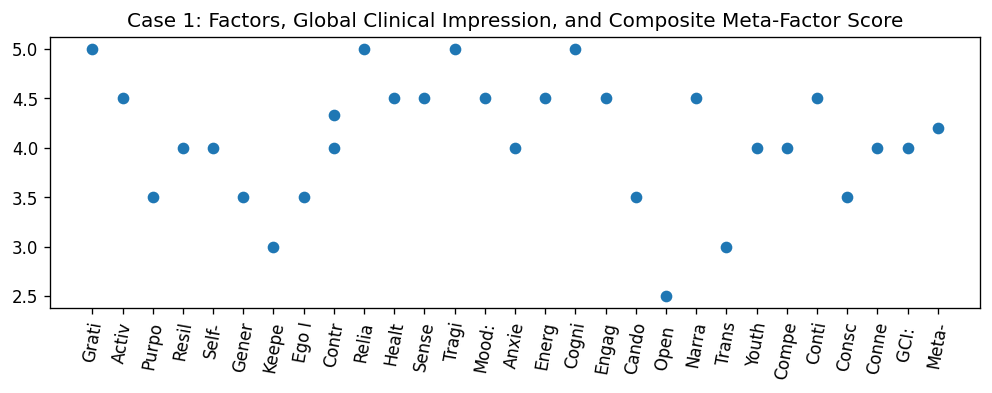

In [17]:
# Plotting

plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':120})
plt.scatter(short_names, df.iloc[0][all_averages+gci_avg+meta_score])
plt.xticks(rotation=80)
plt.title('Case 1: Factors, Global Clinical Impression, and Composite Meta-Factor Score')

# Data Visualization

## Plotting each factor versus the Global Clinical Impression

In [23]:
# Scatterplot Function

def scatter_plot(x_factor, y_factor):
    x=df[x_factor]
    y=df[y_factor]
    plt.figure(figsize=(4, 4), dpi=80)
    plt.scatter(x, y)
    plt.xlabel(x_factor)
    plt.ylabel(y_factor)
    plt.title(x_factor)
    plt.show()

### Meta-factors

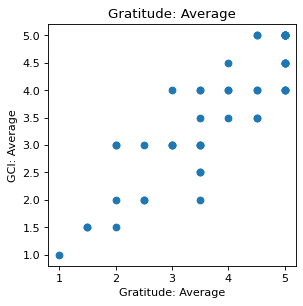

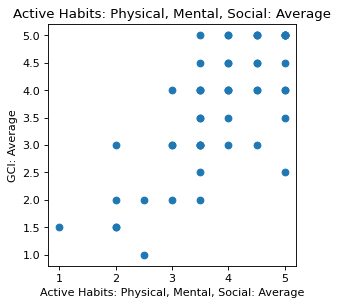

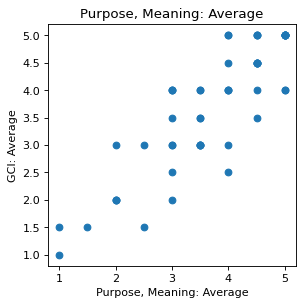

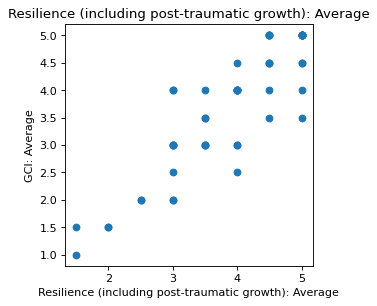

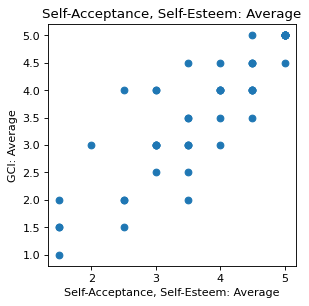

In [24]:
for col in meta_factors_avg:
    scatter_plot(col, 'GCI: Average')

### Elder Developmental Tasks

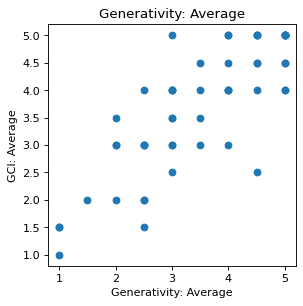

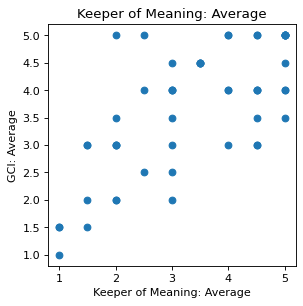

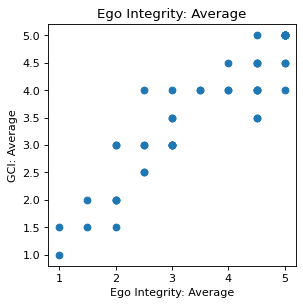

In [25]:
for col in elder_dev_tasks_avg:
    scatter_plot(col, 'GCI: Average')

### Controllable Protective Factors

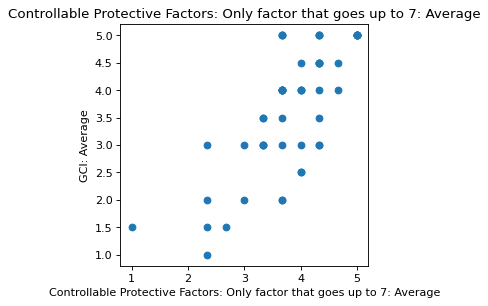

In [26]:
for col in cont_pred_factors_avg:
    scatter_plot(col, 'GCI: Average')

### Other

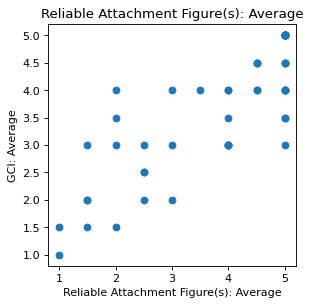

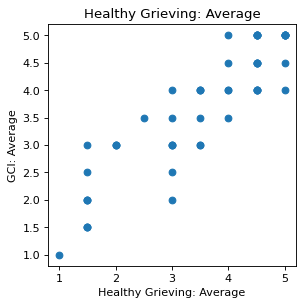

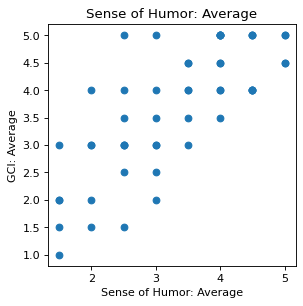

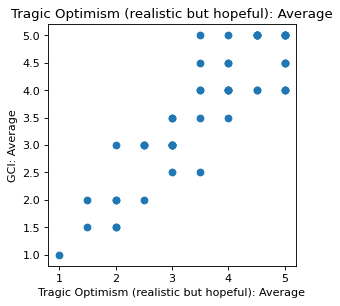

In [27]:
for col in other_avg:
    scatter_plot(col, 'GCI: Average')

### Interview Presentation Variables

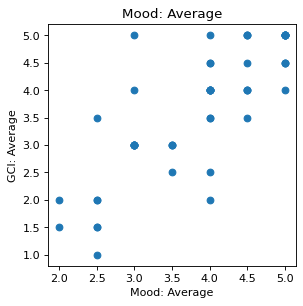

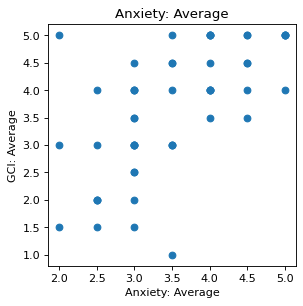

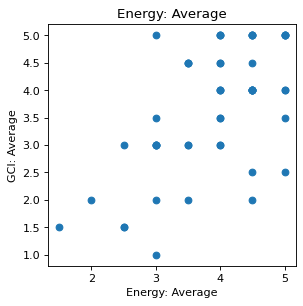

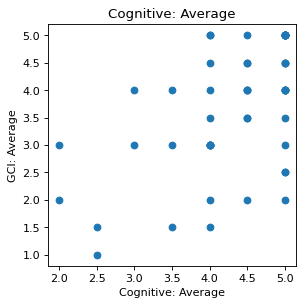

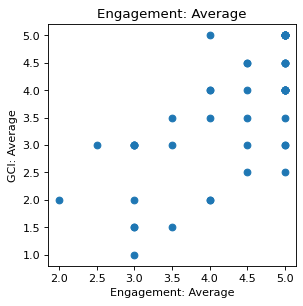

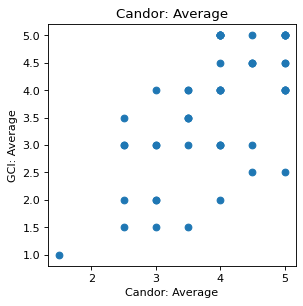

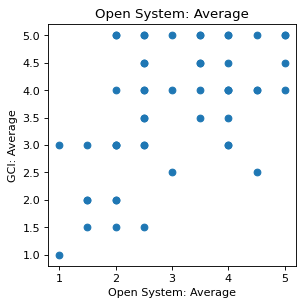

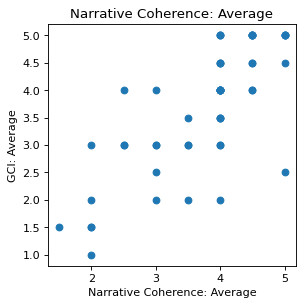

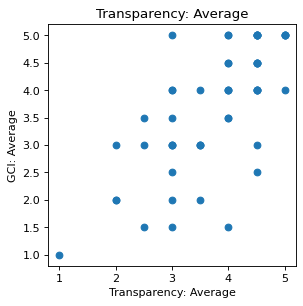

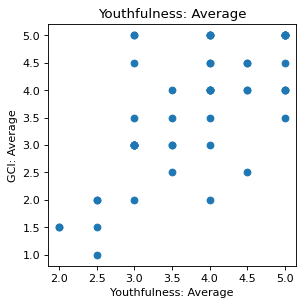

In [28]:
for col in interview_pres_vars_avg:
    scatter_plot(col, 'GCI: Average')

### Elder Identity Revision

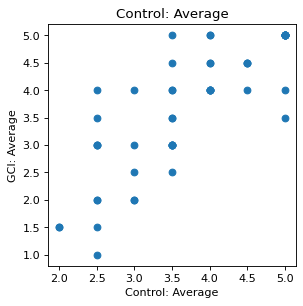

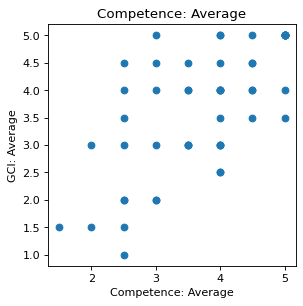

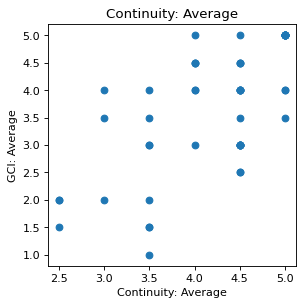

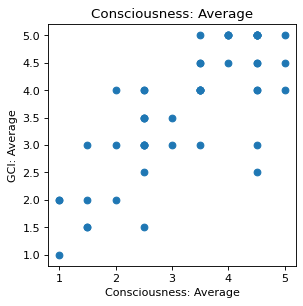

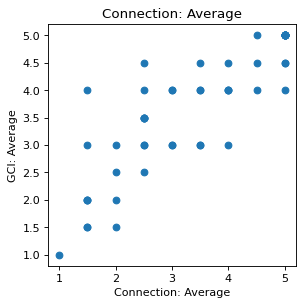

In [29]:
for col in eir_avg:
    scatter_plot(col, 'GCI: Average')
    plt.show()

From our plotting, we see that all of them show at roughly linear relationship, or at least, nothing terribly non-linear. The only ones to give pause are Open System and Anxiety. Thus, we will proceed with Linear Regression.  

## Plotting each non-meta-factor versus the Composite Meta-Factor

### Elder Developmental Tasks

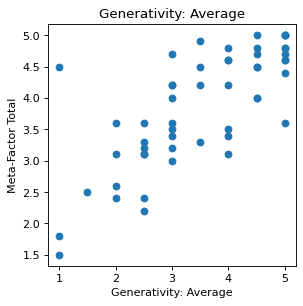

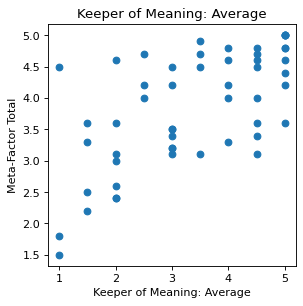

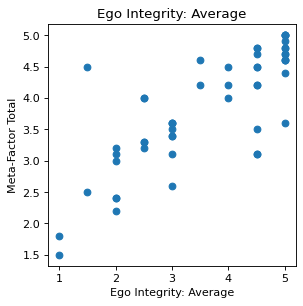

In [30]:
for col in elder_dev_tasks_avg:
    scatter_plot(col, 'Meta-Factor Total')
    plt.show()

### Controllable Protective Factors

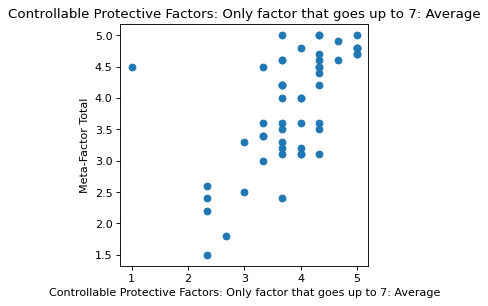

In [31]:
for col in cont_pred_factors_avg:
    scatter_plot(col, 'Meta-Factor Total')

### Other

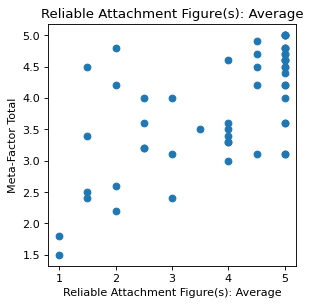

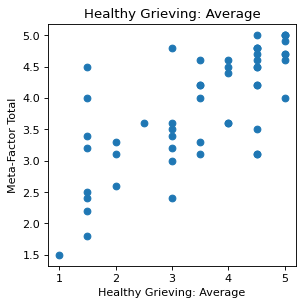

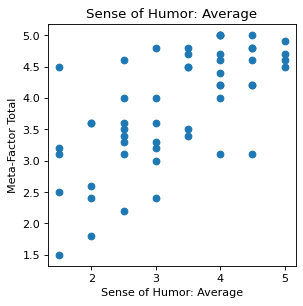

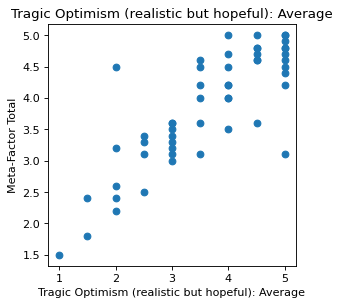

In [32]:
for col in other_avg:
    scatter_plot(col, 'Meta-Factor Total')

### Interview Presentation Variables

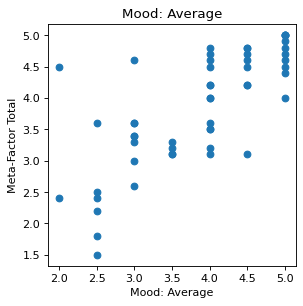

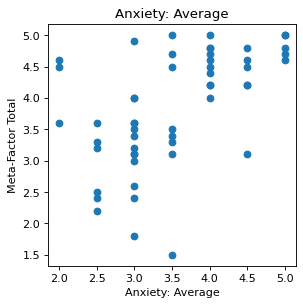

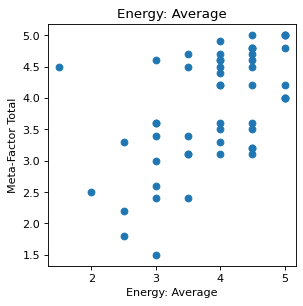

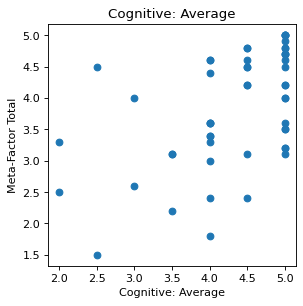

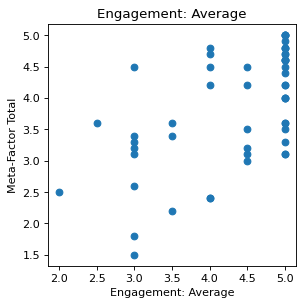

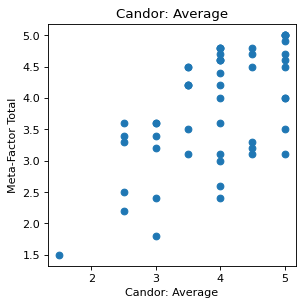

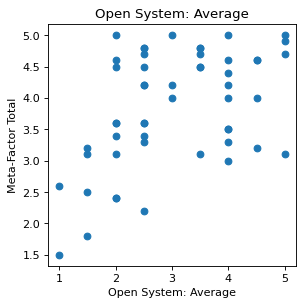

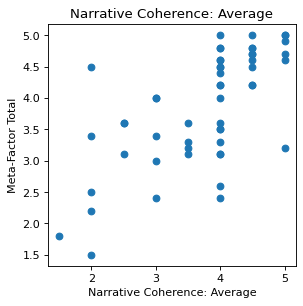

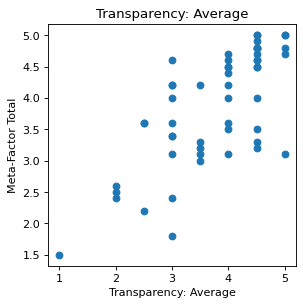

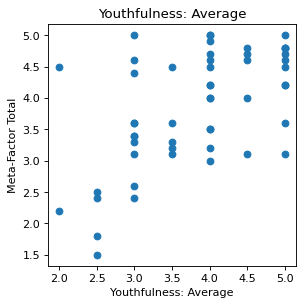

In [33]:
for col in interview_pres_vars_avg:
    scatter_plot(col, 'Meta-Factor Total')

### Elder Identity Revision

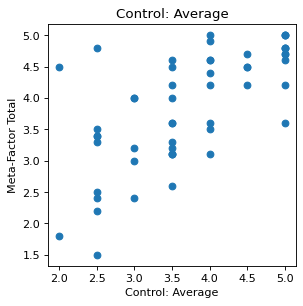

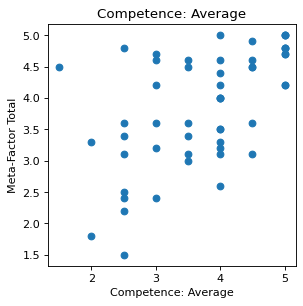

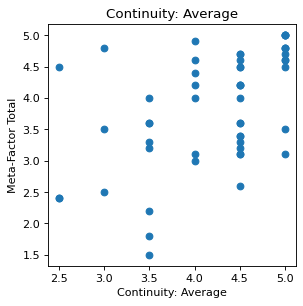

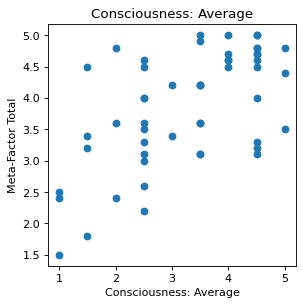

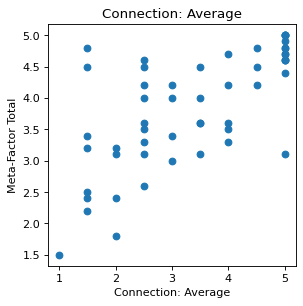

In [34]:
for col in eir_avg:
    scatter_plot(col, 'Meta-Factor Total')

From our plotting, we see that all of them show at roughly linear relationship, or at least, nothing terribly non-linear, though we see significantly more outlier-looking points with the Composite Meta-Factor.  

# Did the Investigators Score More Consistently Over Time?

To explore this, we will plot the difference between the two investigators' scores for all the variables.

In [35]:
def investigators_diff(inv1, inv2, label):
    if label == '':
        diffs=[]
        for i in range(len(inv1)):
            diff=inv1[i]-inv2[i]
            diffs.append(diff)
        plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':120})
        plt.plot(diffs)
        plt.axhline(y=0, color='black', linestyle='-')
        plt.xlabel('Sequence')
        plt.ylabel('Difference')
        plt.title(str(inv1.name)+' minus '+str(inv2.name))
        plt.show()
        
    if label != '':
        name=re.split(':',inv1.name) # Splitting the label along the ":" to use as the name of the line
        name=name[0] # Getting only the first in the list
        diffs=[]
        for i in range(len(inv1)):
            diff=inv1[i]-inv2[i]
            diffs.append(diff)
        plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':120})
        plt.plot(diffs, label=name)
        plt.axhline(y=0, color='black', linestyle='-')
        plt.xlabel('Sequence')
        plt.ylabel('Difference')
        plt.legend()
        plt.title("SF's Scores Minus BG's for "+label)   

## Meta-Factors

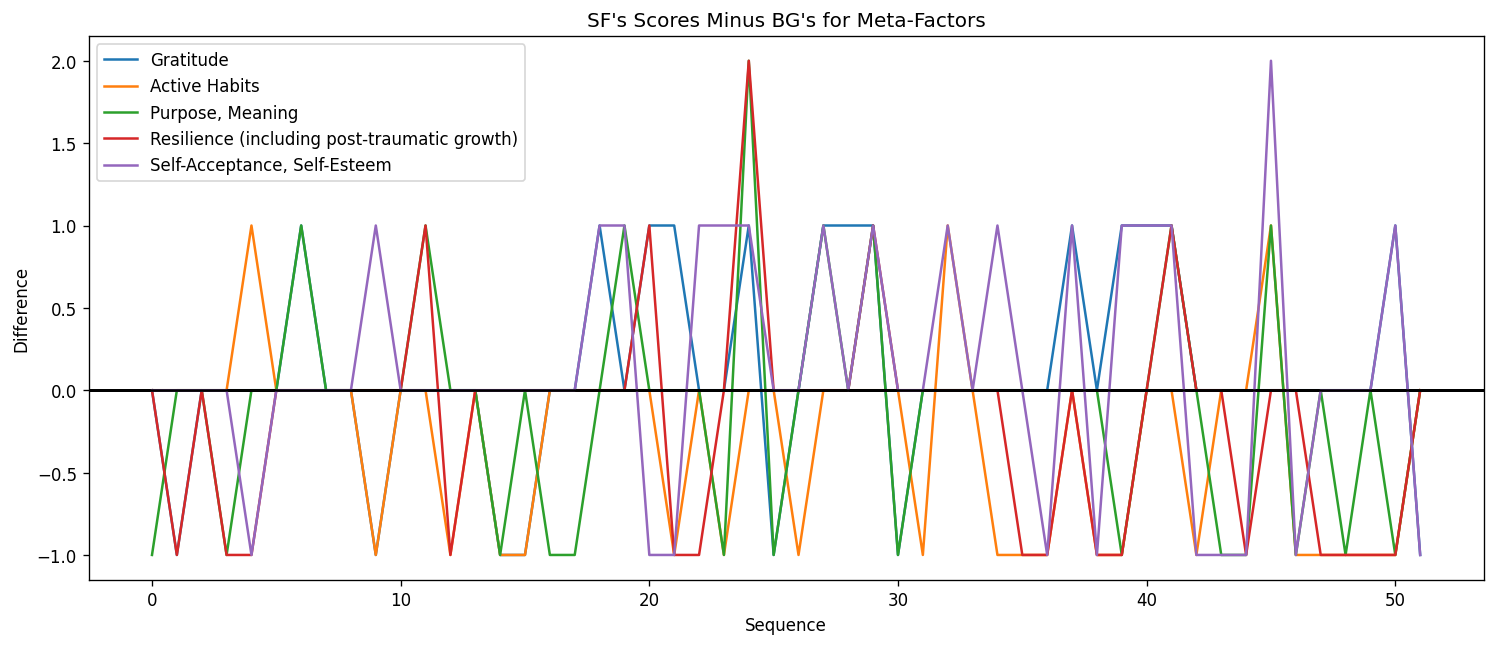

In [36]:
for i in range(len(meta_factors_sf)):
    investigators_diff(df[meta_factors_sf[i]], df[meta_factors_bg[i]], 'Meta-Factors')

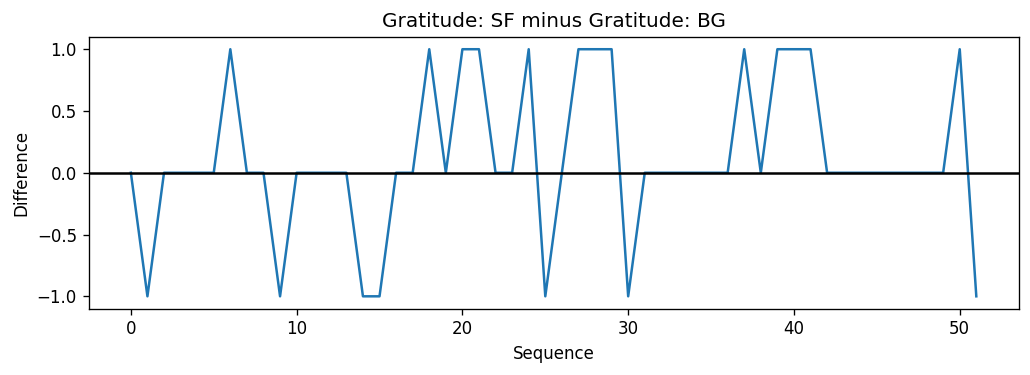

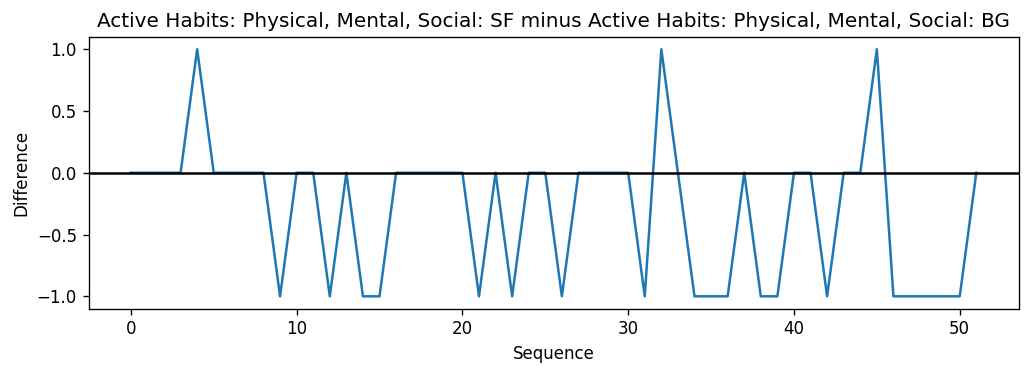

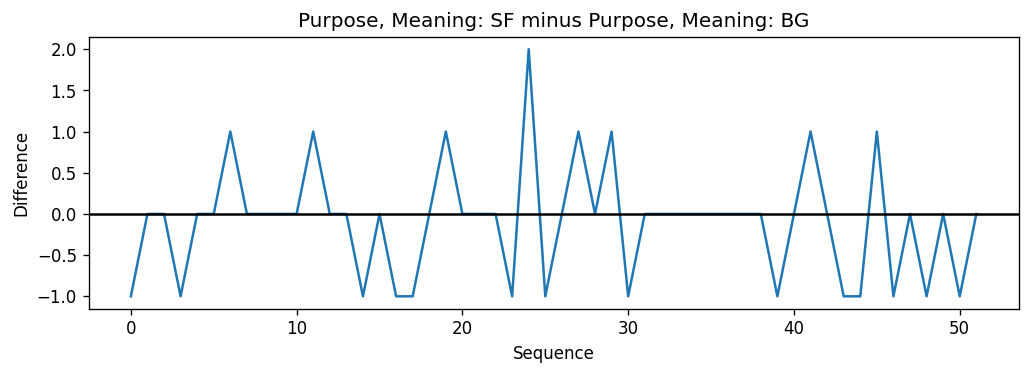

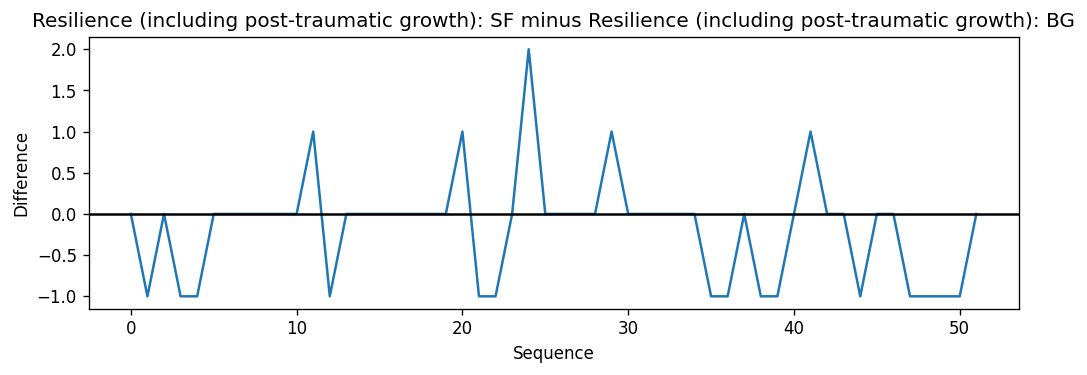

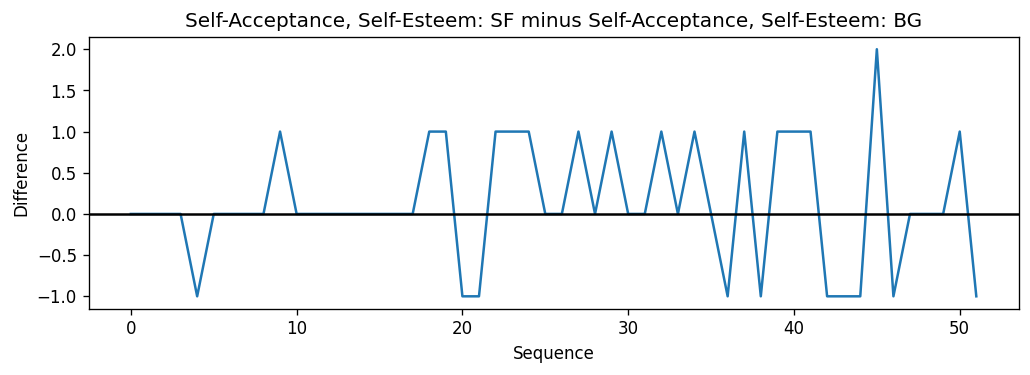

In [37]:
for i in range(len(meta_factors_sf)):
    investigators_diff(df[meta_factors_sf[i]], df[meta_factors_bg[i]], '')

## Elder Developmental Tasks

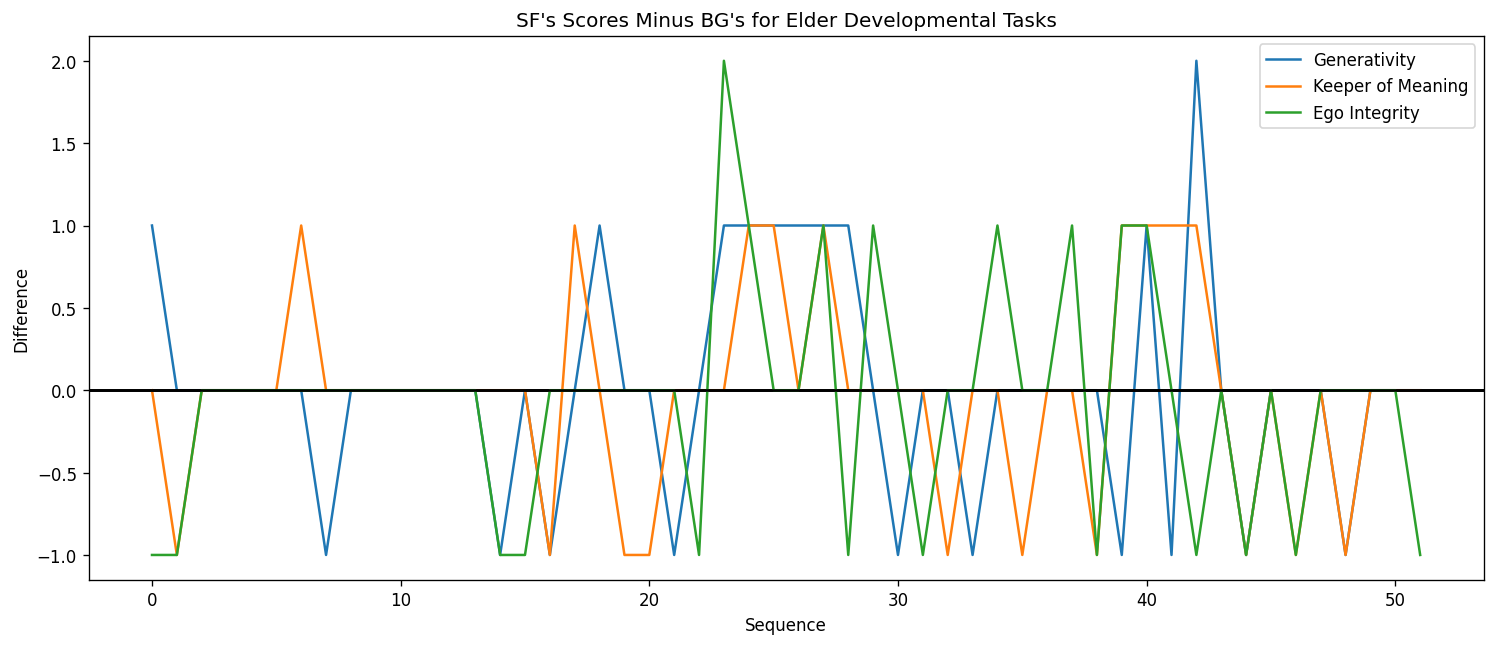

In [38]:
for i in range(len(elder_dev_tasks_sf)):
    investigators_diff(df[elder_dev_tasks_sf[i]], df[elder_dev_tasks_bg[i]], 'Elder Developmental Tasks')

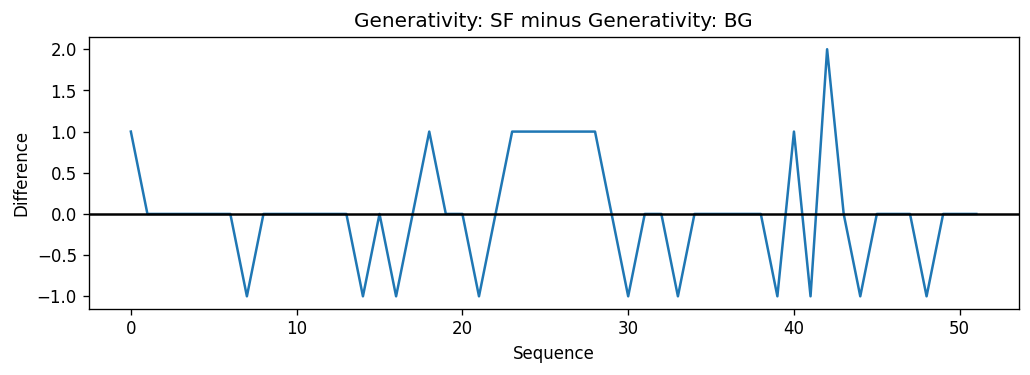

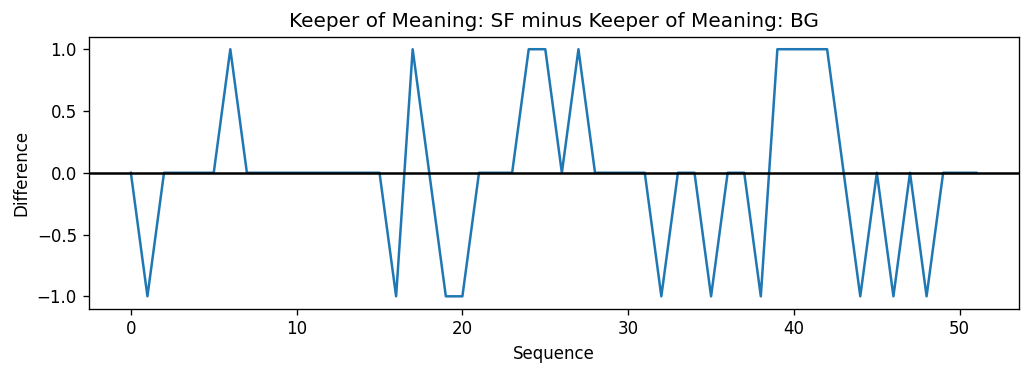

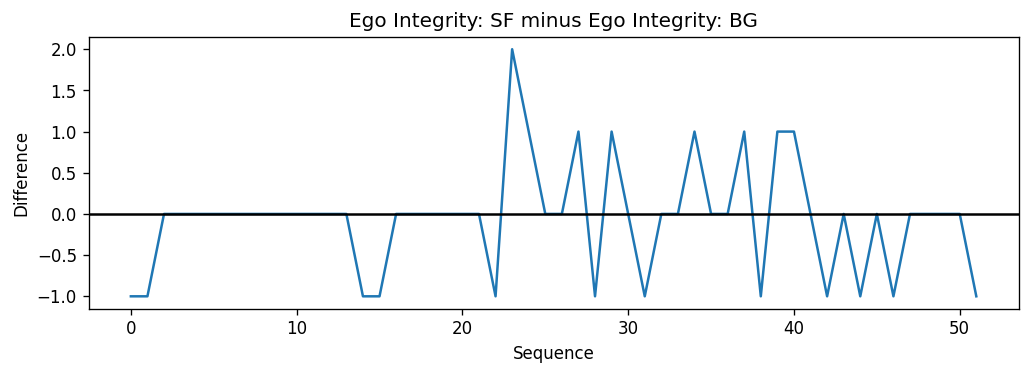

In [39]:
for i in range(len(elder_dev_tasks_sf)):
    investigators_diff(df[elder_dev_tasks_sf[i]], df[elder_dev_tasks_bg[i]], '')

## Controllable Protective Factors

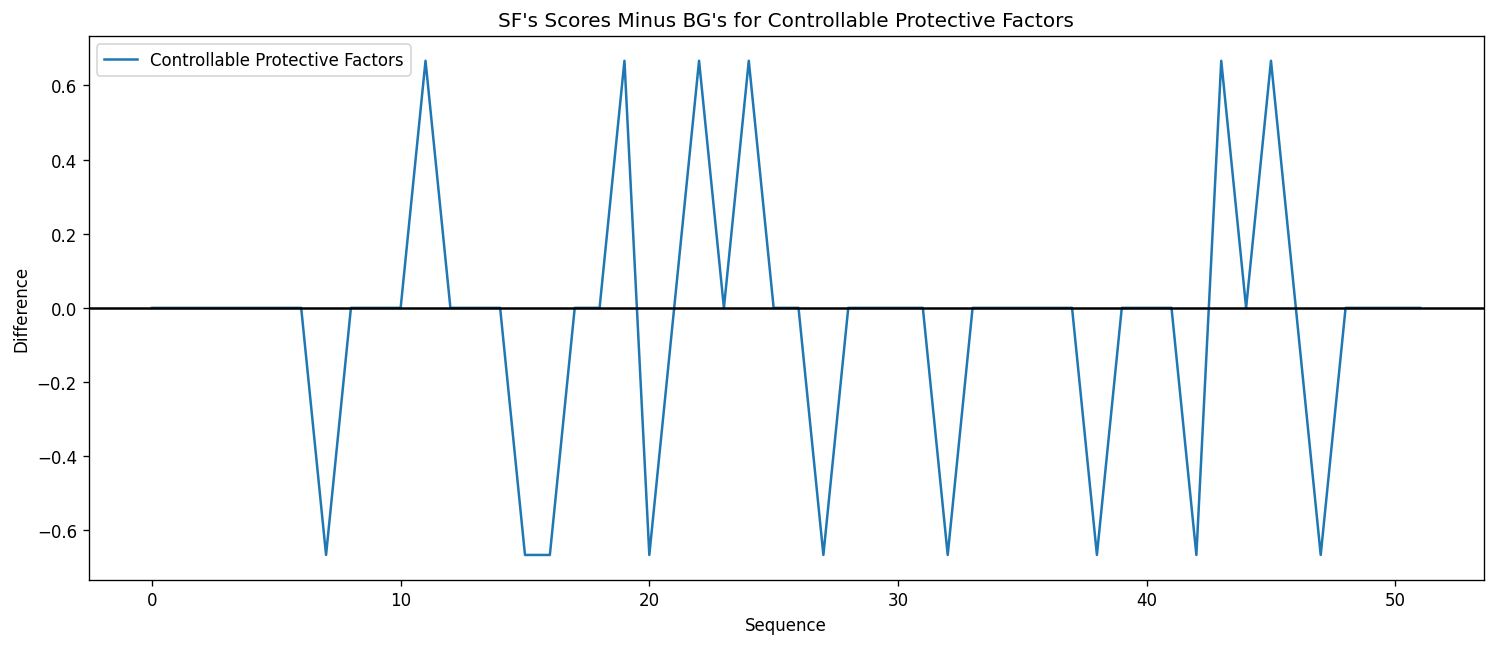

In [40]:
for i in range(len(cont_pred_factors_sf)):
    investigators_diff(df[cont_pred_factors_sf[i]], df[cont_pred_factors_bg[i]], 'Controllable Protective Factors')

## Other

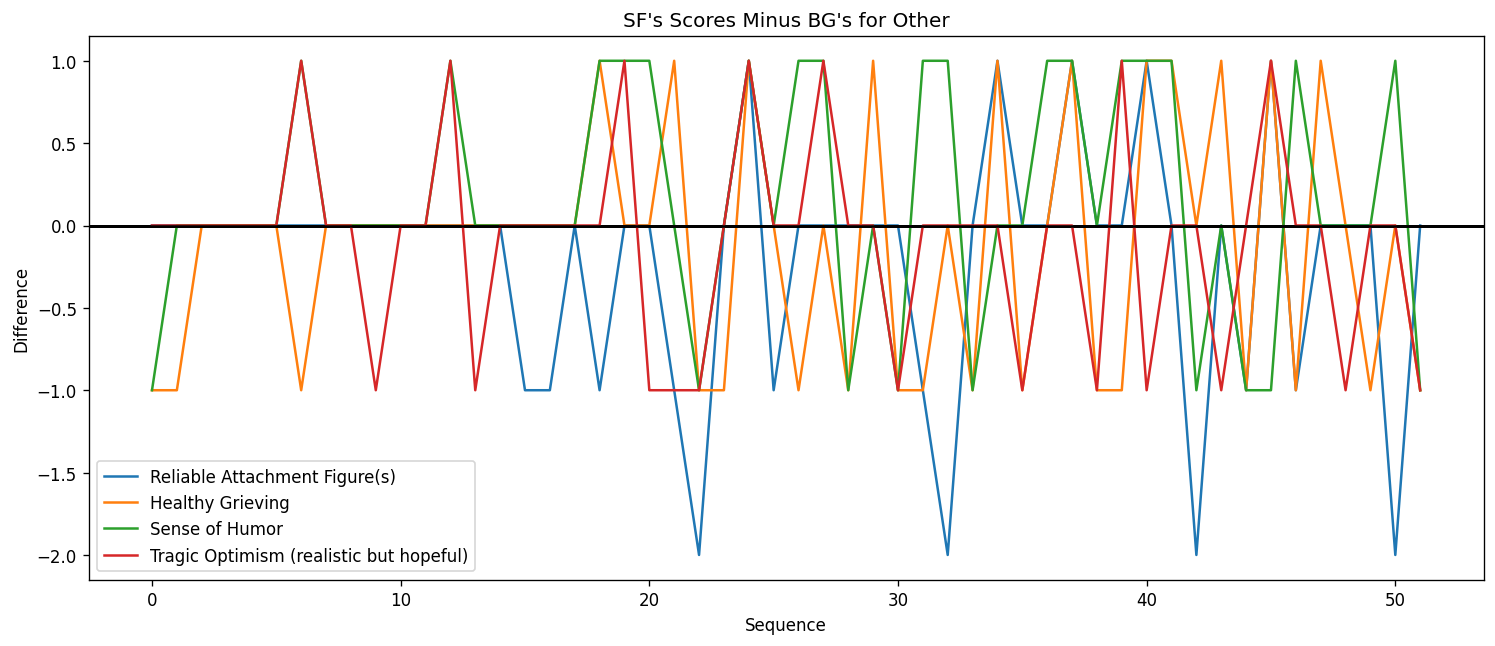

In [41]:
for i in range(len(other_sf)):
    investigators_diff(df[other_sf[i]], df[other_bg[i]], 'Other')

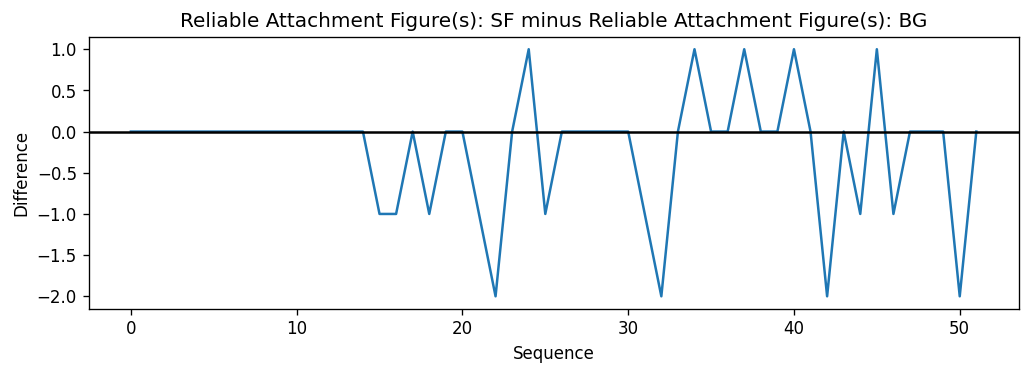

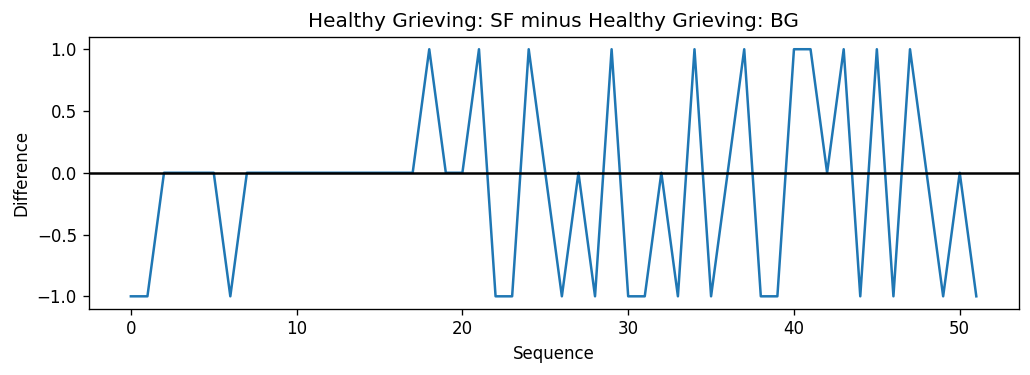

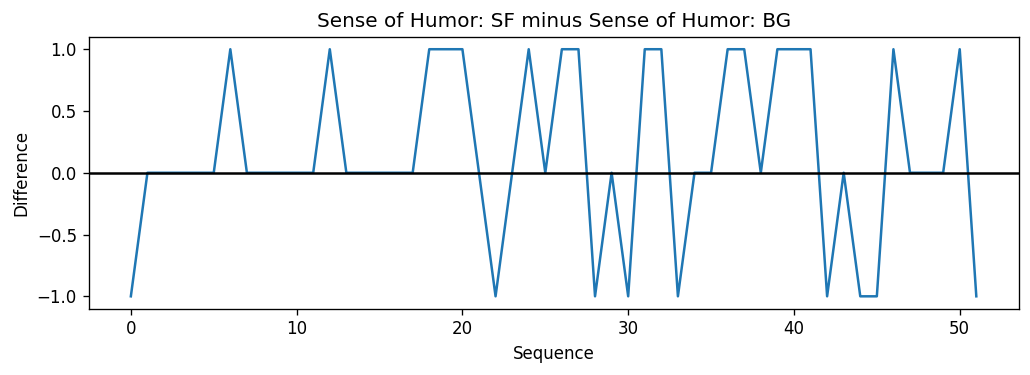

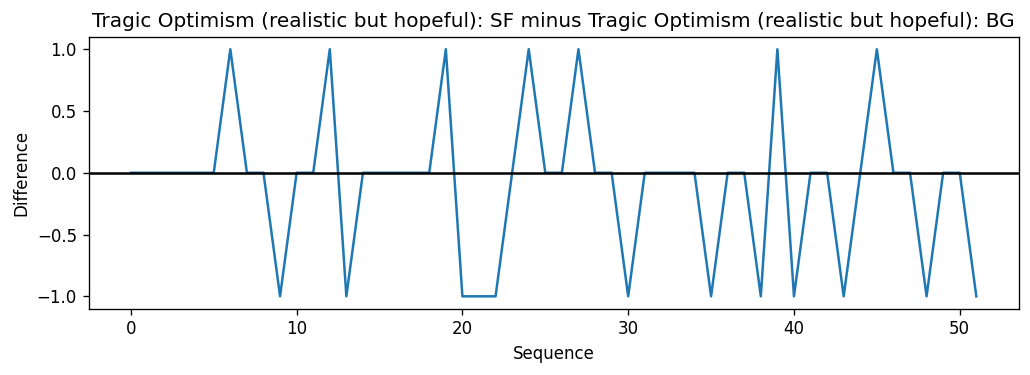

In [42]:
for i in range(len(other_sf)):
    investigators_diff(df[other_sf[i]], df[other_bg[i]], '')

## Interview Presentation Variables

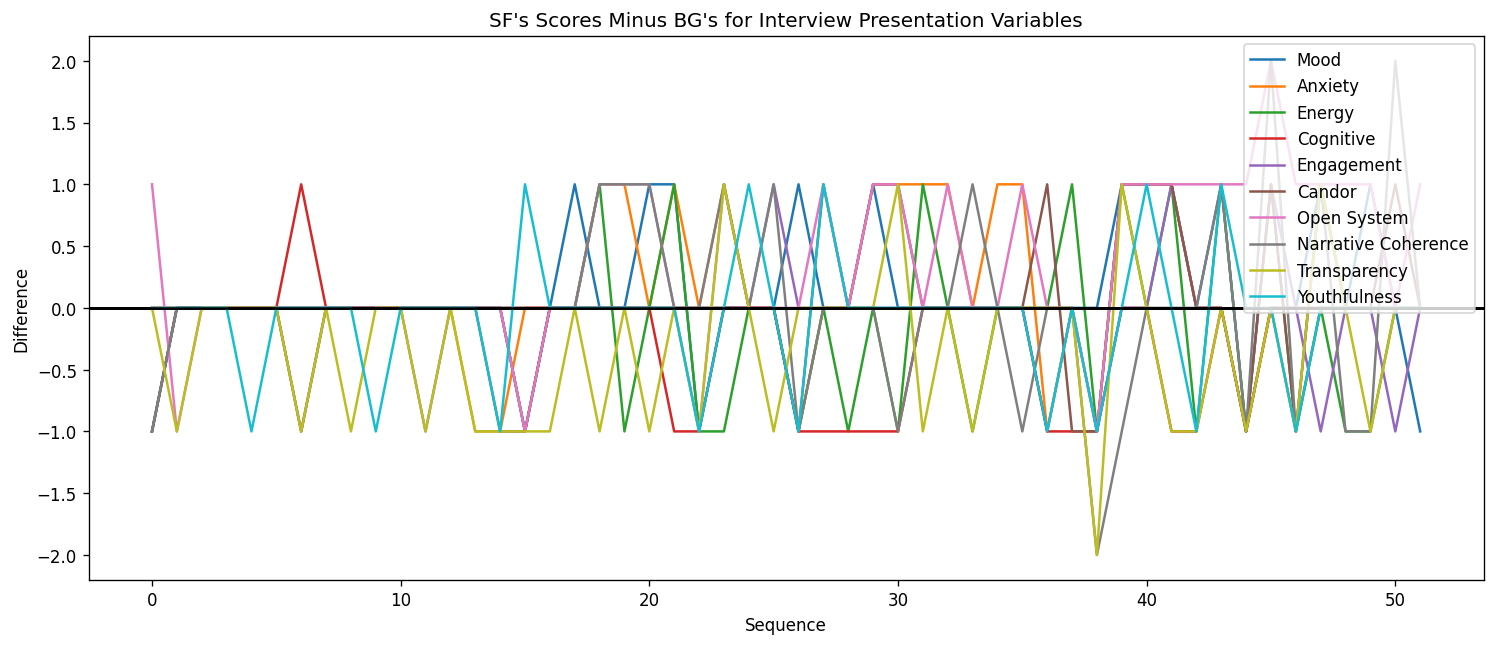

In [43]:
for i in range(len(interview_pres_vars_sf)):
    investigators_diff(df[interview_pres_vars_sf[i]], df[interview_pres_vars_bg[i]], 'Interview Presentation Variables')

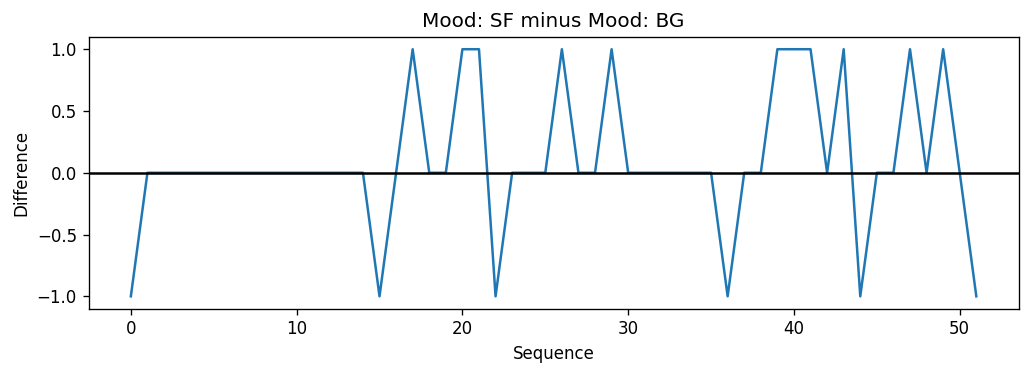

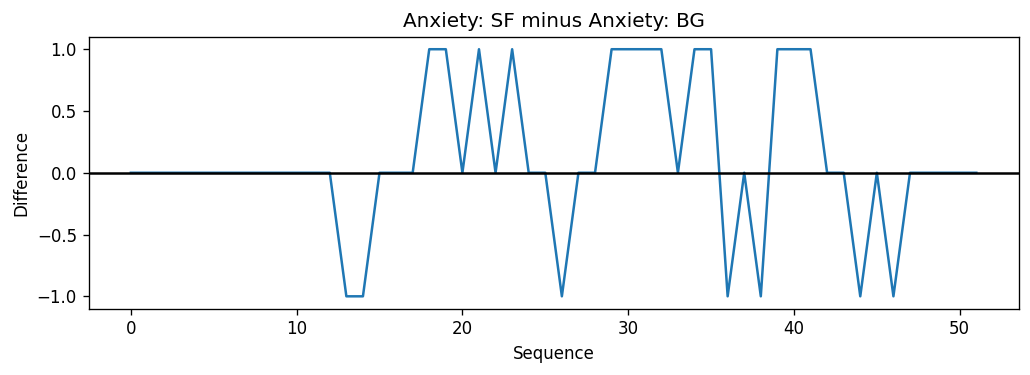

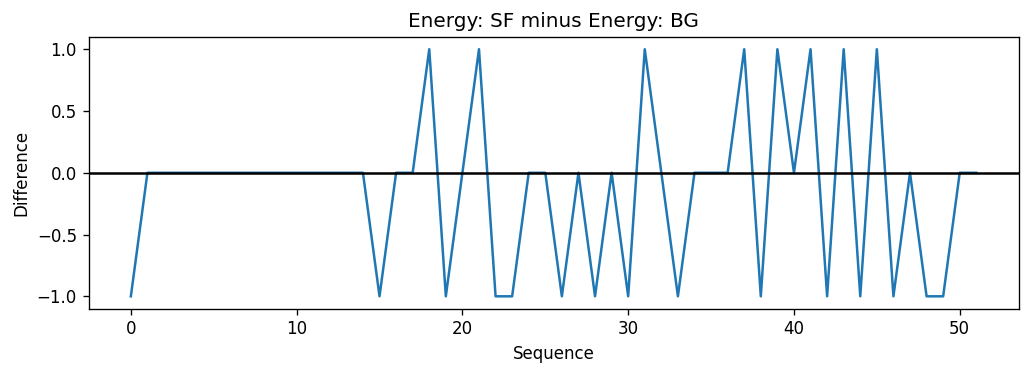

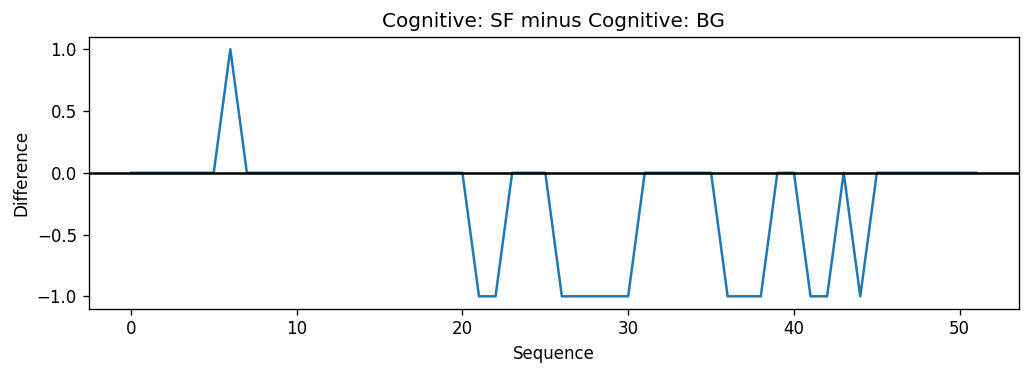

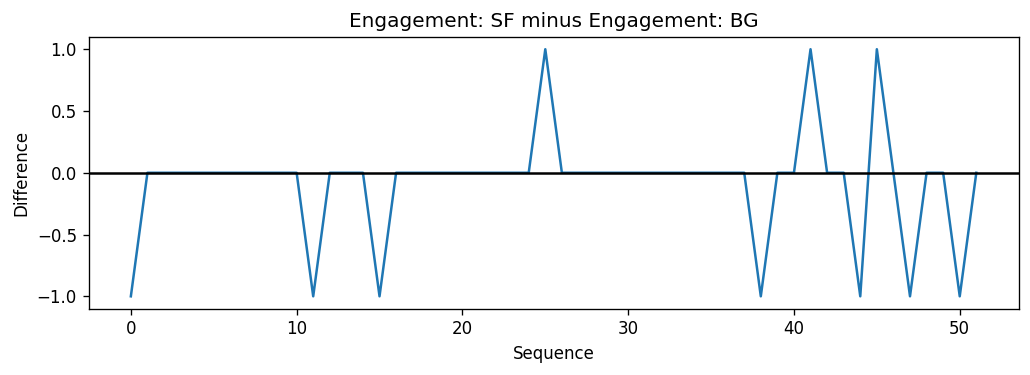

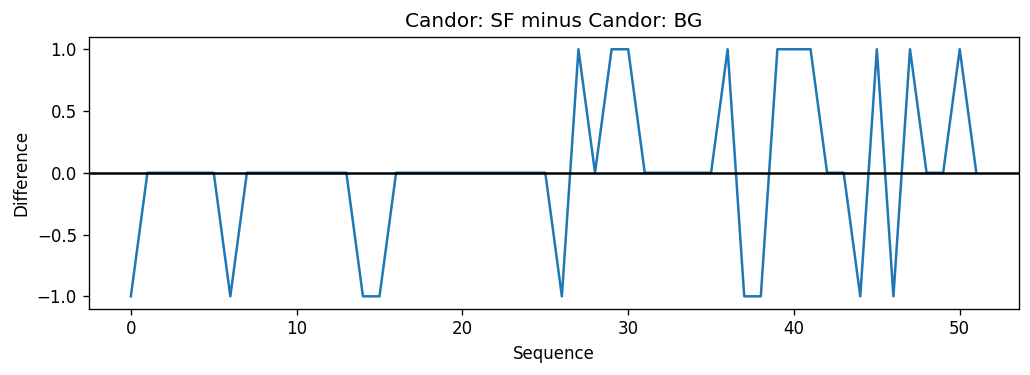

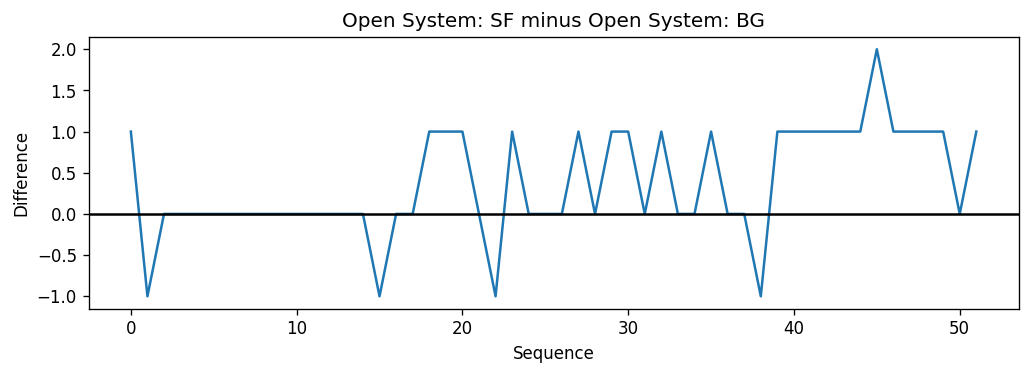

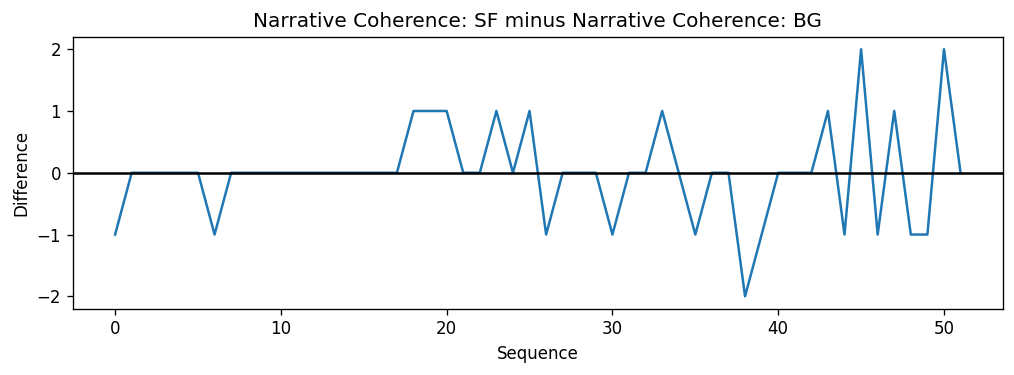

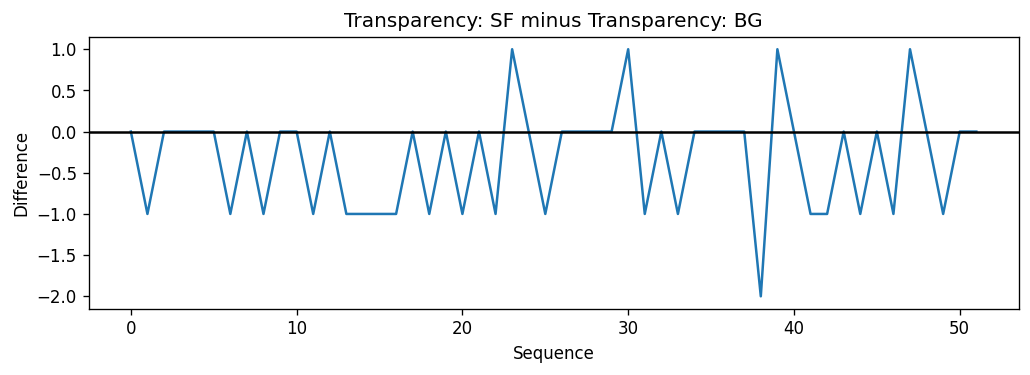

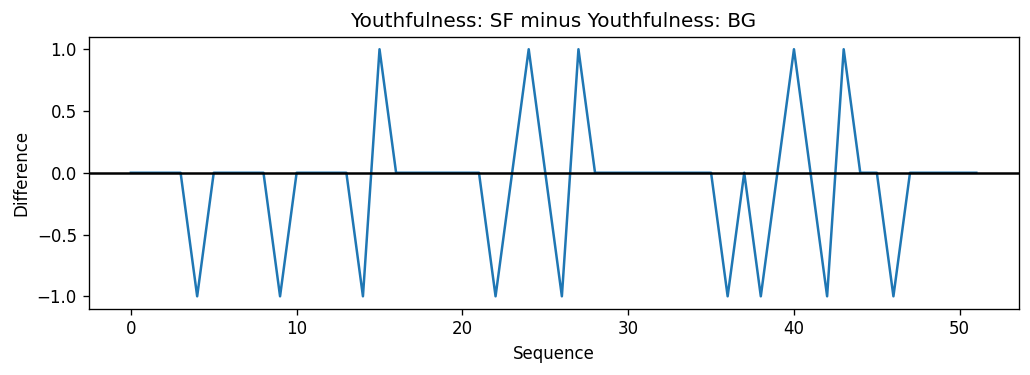

In [44]:
for i in range(len(interview_pres_vars_sf)):
    investigators_diff(df[interview_pres_vars_sf[i]], df[interview_pres_vars_bg[i]], '')

## Elder Identity Revision

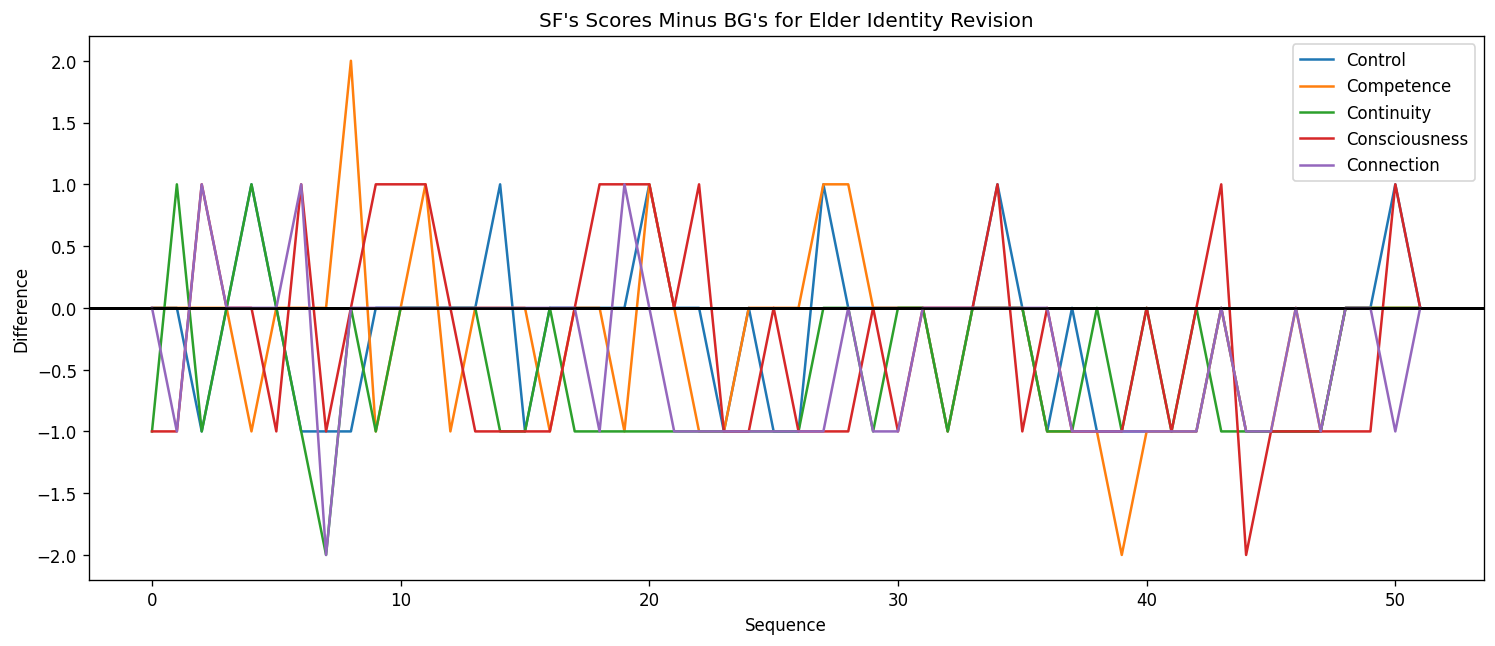

In [45]:
for i in range(len(eir_sf)):
    investigators_diff(df[eir_sf[i]], df[eir_bg[i]], 'Elder Identity Revision')

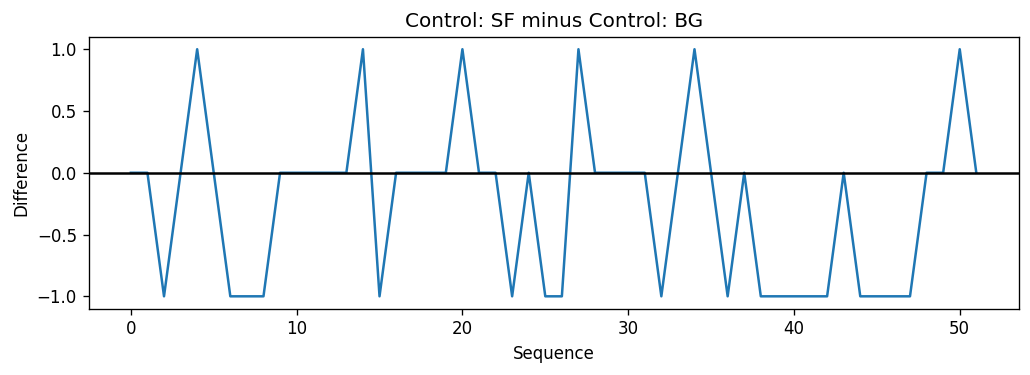

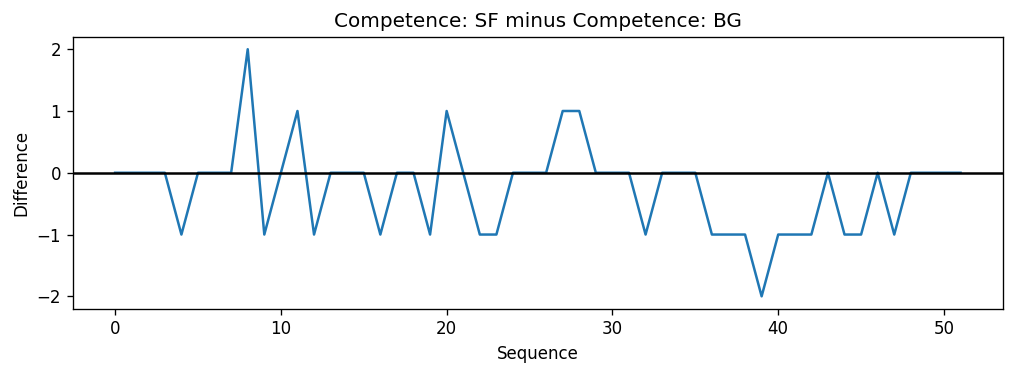

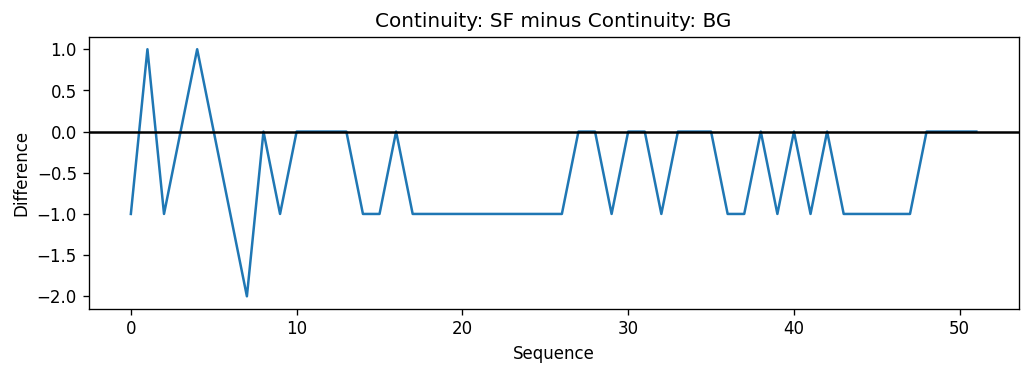

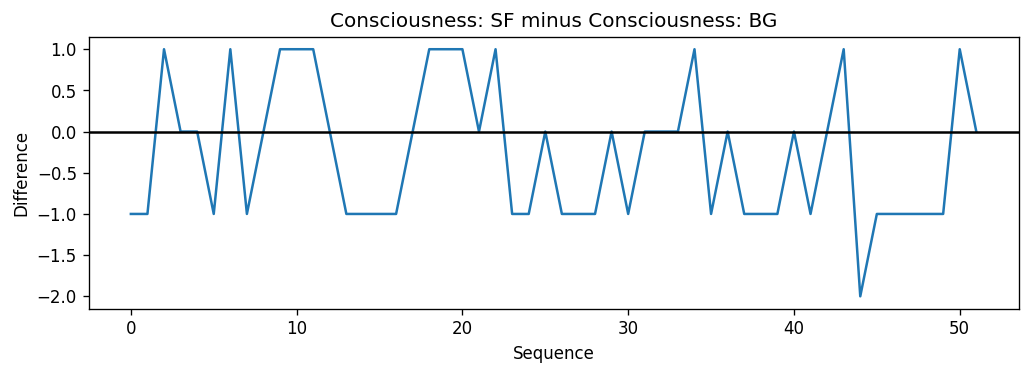

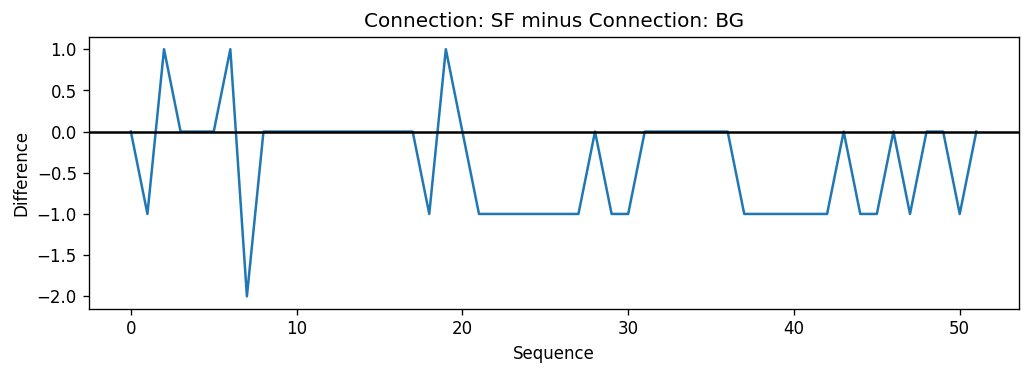

In [46]:
for i in range(len(eir_sf)):
    investigators_diff(df[eir_sf[i]], df[eir_bg[i]], '')

## Global Clinical Impression

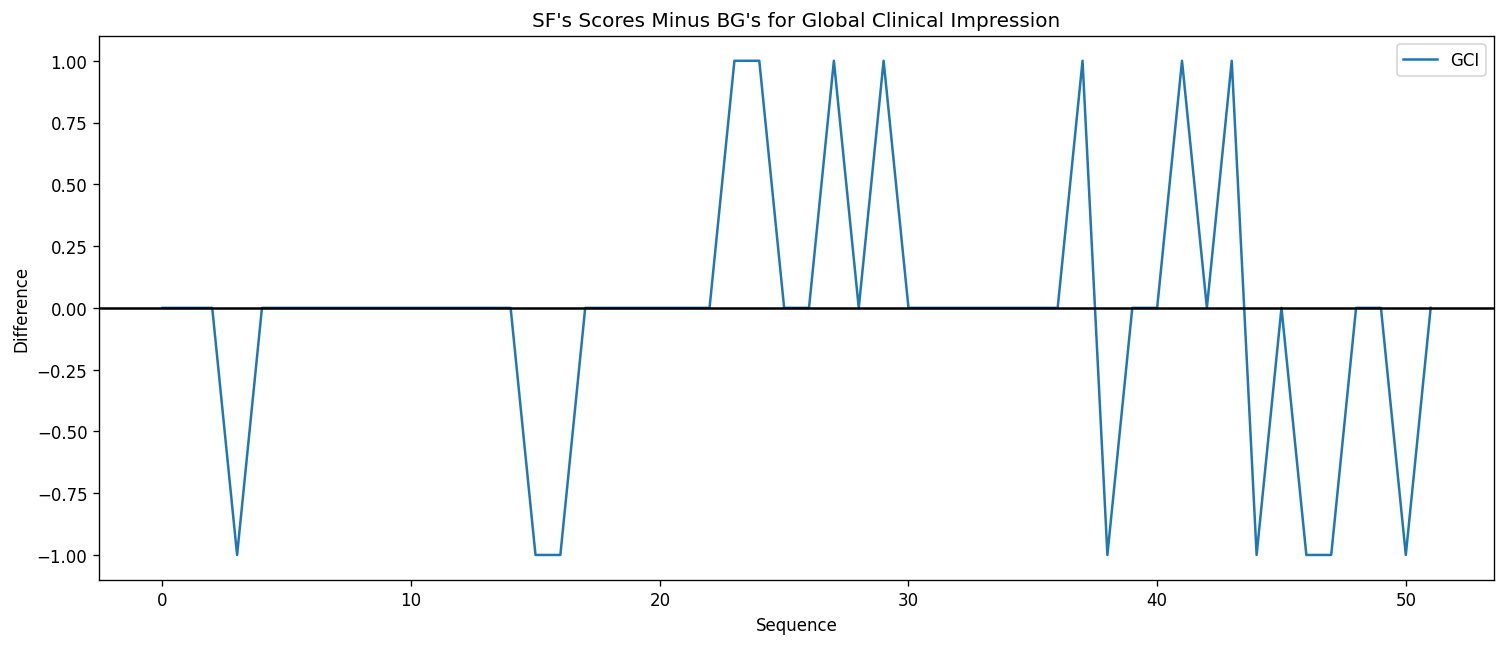

In [47]:
for i in range(len(gci_avg)):
    investigators_diff(df[gci_sf[i]], df[gci_bg[i]], 'Global Clinical Impression')

## Average Discrepancy across all factors per case

In [48]:
# Creating a dataframe with each investigator's factors

all_sf=meta_factors_sf+elder_dev_tasks_sf+cont_pred_factors_sf+other_sf+interview_pres_vars_sf+eir_sf+gci_sf
all_bg=meta_factors_bg+elder_dev_tasks_bg+cont_pred_factors_bg+other_bg+interview_pres_vars_bg+eir_bg+gci_bg
df_sf=df[all_sf]
df_bg=df[all_bg]


In [49]:
# Getting the average discrepency across all factors per case

avg_discs=[]
for i in range(len(df)):
    sf=df_sf.iloc[i]
    bg=df_bg.iloc[i]
    diffs=[]
    for i in range(len(sf)):
        diff=sf[i]-bg[i]
        diffs.append(diff)
    avg_disc=round(sum(diffs)/len(diffs),4)
    avg_discs.append(avg_disc)
df_avg_discs=pd.DataFrame(avg_discs, columns=['Average Discrepancy by Case'])
        
sf=[]
bg=[]
other=[]
diffs_abs=[]
for i in range(len(df_avg_discs)):
    diffs_abs.append(abs(df_avg_discs.iloc[i][0]))
    if df_avg_discs.iloc[i][0] > 0:
        sf.append(df_avg_discs.iloc[i][0])
    elif df_avg_discs.iloc[i][0] < 0:
        bg.append(df_avg_discs.iloc[i][0])
    else:
        other.append(df_avg_discs.iloc[i][0])
print('The number of cases in which Scoff Fisher scored overall higher were', len(sf))
print('The number of cases in which Dr. Ben Green scored overall higher were', len(bg))
print('The number of cases with an average difference of 0 are', len(other))
print('The highest average difference was', max(diffs_abs), 'for case', diffs_abs.index(max(diffs_abs))+1)
print('The overall, average discrepancy across all cases is', round(np.average(avg_discs),2))
print('The standard deviation of the discrepancies is', round(np.std(avg_discs),2))

df_avg_discs

The number of cases in which Scoff Fisher scored overall higher were 15
The number of cases in which Dr. Ben Green scored overall higher were 31
The number of cases with an average difference of 0 are 6
The highest average difference was 0.8161 for case 39
The overall, average discrepancy across all cases is -0.09
The standard deviation of the discrepancies is 0.26


Average Discrepancy by Case
0                       -0.3103
1                       -0.2759
2                        0.0000
3                       -0.1034
4                       -0.0345
5                       -0.0345
6                        0.0690
7                       -0.2644
8                        0.0000
9                       -0.1379
10                       0.0345
11                       0.0920
12                      -0.0345
13                      -0.1379
14                      -0.3448
15                      -0.4713
16                      -0.2989
17                       0.0000
18                       0.2069
19                       0.1954
20                       0.1149
21                      -0.1379
22                      -0.4598
23                       0.0000
24                       0.4368
25                      -0.1034
26                      -0.3103
27                       0.3563
28                      -0.1034
29                       0.2759
30                      -0.2414
31                      -0.0690
32                      -0.0575
33                      -0.1379
34                       0.2069
35                      -0.1724
36                      -0.2759
37                       0.0690
38                      -0.8161
39                       0.0000
40                       0.3103
41                       0.2069
42                      -0.3333
43                       0.1609
44                      -0.7931
45                       0.2989
46                      -0.5172
47                      -0.1264
48                      -0.2759
49                      -0.1724
50                       0.0000
51                      -0.2069

# Correlation

## Initial Correlation and P-Values

Due to the non-parametric nature of this data, we will use Spearman's Correlation. If the p-value is close to zero, we can reject the null hypothesis that they are not correlated (i.e., accept the alternative hypothesis that they are correlated). 

In [50]:
spearmanr_vals=[]
one_to_five_spearmanr_vals=[]
greater_five_spearmanr_vals=[]

high_corr=[]
low_corr=[]


for col in all_averages+['GCI: Average']+['Meta-Factor Total']:
    for sec_col in all_averages+['GCI: Average']+['Meta-Factor Total']:
        if col == sec_col:
            pass
        else:
            corr, pvalue=stats.spearmanr(df[col], df[sec_col])
            spearmanr_vals.append([col, sec_col, corr, pvalue])
            if pvalue >= 0.01 and pvalue <= 0.05:
                one_to_five_spearmanr_vals.append([col, sec_col, corr, pvalue])
            if pvalue >=0.05:
                greater_five_spearmanr_vals.append([col, sec_col, corr, pvalue])
            if corr >= 0.5:
                high_corr.append([col, sec_col, corr, pvalue])
            if corr < 0.5:
                low_corr.append([col, sec_col, corr, pvalue])
        

corrs=[]
p_vals=[]
for i in range(len(spearmanr_vals)):
    corrs.append(spearmanr_vals[i][2])
    p_vals.append(spearmanr_vals[i][3])


In [51]:
print('Total Number of Pairs:',len(spearmanr_vals))
print('Pairs with p-values between 0.01 and 0.05:',len(one_to_five_spearmanr_vals))
print('Pairs with p-values greater than 0.05:', len(greater_five_spearmanr_vals))
print('Pairs with greater than or equal to 0.5 correlation:', len(high_corr))
print('Pairs with lower than 0.5 correlation:', len(low_corr))
print('\n')
print('The highest correlation is', round(max(corrs),4), 'and is between')
print(spearmanr_vals[corrs.index(max(corrs))][0], 'and', spearmanr_vals[corrs.index(max(corrs))][1])
print('The p-value for this correlation is', p_vals[corrs.index(max(corrs))])
print('\n')
print('The lowest correlation is', round(min(corrs),4), 'and is between')
print(spearmanr_vals[corrs.index(min(corrs))][0], 'and',spearmanr_vals[corrs.index(min(corrs))][1])
print('The p-value for this correlation is', p_vals[corrs.index(min(corrs))])

Total Number of Pairs: 870
Pairs with p-values between 0.01 and 0.05: 12
Pairs with p-values greater than 0.05: 0
Pairs with greater than or equal to 0.5 correlation: 756
Pairs with lower than 0.5 correlation: 114


The highest correlation is 0.9211 and is between
Ego Integrity: Average and GCI: Average
The p-value for this correlation is 4.0061123030828743e-22


The lowest correlation is 0.3066 and is between
Reliable Attachment Figure(s): Average and Cognitive: Average
The p-value for this correlation is 0.027041137053645553


Each test that is done: Null is that the Spearman's corr is 0. H1 is that it is not.
By the tests above, we are rejecting ALL of them. So, all have a signficant correlation that differs from 0. 

## Heatmap of all Factors and Composite-Meta-Factor and GCI

From the above, we see that we can reject the null hypothesis with 95% or greater confidence for all pairs of factors, leaving us with the alternative hypothesis that they are correlated with the following correlations:

In [52]:
# We need to shorten the names to get everything to fit together

everything=all_averages.copy()
everything=everything+['GCI: Average']+['Meta-Factor Total']
short_names=[]
for name in everything:
    short_names.append(name[0:4])

In [53]:
print('All factors and GCI:',everything)
print('Length of factors and GCI:',len(everything))

All factors and GCI: ['Gratitude: Average', 'Active Habits: Physical, Mental, Social: Average', 'Purpose, Meaning: Average', 'Resilience (including post-traumatic growth): Average', 'Self-Acceptance, Self-Esteem: Average', 'Generativity: Average', 'Keeper of Meaning: Average', 'Ego Integrity: Average', 'Controllable Protective Factors: Only factor that goes up to 7: Average', 'Reliable Attachment Figure(s): Average', 'Healthy Grieving: Average', 'Sense of Humor: Average', 'Tragic Optimism (realistic but hopeful): Average', 'Mood: Average', 'Anxiety: Average', 'Energy: Average', 'Cognitive: Average', 'Engagement: Average', 'Candor: Average', 'Open System: Average', 'Narrative Coherence: Average', 'Transparency: Average', 'Youthfulness: Average', 'Control: Average', 'Competence: Average', 'Continuity: Average', 'Consciousness: Average', 'Connection: Average', 'GCI: Average', 'Meta-Factor Total']
Length of factors and GCI: 30


In [54]:
# Columns List

col_list=list(
    zip(
        df[everything[0]], df[everything[1]], df[everything[2]],
        df[everything[3]], df[everything[4]], df[everything[5]],
        df[everything[6]], df[everything[7]], df[everything[8]],
        df[everything[9]], df[everything[10]], df[everything[11]],
        df[everything[12]], df[everything[13]], df[everything[14]],
        df[everything[15]], df[everything[16]], df[everything[17]],
        df[everything[18]], df[everything[19]], df[everything[20]],
        df[everything[21]], df[everything[22]], df[everything[23]],
        df[everything[24]], df[everything[25]], df[everything[26]],
        df[everything[27]], df[everything[28]], df[everything[29]]
        
    ))

# Getting a dataframe
df_heat=pd.DataFrame(col_list, columns=short_names)
df_heat.head()

Grat  Acti  Purp  Resi  Self  Gene  Keep  Ego       Cont  Reli  ...  Narr  \
0   5.0   4.5   3.5   4.0   4.0   3.5   3.0   3.5  4.333333   5.0  ...   4.5   
1   4.5   5.0   4.0   3.5   3.0   3.0   4.5   2.5  3.666667   3.0  ...   4.0   
2   2.0   2.0   3.0   3.0   3.0   2.0   2.0   3.0  2.333333   2.0  ...   4.0   
3   5.0   4.0   4.5   4.5   4.0   5.0   5.0   5.0  4.333333   5.0  ...   4.0   
4   2.0   2.5   2.0   2.5   2.5   2.0   2.0   2.0  2.333333   3.0  ...   4.0   

   Tran  Yout  Cont  Comp  Cont  Cons  Conn  GCI:  Meta  
0   3.0   4.0   4.0   4.0   4.5   3.5   4.0   4.0   4.2  
1   4.5   4.0   3.0   4.0   3.5   4.5   3.5   4.0   4.0  
2   2.0   3.0   3.5   4.0   4.5   2.5   2.5   3.0   2.6  
3   4.0   3.0   4.0   4.0   4.0   5.0   5.0   4.5   4.4  
4   2.0   2.5   2.5   2.5   2.5   2.0   2.0   2.0   2.4  

[5 rows x 30 columns]

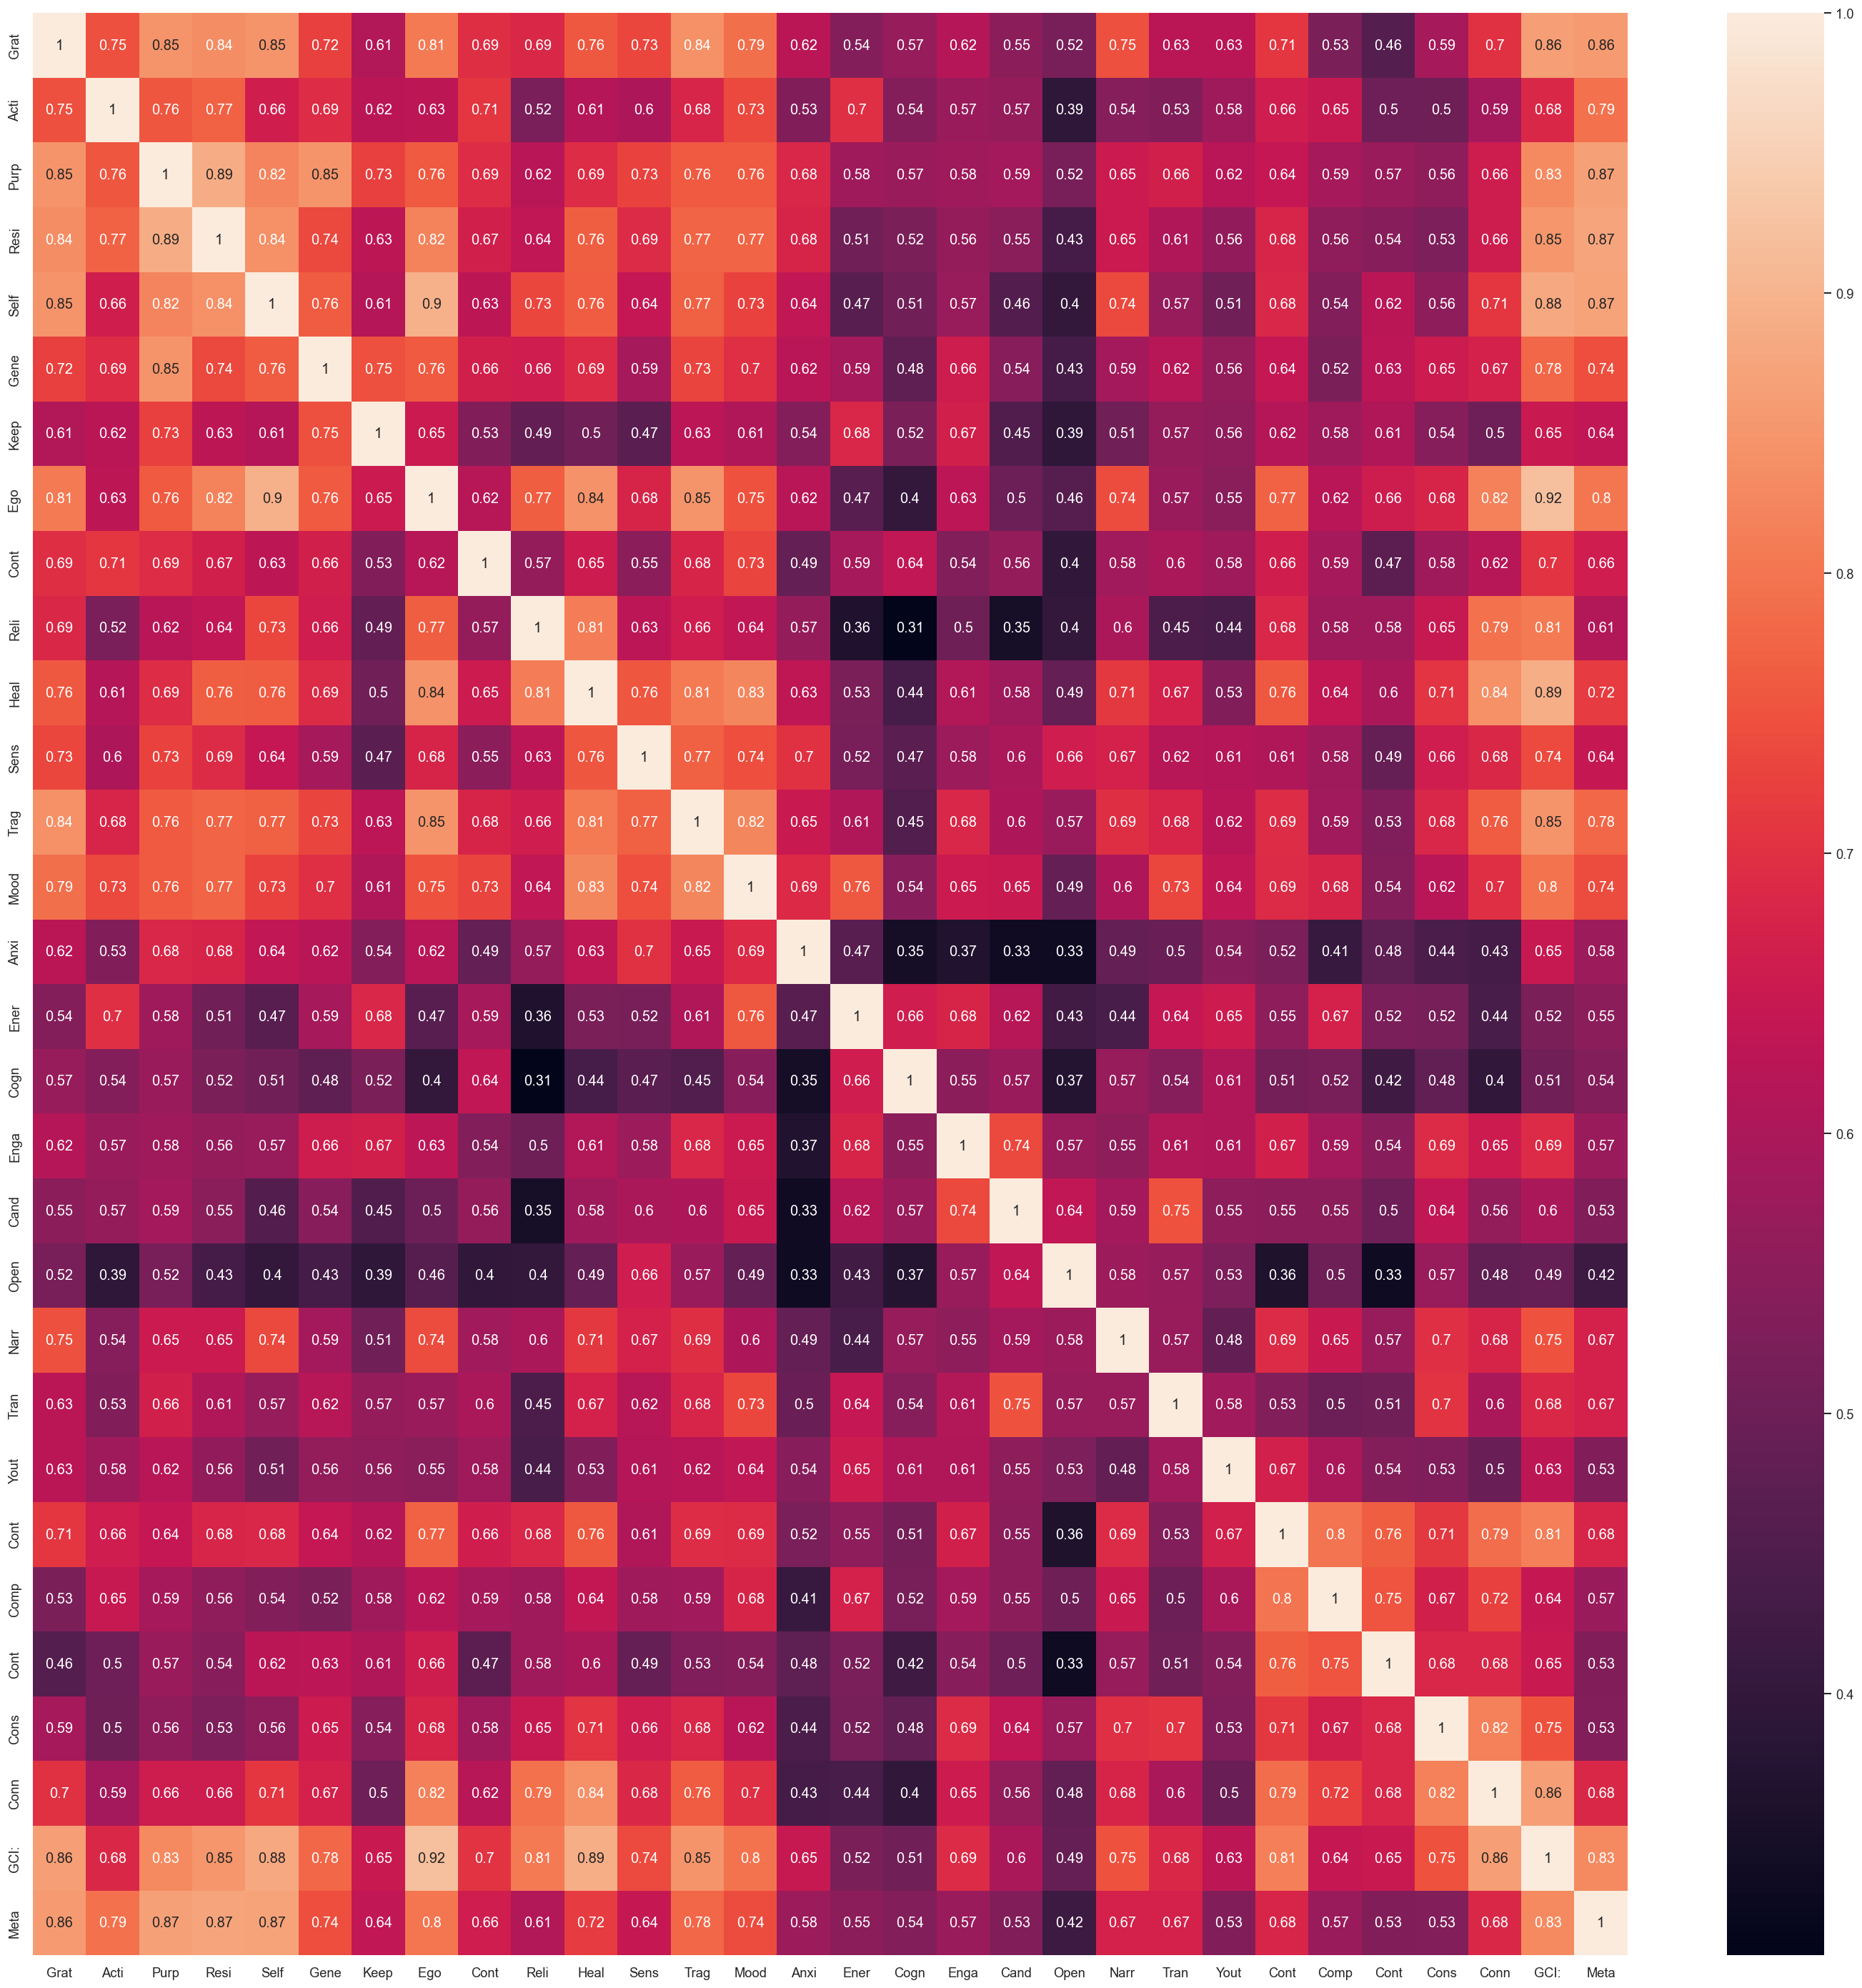

In [55]:
# Correlation Heatmap

sns.set(rc = {'figure.figsize':(30,30)})
corr=df_heat.corr(method='spearman')
sns.heatmap(corr, annot = True)

plt.show()

## Heatmap of Meta-factors

In [56]:
# Column list

print(meta_factors_avg)

# We need to shorten the names to get everything to fit together
short_names=[]
for name in meta_factors_avg:
    short_names.append(name[0:4])

col_list=list(zip(df[meta_factors_avg[0]], df[meta_factors_avg[1]],
                 df[meta_factors_avg[2]], df[meta_factors_avg[3]],
                 df[meta_factors_avg[4]]))
df_meta=pd.DataFrame(col_list, columns=short_names)
df_meta.head()

['Gratitude: Average', 'Active Habits: Physical, Mental, Social: Average', 'Purpose, Meaning: Average', 'Resilience (including post-traumatic growth): Average', 'Self-Acceptance, Self-Esteem: Average']


Grat  Acti  Purp  Resi  Self
0   5.0   4.5   3.5   4.0   4.0
1   4.5   5.0   4.0   3.5   3.0
2   2.0   2.0   3.0   3.0   3.0
3   5.0   4.0   4.5   4.5   4.0
4   2.0   2.5   2.0   2.5   2.5

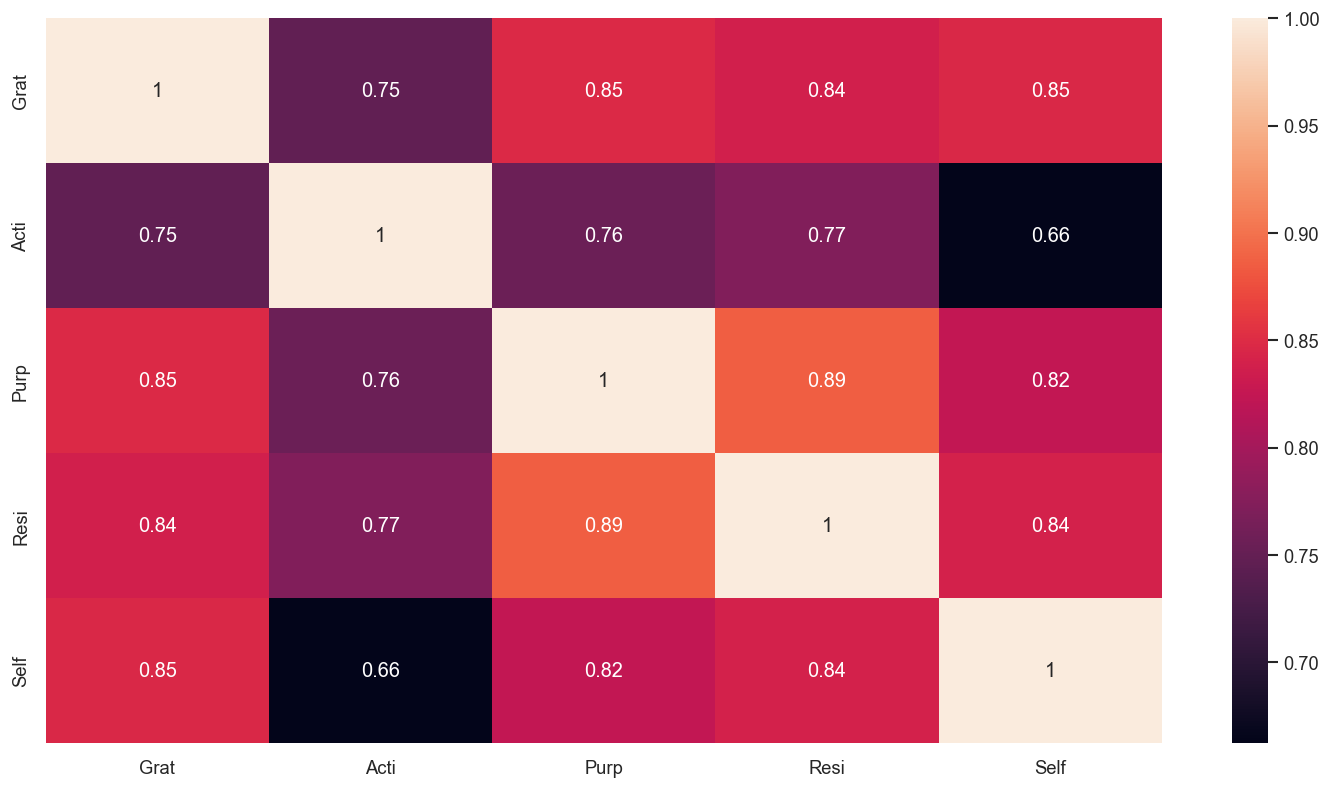

In [57]:
# Correlation Heatmap
sns.set(rc = {'figure.figsize':(15,8)})
corr=df_meta.corr(method='spearman')
sns.heatmap(corr, annot = True)

plt.show()

We see that though all are correlated with a coefficient of at least 0.66, the least correlated are Active Habits and Self-Acceptance, Self-Esteem.

In [58]:
# Meta-Factors
corr, pvalue=stats.spearmanr(df['Resilience (including post-traumatic growth): Average'], df['Purpose, Meaning: Average'])

print('The correlation between Resilience and Purpose is', round(corr,4), 'with p-value of', pvalue)

corr, pvalue=stats.spearmanr(df['Active Habits: Physical, Mental, Social: Average'], df['Self-Acceptance, Self-Esteem: Average'])

print('The correlation between Avtive Habits and Self-Acceptance/Self-Esteem is', round(corr,4), 'with p-value of', pvalue)

The correlation between Resilience and Purpose is 0.8863 with p-value of 2.41321383359906e-18
The correlation between Avtive Habits and Self-Acceptance/Self-Esteem is 0.6623 with p-value of 8.892158071370094e-08


## Heatmap of Elder Identity Revision factors

In [59]:
# Column list

print(eir_avg)

# We need to shorten the names to get everything to fit together
short_names=[]
for name in eir_avg:
    short_names.append(name[0:4])

col_list=list(zip(df[eir_avg[0]], df[eir_avg[1]],
                 df[eir_avg[2]], df[eir_avg[3]],
                 df[eir_avg[4]]))
df_eir=pd.DataFrame(col_list, columns=short_names)
df_eir.head()

['Control: Average', 'Competence: Average', 'Continuity: Average', 'Consciousness: Average', 'Connection: Average']


Cont  Comp  Cont  Cons  Conn
0   4.0   4.0   4.5   3.5   4.0
1   3.0   4.0   3.5   4.5   3.5
2   3.5   4.0   4.5   2.5   2.5
3   4.0   4.0   4.0   5.0   5.0
4   2.5   2.5   2.5   2.0   2.0

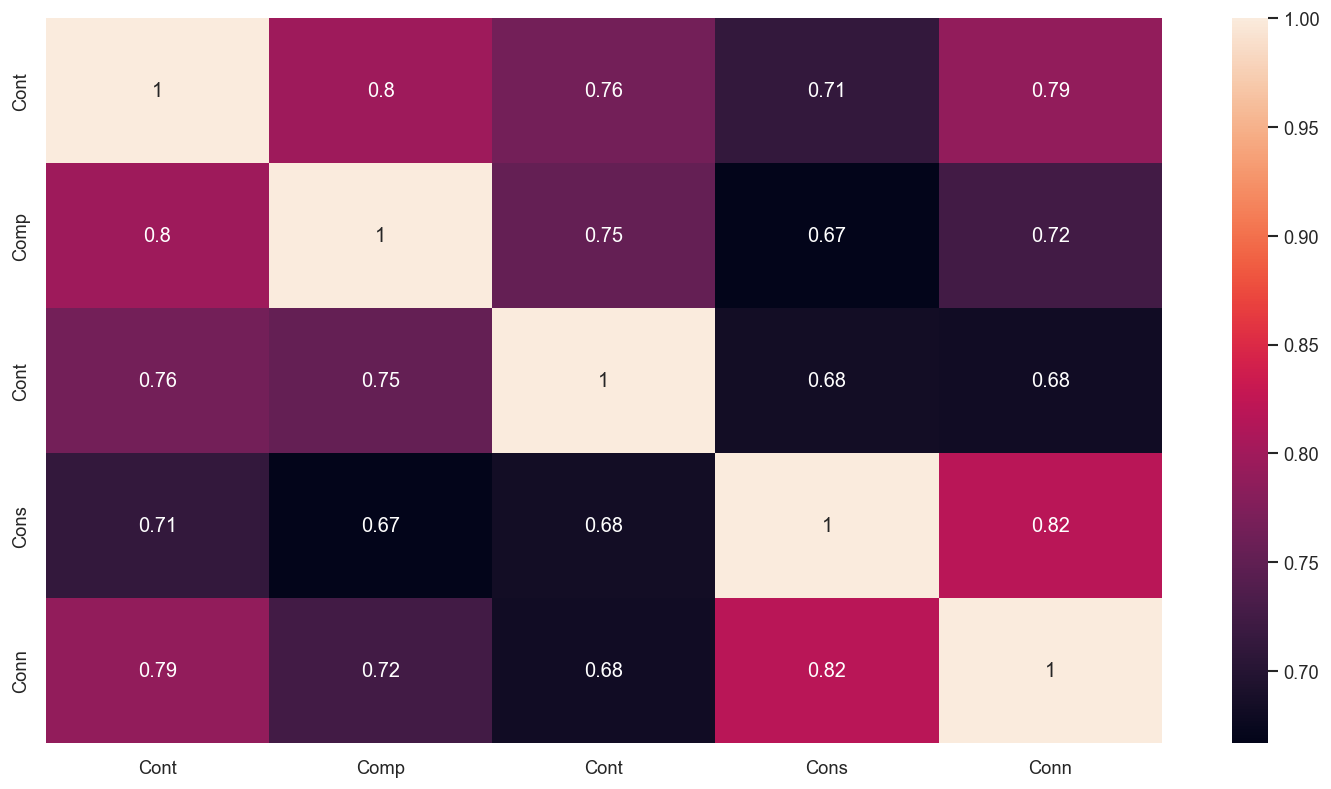

In [60]:
# Correlation Heatmap
sns.set(rc = {'figure.figsize':(15,8)})
corr=df_eir.corr(method='spearman')
sns.heatmap(corr, annot = True)

plt.show()

In [61]:
# Elder Identity Revision
corr, pvalue=stats.spearmanr(df['Consciousness: Average'], df['Connection: Average'])

print('The correlation between Consciousness and Connection is', round(corr,4), 'with p-value of', pvalue)

corr, pvalue=stats.spearmanr(df['Competence: Average'], df['Consciousness: Average'])

print('The correlation between Comptence and Consciousness is', round(corr,4), 'with p-value of', pvalue)

The correlation between Consciousness and Connection is 0.8178 with p-value of 1.364138331303984e-13
The correlation between Comptence and Consciousness is 0.6668 with p-value of 6.763281049531441e-08


## Heatmap of Elder Developmental Tasks factors

In [62]:
# Column list

print(elder_dev_tasks_avg)

# We need to shorten the names to get everything to fit together
short_names=[]
for name in elder_dev_tasks_avg:
    short_names.append(name[0:4])

col_list=list(zip(df[elder_dev_tasks_avg[0]], df[elder_dev_tasks_avg[1]],
                 df[elder_dev_tasks_avg[2]]))
df_edt=pd.DataFrame(col_list, columns=short_names)
df_edt.head()

['Generativity: Average', 'Keeper of Meaning: Average', 'Ego Integrity: Average']


Gene  Keep  Ego 
0   3.5   3.0   3.5
1   3.0   4.5   2.5
2   2.0   2.0   3.0
3   5.0   5.0   5.0
4   2.0   2.0   2.0

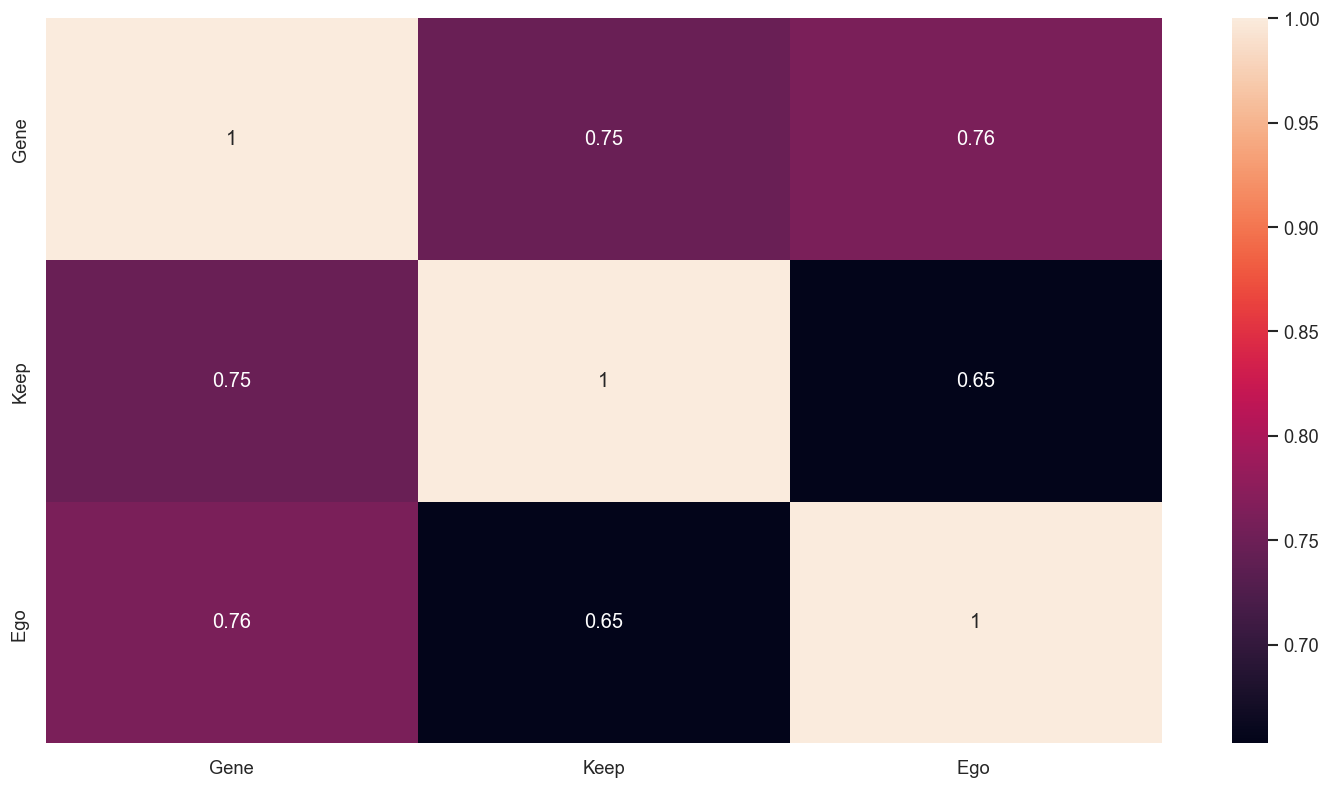

In [63]:
# Correlation Heatmap
sns.set(rc = {'figure.figsize':(15,8)})
corr=df_edt.corr(method='spearman')
sns.heatmap(corr, annot = True)

plt.show()

In [64]:
# Elder Developmental Tasks
corr, pvalue=stats.spearmanr(df['Ego Integrity: Average'], df['Generativity: Average'])

print('The correlation between Ego Integrity and Generativity is', round(corr,4), 'with p-value of', pvalue)

corr, pvalue=stats.spearmanr(df['Ego Integrity: Average'], df['Keeper of Meaning: Average'])

print('The correlation between Ego Integrity and Keeper of Meaning is', round(corr,4), 'with p-value of', pvalue)

The correlation between Ego Integrity and Generativity is 0.7602 with p-value of 6.269323992367137e-11
The correlation between Ego Integrity and Keeper of Meaning is 0.6528 with p-value of 1.5681152155344468e-07


## Heatmap of Elder Identity Revision and Elder Developmental Tasks

In [65]:
# Column list

eir_edt_avg=eir_avg+elder_dev_tasks_avg
print(eir_edt_avg)

# We need to shorten the names to get everything to fit together
short_names=[]
for name in eir_edt_avg:
    short_names.append(name[0:4])

col_list=list(zip(df[eir_edt_avg[0]], df[eir_edt_avg[1]],
                 df[eir_edt_avg[2]], df[eir_edt_avg[3]],
                 df[eir_edt_avg[4]], df[eir_edt_avg[5]],
                 df[eir_edt_avg[6]],df[eir_edt_avg[7]]))
df_eir_edt=pd.DataFrame(col_list, columns=short_names)
df_eir_edt.head()

['Control: Average', 'Competence: Average', 'Continuity: Average', 'Consciousness: Average', 'Connection: Average', 'Generativity: Average', 'Keeper of Meaning: Average', 'Ego Integrity: Average']


Cont  Comp  Cont  Cons  Conn  Gene  Keep  Ego 
0   4.0   4.0   4.5   3.5   4.0   3.5   3.0   3.5
1   3.0   4.0   3.5   4.5   3.5   3.0   4.5   2.5
2   3.5   4.0   4.5   2.5   2.5   2.0   2.0   3.0
3   4.0   4.0   4.0   5.0   5.0   5.0   5.0   5.0
4   2.5   2.5   2.5   2.0   2.0   2.0   2.0   2.0

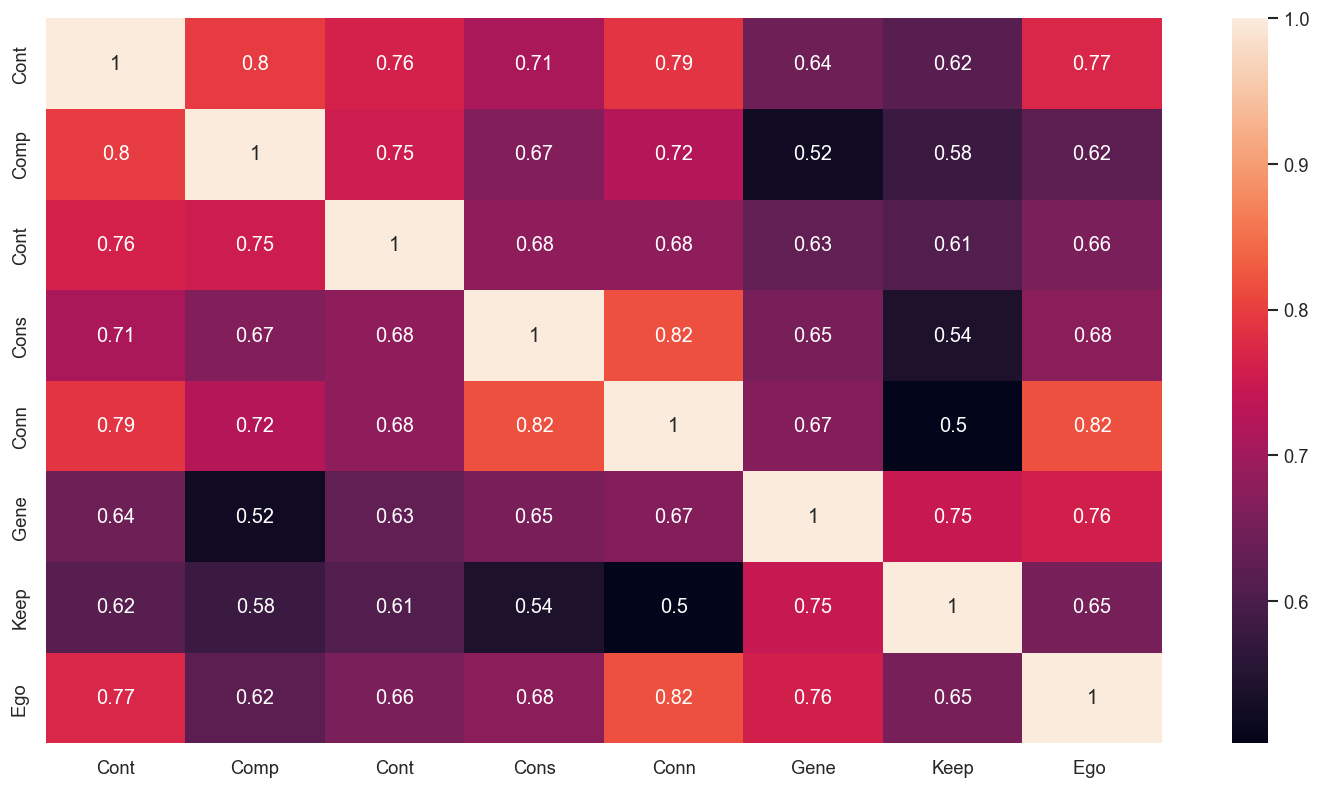

In [66]:
# Correlation Heatmap
sns.set(rc = {'figure.figsize':(15,8)})
corr=df_eir_edt.corr(method='spearman')
sns.heatmap(corr, annot = True)

plt.show()

In [67]:
# Elder Identity Revision and Elder Developmental Tasks
corr, pvalue=stats.spearmanr(df['Ego Integrity: Average'], df['Connection: Average'])

print('The correlation between Ego Integrity and Connection is', round(corr,4), 'with p-value of', pvalue)

corr, pvalue=stats.spearmanr(df['Keeper of Meaning: Average'], df['Connection: Average'])

print('The correlation between Keeper of Meaning and Connection is', round(corr,4), 'with p-value of', pvalue)

The correlation between Ego Integrity and Connection is 0.8184 with p-value of 1.2617310622473498e-13
The correlation between Keeper of Meaning and Connection is 0.5025 with p-value of 0.00014676829978375143


# Multiple Linear Regression

## Linear Regression with all Factors as Regressors and GCI as Target

### Individual Regressors and their P-values

We begin by building a simple Ordinary Least Squares linear regression model with each factor alone to view the p-values, coefficients, and $R^2$.

In [21]:
def single_factor_lr(factor, target):
    regressor_OLS = sm.OLS(endog = target, exog = factor).fit()
    coeff=regressor_OLS.params
    r_squared=regressor_OLS.rsquared
    p_values = regressor_OLS.pvalues
    return [coeff, r_squared, p_values]

In [22]:
single_olss=[]
for i in range(len(all_averages)):
    single_ols=single_factor_lr(df[all_averages[i]], df['GCI: Average'])
    single_olss.append(single_ols)

In [23]:
single_olss[0:2]

[[Gratitude: Average    0.940083
  dtype: float64,
  0.9800861614207842,
  Gratitude: Average    4.771773e-45
  dtype: float64],
 [Active Habits: Physical, Mental, Social: Average    0.95377
  dtype: float64,
  0.959701572118971,
  Active Habits: Physical, Mental, Social: Average    3.086465e-37
  dtype: float64]]

In [24]:
# Splitting the factors and their p-values

coeffs=[]
r_squareds=[]
p_vals=[]
factors=[]
for i in range(len(single_olss)):
    factors.append(single_olss[i][0].index[0])
    coeffs.append(single_olss[i][0][0])
    r_squareds.append(single_olss[i][1])
    p_vals.append(single_olss[i][2][0])

In [25]:
# Creating a dataframe of the factors, coefficients, R^2, and p-values, then sorting them by highest to lowest

coeff_r2_pvals = {'Factor': factors, 'Coefficient':coeffs, 'R-squared': r_squareds, 'P-Value': p_vals}
df_coeff_r2_pvals = pd.DataFrame(data=coeff_r2_pvals)
df_coeff_r2_pvals=df_coeff_r2_pvals.sort_values('R-squared', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
df_coeff_r2_pvals

Factor  Coefficient  R-squared  \
7                              Ego Integrity: Average     0.995058   0.983658   
0                                  Gratitude: Average     0.940083   0.980086   
3   Resilience (including post-traumatic growth): ...     0.954366   0.979982   
12   Tragic Optimism (realistic but hopeful): Average     1.005062   0.979730   
4               Self-Acceptance, Self-Esteem: Average     0.971005   0.979269   
10                          Healthy Grieving: Average     1.020921   0.978480   
2                           Purpose, Meaning: Average     0.991757   0.976500   
23                                   Control: Average     0.989421   0.969342   
13                                      Mood: Average     0.955022   0.969089   
9              Reliable Attachment Figure(s): Average     0.928613   0.964785   
27                                Connection: Average     1.042836   0.963983   
20                       Narrative Coherence: Average     0.976337   0.962595   
5                               Generativity: Average     1.025403   0.961965   
8   Controllable Protective Factors: Only factor t...     0.964150   0.961941   
1    Active Habits: Physical, Mental, Social: Average     0.953770   0.959702   
11                            Sense of Humor: Average     1.085956   0.956566   
17                                Engagement: Average     0.849728   0.956257   
26                             Consciousness: Average     1.085622   0.955205   
21                              Transparency: Average     0.972141   0.954958   
22                              Youthfulness: Average     0.957782   0.953079   
25                                Continuity: Average     0.876488   0.950795   
24                                Competence: Average     0.972304   0.949707   
18                                    Candor: Average     0.931417   0.948185   
14                                   Anxiety: Average     1.030147   0.944835   
15                                    Energy: Average     0.934302   0.943783   
16                                 Cognitive: Average     0.846923   0.938685   
6                          Keeper of Meaning: Average     1.029029   0.931347   
19                               Open System: Average     1.128868   0.903095   

         P-Value  
7   3.083081e-47  
0   4.771773e-45  
3   5.450703e-45  
12  7.497794e-45  
4   1.330742e-44  
10  3.453386e-44  
2   3.261706e-43  
23  2.881044e-40  
13  3.551987e-40  
9   9.886625e-39  
27  1.756046e-38  
20  4.610259e-38  
5   7.059150e-38  
8   7.174661e-38  
1   3.086465e-37  
11  2.089260e-36  
17  2.503339e-36  
26  4.590929e-36  
21  5.284042e-36  
22  1.499191e-35  
25  5.042934e-35  
24  8.816398e-35  
18  1.886768e-34  
14  9.337247e-34  
15  1.512758e-33  
16  1.387313e-32  
6   2.487317e-31  
19  1.656334e-27

Given the high correlaton and statistical signficance from the Spearman's, this isn't a surprise. As in, knowing they're all correlated to some degree, if one is statistically significant, then it stands to reason they all should be.

### Forward Stepwise Regression

With 28 regressors, we have a $2^{28}-1$ possible combinations. An exhaustive search is infeasible. So, we will perform Forward Stepwise Regression, wherein we fit the model with one regressor at time and keep the regressor whose model has the lowest AIC. Then, we fit that regressor with the others and keep the model with the lowest AIC, so on and so forth until adding regressors no longer decreases the AIC. 

In [26]:
def forward_stepwise_regression(y, x_regs, data_frame, max_steps):
    orig_set=x_regs.copy() # To keep from changing the x_regs set in the notebook
    min_regs=[]
    min_aics=[]
    step=0
    while True:
        step=step+1
        if max_steps != 'None':
            if step == max_steps:
                break
        if len(min_aics) == 0:
            aics=[]
            for reg in orig_set:
                model=sm.OLS(endog=data_frame[y], exog=data_frame[reg]).fit()
                aic=model.aic
                aics.append(aic)
            min_aic=min(aics)
            min_aic_index=aics.index(min_aic)
            min_aics.append(min_aic)
            min_reg=orig_set[min_aic_index]
            min_regs.append(min_reg)
            orig_set.remove(min_reg)
        if len(min_aics) == len(x_regs):
            break
        if len(min_aics) != 0:
            aics=[]
            for reg in orig_set:
                mult_regs=min_regs.copy()
                mult_regs.extend([reg])
                model=sm.OLS(endog=data_frame[y], exog=data_frame[mult_regs]).fit()
                aic=model.aic
                aics.append(aic)
            min_aic=min(aics)
            min_aic_index=aics.index(min_aic)
            min_aics.append(min_aic)
            if min_aics[-2] <= min_aics[-1]:
                break
            else:
                min_reg=orig_set[min_aic_index]
                min_regs.append(min_reg)
                orig_set.remove(min_reg)
    model=sm.OLS(endog=data_frame[y], exog=data_frame[min_regs]).fit()
    return model, min_aics

In [27]:
final_model, aics=forward_stepwise_regression('GCI: Average', all_averages, df, 'None')

In [28]:
# Seeing the final model

final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           GCI: Average   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              1389.
Date:                Thu, 12 May 2022   Prob (F-statistic):                    2.30e-50
Time:                        17:43:53   Log-Likelihood:                         -3.7637
No. Observations:                  52   AIC:                                      21.53
Df Residuals:                      45   BIC:                                      35.19
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Ego Integrity: Average                                    0.2227      0.077      2.903      0.006       0.068       0.377
Gratitude: Average                                        0.1659      0.074      2.229      0.031       0.016       0.316
Connection: Average                                       0.1872      0.059      3.191      0.003       0.069       0.305
Resilience (including post-traumatic growth): Average     0.1869      0.078      2.406      0.020       0.030       0.343
Reliable Attachment Figure(s): Average                    0.0595      0.058      1.028      0.310      -0.057       0.176
Keeper of Meaning: Average                                0.0718      0.043      1.669      0.102      -0.015       0.158
Healthy Grieving: Average                                 0.1152      0.084      1.379      0.175      -0.053       0.283
==============================================================================
Omnibus:                        0.360   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.149
Skew:                          -0.131   Prob(JB):                        0.928
Kurtosis:                       3.003   Cond. No.                         25.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

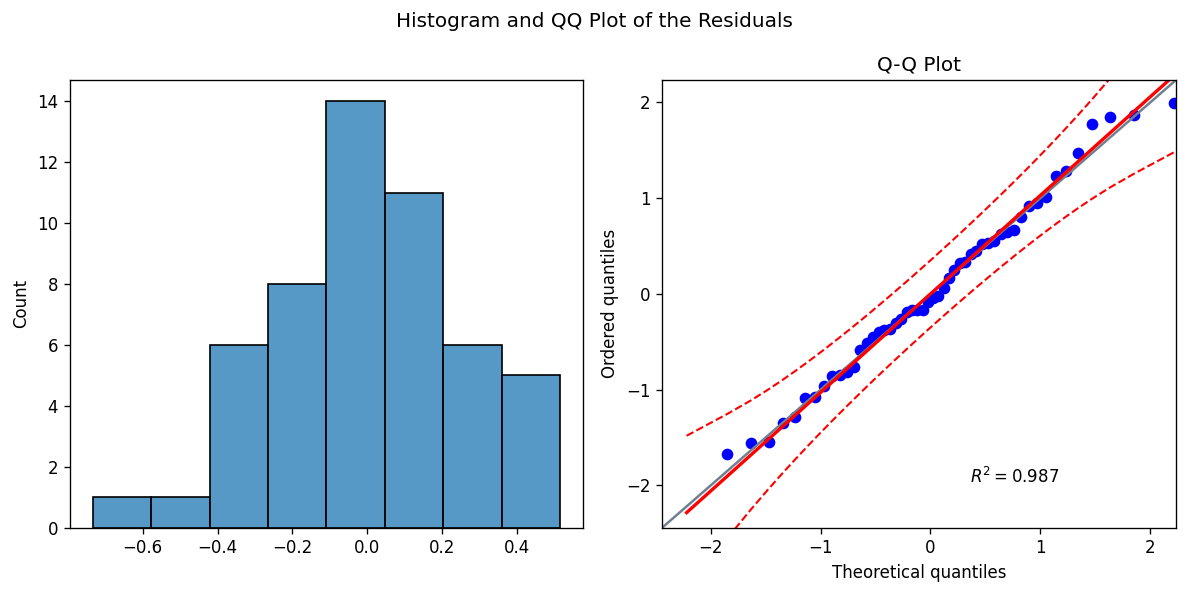

In [29]:
# Plotting the Histogram and QQ Plot of the Residuals

plt.rcParams["figure.figsize"] = [10, 5]
fig, ax =plt.subplots(1,2)
plt.suptitle('Histogram and QQ Plot of the Residuals')
sns.histplot(final_model.resid, ax=ax[0])
pg.qqplot(final_model.resid, confidence=0.95, dist='norm', ax=ax[1])
fig.tight_layout()

We note that several of the regressors have a p-value over 0.05. We will visualize a plot of AIC versus step. 

### AIC Versus Forward Stepwise Regression Step

Text(0.5, 1.0, 'AIC Versus Step in Forward Stepwise Regression')

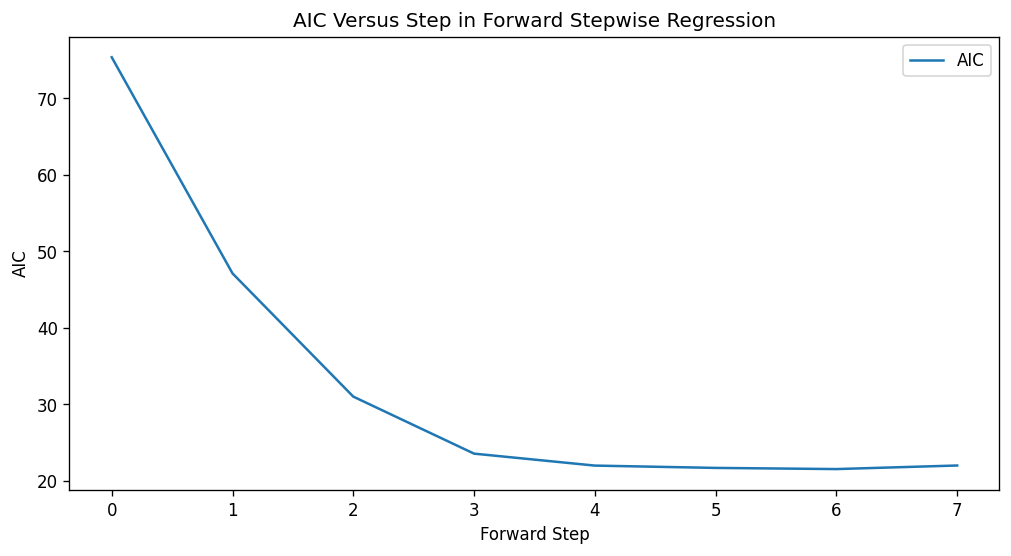

In [30]:
plt.plot(aics, label='AIC')
plt.xlabel('Forward Step')
plt.ylabel('AIC')
plt.legend()
plt.title('AIC Versus Step in Forward Stepwise Regression')

This gives us good evidence that though we could decrease our AIC further, we are not getting much of a decrease after 4 regressors.

In [31]:
final_model, aics=forward_stepwise_regression('GCI: Average', all_averages, df, 3)

In [32]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           GCI: Average   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              2517.
Date:                Thu, 12 May 2022   Prob (F-statistic):                    1.21e-53
Time:                        17:43:55   Log-Likelihood:                         -12.500
No. Observations:                  52   AIC:                                      31.00
Df Residuals:                      49   BIC:                                      36.85
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Ego Integrity: Average     0.3821      0.072      5.335      0.000       0.238       0.526
Gratitude: Average         0.3689      0.059      6.240      0.000       0.250       0.488
Connection: Average        0.2501      0.055      4.518      0.000       0.139       0.361
==============================================================================
Omnibus:                        1.205   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.548   Jarque-Bera (JB):                1.123
Skew:                           0.342   Prob(JB):                        0.570
Kurtosis:                       2.775   Cond. No.                         13.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We ran this with 3 and 4 regressors, and on the 4th regressor, it added Resilience, which has very high correlation with Gratitude. So, we stop at 3 regressors.

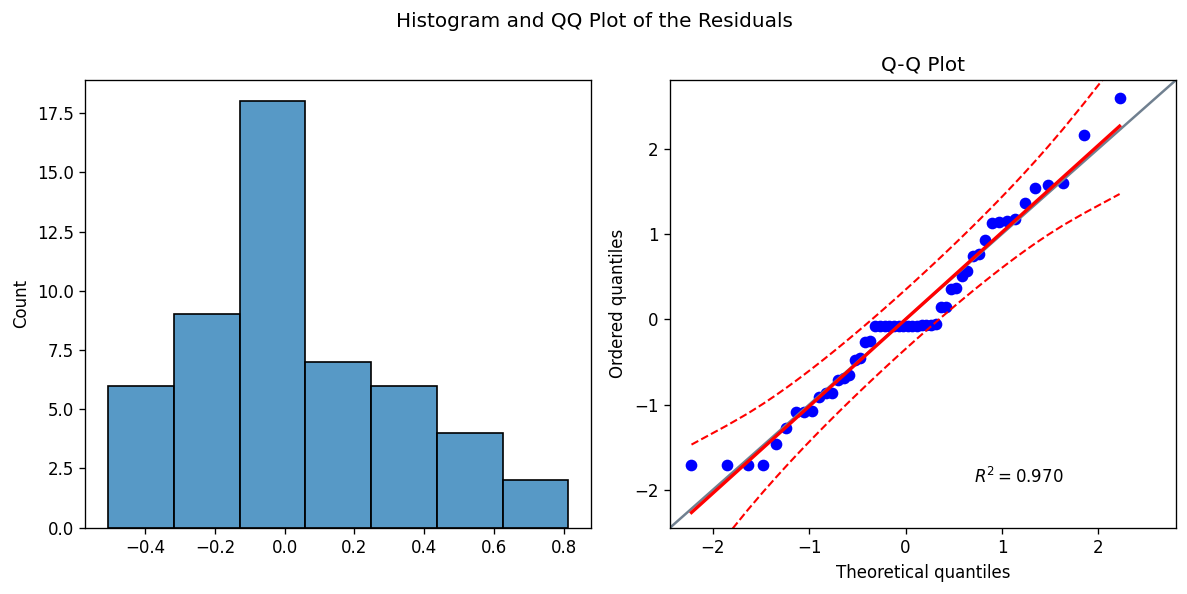

In [33]:
# Plotting the Histogram and QQ Plot of the Residuals

plt.rcParams["figure.figsize"] = [10, 5]
fig, ax =plt.subplots(1,2)
plt.suptitle('Histogram and QQ Plot of the Residuals')
sns.histplot(final_model.resid, ax=ax[0])
pg.qqplot(final_model.resid, confidence=0.95, dist='norm', ax=ax[1])
fig.tight_layout()

### Percent of Variance Explained by Each Regressor in the Final Model (Coefficient of Partial Determination)

For this, we use the following:

Coefficient of Partial Determination: Defined as the percentage of dispersion that can be described by the estimators specified in the fuller model but cannot be described in a reduced model.

$$Partial R^2=\dfrac{{SSR_{Reduced}-SSR_{Full}}}{SSR_{Reduced}}$$

In [34]:
reg_set=final_model.params
reg_set=list(reg_set.keys())
reg_set

['Ego Integrity: Average', 'Gratitude: Average', 'Connection: Average']

In [35]:
def var_exp_regs(y, reg_set, data_frame):
    steps=len(reg_set)
    
    # Getting the full model's r-squared
    full_model= sm.OLS(endog=data_frame[y], exog=data_frame[reg_set]).fit()
    ssr_full=full_model.ssr
    print('The Sum of Squared Residuals for the full model fit with', reg_set, 'is', round(ssr_full,5))
    print('To calculate the Partial R-squared, we calculate (SSR_reduced-SSR_full)/SSR_reduced.')
    
    # Comparing a model fit with the other regressors minus a specific one
    for reg in reg_set:
        modified_reg_set = reg_set.copy()
        modified_reg_set.remove(reg)
        
        model_mod_reg_set= sm.OLS(endog=data_frame[y], exog=data_frame[modified_reg_set]).fit()
        ssr_red = model_mod_reg_set.ssr 
        partial_r_squared=(ssr_red-ssr_full)/ssr_red
        print('\n')
        print('The Sum of Squared Residuals of the model fit with only', modified_reg_set, 'is', round(ssr_red,5))
        print('The Partial R-squared, or the percent of the variation, described by adding', reg, 'to a model fit with only', modified_reg_set, 'is', 100*round(partial_r_squared, 5))    

In [36]:
var_exp_regs('GCI: Average', reg_set, df)

The Sum of Squared Residuals for the full model fit with ['Ego Integrity: Average', 'Gratitude: Average', 'Connection: Average'] is 4.92406
To calculate the Partial R-squared, we calculate (SSR_reduced-SSR_full)/SSR_reduced.


The Sum of Squared Residuals of the model fit with only ['Gratitude: Average', 'Connection: Average'] is 7.78439
The Partial R-squared, or the percent of the variation, described by adding Ego Integrity: Average to a model fit with only ['Gratitude: Average', 'Connection: Average'] is 36.744


The Sum of Squared Residuals of the model fit with only ['Ego Integrity: Average', 'Connection: Average'] is 8.83706
The Partial R-squared, or the percent of the variation, described by adding Gratitude: Average to a model fit with only ['Ego Integrity: Average', 'Connection: Average'] is 44.279


The Sum of Squared Residuals of the model fit with only ['Ego Integrity: Average', 'Gratitude: Average'] is 6.97527
The Partial R-squared, or the percent of the variation, describ

37% of the GCI variability is explained by the Ego Integrity in the full model versus the reduced model.

Or, for the clients, 37% of the GCI is explained by Ego Integrity after including in the model Gratitude and Connection.

Is the reason they don't add up to 100% because of collinarity? 

https://stats.stackexchange.com/questions/155497/should-partial-r2-add-up-to-total-r2-in-multiple-regression

In [37]:
# Getting the correlations between the regressors of the final model

for col in reg_set:
    for sec_col in reg_set:
        if col == sec_col:
            pass
        else:
            corr, pvalue=stats.spearmanr(df[col], df[sec_col])
            print('The correlation between', col, 'and', sec_col, 'is:', round(corr,5))

The correlation between Ego Integrity: Average and Gratitude: Average is: 0.8074
The correlation between Ego Integrity: Average and Connection: Average is: 0.81845
The correlation between Gratitude: Average and Ego Integrity: Average is: 0.8074
The correlation between Gratitude: Average and Connection: Average is: 0.70036
The correlation between Connection: Average and Ego Integrity: Average is: 0.81845
The correlation between Connection: Average and Gratitude: Average is: 0.70036


### Impact of Age

In [38]:
# Scaling Function

def one_to_25_to_1_5(value):
    new_val=1+(4/24)*(value-1)
    return new_val

In [39]:
# Creating our augmented dataframe from either df or df_prime

def Augmented_DF(reg_set, df):
    X_aug=[df['Dem: Age']]
    for reg in reg_set:
        X_aug.append(list(df[reg]))
        reg_age=[]
        for i in range(len(df['Dem: Age'])):
            val=df[reg].iloc[i]*df['Dem: Age'].iloc[i]
            transformed_val=one_to_25_to_1_5(val)
            reg_age.append(transformed_val)
        X_aug.append(reg_age)
    
    col_names=['Age']
    for reg in reg_set:
        col_names.append(reg)
        col_names.append(reg+'*Age')
    df_aug=pd.DataFrame(np.array(X_aug).transpose(), 
                    columns=col_names)
    return df_aug, col_names

In [40]:
def forward_stepwise_regression_interaction(y, x_regs, df_y, df_aug, max_steps):
    orig_set=x_regs.copy() # To keep from changing the x_regs set in the notebook
    min_regs=[]
    min_aics=[]
    step=0
    while True:
        step=step+1
        if max_steps != 'None':
            if step == max_steps:
                break
        if len(min_aics) == 0:
            aics=[]
            for reg in orig_set:
                model=sm.OLS(endog=df_y[y], exog=df_aug[reg]).fit()
                aic=model.aic
                aics.append(aic)
            min_aic=min(aics)
            min_aic_index=aics.index(min_aic)
            min_aics.append(min_aic)
            min_reg=orig_set[min_aic_index]
            min_regs.append(min_reg)
            orig_set.remove(min_reg)
        if len(min_aics) != 0:
            aics=[]
            for reg in orig_set:
                mult_regs=min_regs.copy()
                mult_regs.extend([reg])
                model=sm.OLS(endog=df_y[y], exog=df_aug[mult_regs]).fit()
                aic=model.aic
                aics.append(aic)
            min_aic=min(aics)
            min_aic_index=aics.index(min_aic)
            min_aics.append(min_aic)
            if min_aics[-2] <= min_aics[-1]:
                break
            else:
                min_reg=orig_set[min_aic_index]
                min_regs.append(min_reg)
                orig_set.remove(min_reg)
    model=sm.OLS(endog=df_y[y], exog=df_aug[min_regs]).fit()
    return model, min_aics

In [41]:
# Getting the final model's regressors:

reg_set=[]
for i in range(len(final_model.params)):
    reg_set.append(final_model.params.index[i])
    
reg_set

['Ego Integrity: Average', 'Gratitude: Average', 'Connection: Average']

In [42]:
df_aug, col_names= Augmented_DF(reg_set, df)
df_aug

Age  Ego Integrity: Average  Ego Integrity: Average*Age  \
0   4.407407                     3.5                    3.404321   
1   2.481481                     2.5                    1.867284   
2   4.111111                     3.0                    2.888889   
3   3.074074                     5.0                    3.395062   
4   2.481481                     2.0                    1.660494   
5   1.592593                     5.0                    2.160494   
6   1.592593                     4.0                    1.895062   
7   1.888889                     4.0                    2.092593   
8   5.000000                     5.0                    5.000000   
9   2.925926                     5.0                    3.271605   
10  4.407407                     5.0                    4.506173   
11  3.370370                     2.0                    1.956790   
12  2.333333                     5.0                    2.777778   
13  2.481481                     5.0                    2.901235   
14  3.222222                     2.5                    2.175926   
15  1.296296                     2.5                    1.373457   
16  3.370370                     5.0                    3.641975   
17  1.444444                     5.0                    2.037037   
18  1.740741                     2.0                    1.413580   
19  4.703704                     3.0                    3.185185   
20  1.888889                     2.0                    1.462963   
21  1.296296                     2.0                    1.265432   
22  3.074074                     3.5                    2.626543   
23  1.888889                     4.0                    2.092593   
24  2.481481                     2.5                    1.867284   
25  2.629630                     3.0                    2.148148   
26  1.296296                     3.0                    1.481481   
27  3.074074                     4.5                    3.138889   
28  2.777778                     4.5                    2.916667   
29  3.222222                     4.5                    3.250000   
30  1.740741                     5.0                    2.283951   
31  2.333333                     4.5                    2.583333   
32  3.074074                     3.0                    2.370370   
33  1.740741                     5.0                    2.283951   
34  1.888889                     4.5                    2.250000   
35  1.888889                     5.0                    2.407407   
36  1.740741                     1.0                    1.123457   
37  2.777778                     1.5                    1.527778   
38  4.703704                     4.5                    4.361111   
39  4.703704                     2.5                    2.793210   
40  4.259259                     1.5                    1.898148   
41  2.925926                     2.0                    1.808642   
42  3.074074                     4.5                    3.138889   
43  2.037037                     1.0                    1.172840   
44  4.259259                     4.5                    4.027778   
45  2.333333                     3.0                    2.000000   
46  1.000000                     4.5                    1.583333   
47  2.629630                     3.0                    2.148148   
48  1.888889                     5.0                    2.407407   
49  2.037037                     5.0                    2.530864   
50  2.333333                     3.0                    2.000000   
51  2.629630                     4.5                    2.805556   

    Gratitude: Average  Gratitude: Average*Age  Connection: Average  \
0                  5.0                4.506173                  4.0   
1                  4.5                2.694444                  3.5   
2                  2.0                2.203704                  2.5   
3                  5.0                3.395062                  5.0   
4                  2.0                1.660494   

In [43]:
col_names

['Age',
 'Ego Integrity: Average',
 'Ego Integrity: Average*Age',
 'Gratitude: Average',
 'Gratitude: Average*Age',
 'Connection: Average',
 'Connection: Average*Age']

In [44]:
final_model, aics=forward_stepwise_regression_interaction('GCI: Average', col_names, df, df_aug, 'None')

In [45]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           GCI: Average   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1641.
Date:                Thu, 12 May 2022   Prob (F-statistic):                    1.65e-51
Time:                        17:43:59   Log-Likelihood:                         -9.2743
No. Observations:                  52   AIC:                                      28.55
Df Residuals:                      47   BIC:                                      38.30
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Ego Integrity: Average      0.3658      0.069      5.286      0.000       0.227       0.505
Gratitude: Average          0.3122      0.061      5.097      0.000       0.189       0.435
Connection: Average         0.3680      0.091      4.044      0.000       0.185       0.551
Age                         0.1975      0.091      2.176      0.035       0.015       0.380
Connection: Average*Age    -0.2686      0.170     -1.578      0.121      -0.611       0.074
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.886
Skew:                           0.265   Prob(JB):                        0.642
Kurtosis:                       2.643   Cond. No.                         36.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'AIC Versus Step in Forward Stepwise Regression')

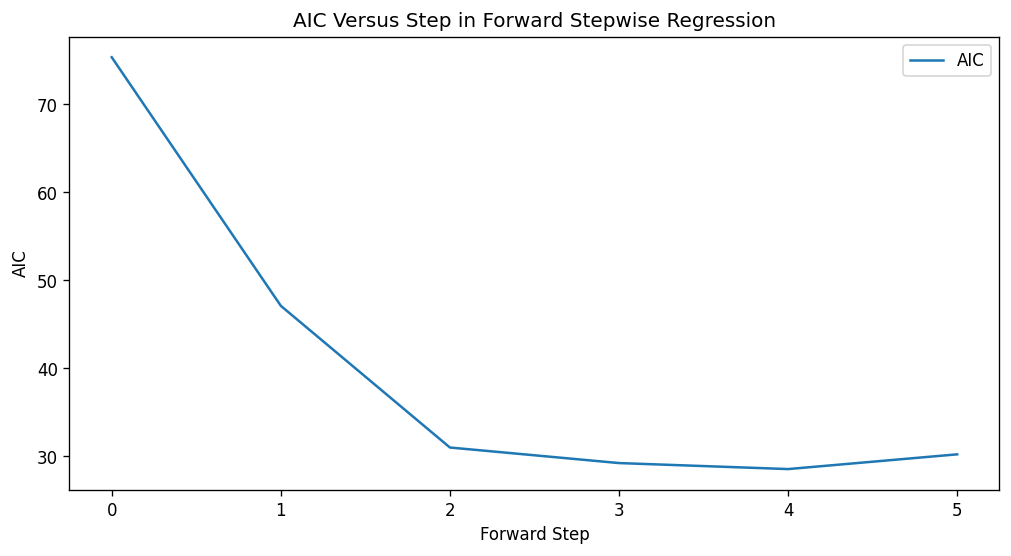

In [46]:
plt.plot(aics, label='AIC')
plt.xlabel('Forward Step')
plt.ylabel('AIC')
plt.legend()
plt.title('AIC Versus Step in Forward Stepwise Regression')

In [47]:
final_model, aics=forward_stepwise_regression_interaction('GCI: Average', col_names, df, df_aug, 3)

In [48]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           GCI: Average   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              2517.
Date:                Thu, 12 May 2022   Prob (F-statistic):                    1.21e-53
Time:                        17:44:00   Log-Likelihood:                         -12.500
No. Observations:                  52   AIC:                                      31.00
Df Residuals:                      49   BIC:                                      36.85
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Ego Integrity: Average     0.3821      0.072      5.335      0.000       0.238       0.526
Gratitude: Average         0.3689      0.059      6.240      0.000       0.250       0.488
Connection: Average        0.2501      0.055      4.518      0.000       0.139       0.361
==============================================================================
Omnibus:                        1.205   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.548   Jarque-Bera (JB):                1.123
Skew:                           0.342   Prob(JB):                        0.570
Kurtosis:                       2.775   Cond. No.                         13.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that with 3 regressors, Age as a main effect or any interaction effects do not show up. Even including Age does not improve the $R^2$ score and isn't even significant. So, Age does not matter for this model.

## Linear Regression with all Non-Meta-Factors as Regressors and Comp Meta Score as Target

### Individual Regressors and their P-values

We begin by building a simple Ordinary Least Squares linear regression model with each factor alone to view the p-values, coefficients, and $R^2$.

In [49]:
single_olss=[]
for i in range(len(non_meta_factor_averages)):
    single_ols=single_factor_lr(df[non_meta_factor_averages[i]], df['Meta-Factor Total'])
    single_olss.append(single_ols)

In [50]:
single_olss[0:2]

[[Generativity: Average    1.051592
  dtype: float64,
  0.9539392808119449,
  Generativity: Average    9.349842e-36
  dtype: float64],
 [Keeper of Meaning: Average    1.056345
  dtype: float64,
  0.925387857244323,
  Keeper of Meaning: Average    2.083764e-30
  dtype: float64]]

In [51]:
# Splitting the factors and their p-values

coeffs=[]
r_squareds=[]
p_vals=[]
factors=[]
for i in range(len(single_olss)):
    factors.append(single_olss[i][0].index[0])
    coeffs.append(single_olss[i][0][0])
    r_squareds.append(single_olss[i][1])
    p_vals.append(single_olss[i][2][0])

In [52]:
# Creating a dataframe of the factors, coefficients, R^2, and p-values, then sorting them by highest to lowest

coeff_r2_pvals = {'Factor': factors, 'Coefficient':coeffs, 'R-squared': r_squareds, 'P-Value': p_vals}
df_coeff_r2_pvals = pd.DataFrame(data=coeff_r2_pvals)
df_coeff_r2_pvals=df_coeff_r2_pvals.sort_values('R-squared', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
df_coeff_r2_pvals

Factor  Coefficient  R-squared  \
8                                       Mood: Average     0.985705   0.973391   
7    Tragic Optimism (realistic but hopeful): Average     1.030442   0.971009   
16                              Transparency: Average     1.008358   0.968746   
15                       Narrative Coherence: Average     1.005900   0.963404   
18                                   Control: Average     1.015802   0.963357   
3   Controllable Protective Factors: Only factor t...     0.993589   0.963226   
12                                Engagement: Average     0.878052   0.962744   
13                                    Candor: Average     0.965499   0.960647   
2                              Ego Integrity: Average     1.011796   0.958934   
20                                Continuity: Average     0.906321   0.958551   
11                                 Cognitive: Average     0.880990   0.957700   
17                              Youthfulness: Average     0.988217   0.956656   
10                                    Energy: Average     0.968453   0.956114   
0                               Generativity: Average     1.051592   0.953939   
9                                    Anxiety: Average     1.064853   0.951902   
19                                Competence: Average     1.001629   0.950288   
6                             Sense of Humor: Average     1.113317   0.947946   
5                           Healthy Grieving: Average     1.034170   0.946689   
4              Reliable Attachment Figure(s): Average     0.942013   0.936117   
22                                Connection: Average     1.054727   0.929764   
21                             Consciousness: Average     1.101050   0.926422   
1                          Keeper of Meaning: Average     1.056345   0.925388   
14                               Open System: Average     1.163510   0.904571   

         P-Value  
8   7.763771e-42  
7   6.918233e-41  
16  4.705777e-40  
15  2.637809e-38  
18  2.725498e-38  
3   2.985958e-38  
12  4.162291e-38  
13  1.683529e-37  
2   4.996109e-37  
20  6.332039e-37  
11  1.063460e-36  
17  1.981837e-36  
10  2.720215e-36  
0   9.349842e-36  
9   2.821334e-35  
19  6.553919e-35  
6   2.122550e-34  
5   3.901703e-34  
4   3.955289e-32  
22  4.451025e-31  
21  1.458762e-30  
1   2.083764e-30  
14  1.118882e-27

### Forward Stepwise Regression

With 23 regressors, we have a $2^{23}-1$ possible combinations. An exhaustive search is infeasible. So, we will perform Forward Stepwise Regression, wherein we fit the model with one regressor at time and keep the regressor whose model has the lowest AIC. Then, we fit that regressor with the others and keep the model with the lowest AIC. So on and so forth until adding regressors no longer decreases the AIC. 

In [53]:
final_model, aics=forward_stepwise_regression('Meta-Factor Total', non_meta_factor_averages, df, 'None')

In [54]:
# Seeing the final model

final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Meta-Factor Total   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              506.8
Date:                Thu, 12 May 2022   Prob (F-statistic):                    1.34e-40
Time:                        17:44:03   Log-Likelihood:                         -31.295
No. Observations:                  52   AIC:                                      76.59
Df Residuals:                      45   BIC:                                      90.25
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Mood: Average                                       -0.0266      0.148     -0.180      0.858      -0.325       0.271
Tragic Optimism (realistic but hopeful): Average     0.3253      0.146      2.227      0.031       0.031       0.620
Cognitive: Average                                   0.1342      0.091      1.468      0.149      -0.050       0.318
Transparency: Average                                0.3896      0.121      3.209      0.002       0.145       0.634
Ego Integrity: Average                               0.2020      0.119      1.702      0.096      -0.037       0.441
Consciousness: Average                              -0.2744      0.100     -2.742      0.009      -0.476      -0.073
Control: Average                                     0.2387      0.124      1.922      0.061      -0.011       0.489
==============================================================================
Omnibus:                       10.975   Durbin-Watson:                   2.257
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               32.068
Skew:                           0.094   Prob(JB):                     1.09e-07
Kurtosis:                       6.843   Cond. No.                         29.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

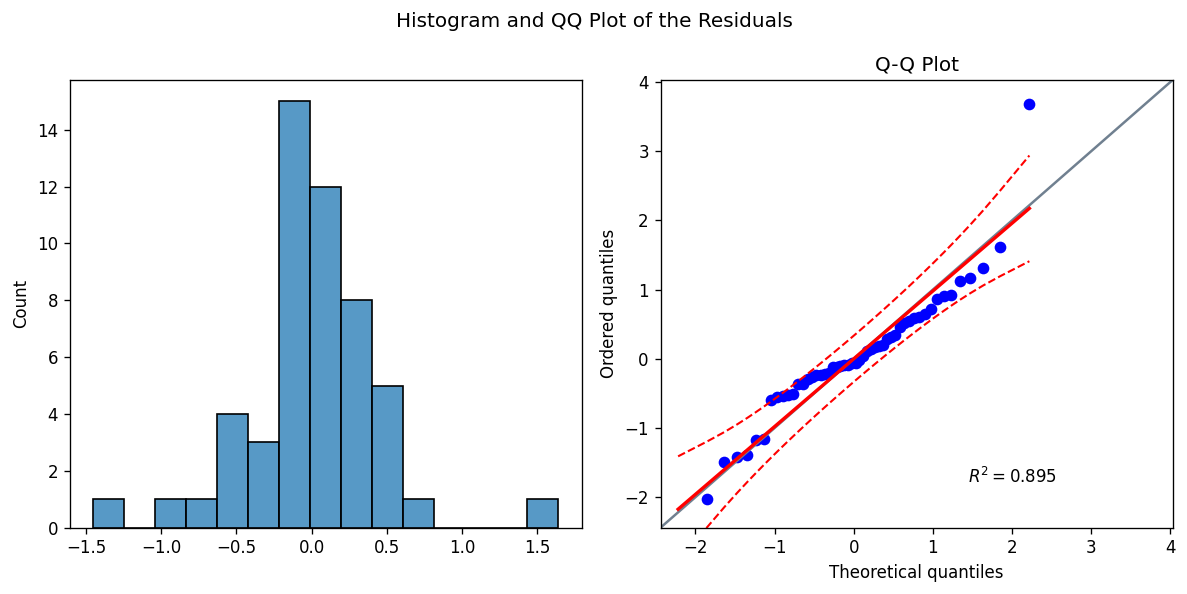

In [55]:
# Plotting the Histogram and QQ Plot of the Residuals

plt.rcParams["figure.figsize"] = [10, 5]
fig, ax =plt.subplots(1,2)
plt.suptitle('Histogram and QQ Plot of the Residuals')
sns.histplot(final_model.resid, ax=ax[0])
pg.qqplot(final_model.resid, confidence=0.95, dist='norm', ax=ax[1])
fig.tight_layout()

We note that several of the regressors have a p-value over 0.05. Let's look at Mood and Consciousness. They have a correlation coefficient of 0.62. Let's remove the outlier, starting with the one with the large value of 1.5.

### Refitting without Potential Outliers

Our fit is mostly good, but there does appear to be some problematic values. I can remove them and refit my final model. If the final model is any different, they are important. Otherwise, they aren't a big deal. I will find the data instances with residuals more $\geq1.5$

In [56]:
# Getting the index of the potential outlier

residuals=list(final_model.resid)
indices=[]
for resid in residuals:
    if resid >= 1.5:
        indices.append(residuals.index(resid))
print('Indices of residuals of interest:', indices)

Indices of residuals of interest: [37]


In [57]:
# Getting the details about this point

df.iloc[37]

Case Number                  38
Dem: Age               2.777778
Dem: Gender                   M
Dem: Marital Status           D
Dem: Ethnicity                W
                         ...   
Connection: Average         1.5
GCI: SF                       2
GCI: BG                       1
GCI: Average                1.5
Meta-Factor Total           4.5
Name: 37, Length: 96, dtype: object

Now, we will remove this data point and refit the model

In [58]:
# Removing the row

df_prime=df.copy()
for row in indices:
    df_prime=df_prime.drop(labels=row, axis=0)

In [59]:
# Confirming that the row is removed

df_prime

Case Number  Dem: Age Dem: Gender Dem: Marital Status Dem: Ethnicity  \
0             1  4.407407           M                   W              W   
1             2  2.481481           F                   W              W   
2             3  4.111111           M                   W              W   
3             4  3.074074           M                   M              W   
4             5  2.481481           M                   M              W   
5             6  1.592593           F                   W              W   
6             7  1.592593           M                   M              W   
7             8  1.888889           F                   W              W   
8             9  5.000000           F                   W              W   
9            10  2.925926           M                   M              W   
10           11  4.407407           M                   M              W   
11           12  3.370370           M                   D              W   
12           13  2.333333           F                   W              W   
13           14  2.481481           M                   M              W   
14           15  3.222222           M                   W              W   
15           16  1.296296           M                   M              W   
16           17  3.370370           F                   M              W   
17           18  1.444444           F                   M              W   
18           19  1.740741           F                   M              W   
19           20  4.703704           M                   M              W   
20           21  1.888889           M                   M              W   
21           22  1.296296           M                   D              W   
22           23  3.074074           M                   M              W   
23           24  1.888889           M                   M              W   
24           25  2.481481           F                   M              W   
25           26  2.629630           M                   M              W   
26           27  1.296296           F                   M              W   
27           28  3.074074           M                   M              L   
28           29  2.777778           F                   W              W   
29           30  3.222222           F                   D              W   
30           31  1.740741           M                   M              B   
31           32  2.333333           F                   D              B   
32           33  3.074074           M                   M              B   
33           34  1.740741           F                   D           H-NA   
34           35  1.888889           F                   S              B   
35           36  1.888889           M                   M              B   
36           37  1.740741           M                   D              W   
38           39  4.703704           F                   W              W   
39           40  4.703704           F                   W              W   
40           41  4.259259           F                   S              W   
41           42  2.925926           F                   D              W   
42           43  3.074074           F                   D              W   
43           44  2.037037           F                   D              W   
44           45  4.259259           F                   W              B   
45           46  2.333333           M                   W              W   
46           47  1.000000           F                   D              W   
47           48  2.629630           M                   D              W   
48           49  1.888889           M                   M              L   
49           50  2.037037           F                   M              L   
50           51  2.333333           F                   M              A   
51           52  2.629630           M                   M         W-Arab   

   Dem: Socio-Economic Staus Dem: Residential Statu

We have successfully dropped the potentially problematic data instances. We will now rerun the forward stepwise regression.

In [60]:
final_model, aics=forward_stepwise_regression('Meta-Factor Total', non_meta_factor_averages, df_prime, 'None')

In [61]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Meta-Factor Total   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              866.2
Date:                Thu, 12 May 2022   Prob (F-statistic):                    6.50e-45
Time:                        17:44:10   Log-Likelihood:                         -12.476
No. Observations:                  51   AIC:                                      40.95
Df Residuals:                      43   BIC:                                      56.41
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Mood: Average                                        0.1917      0.096      1.997      0.052      -0.002       0.385
Generativity: Average                                0.2660      0.068      3.919      0.000       0.129       0.403
Narrative Coherence: Average                         0.2068      0.082      2.507      0.016       0.040       0.373
Tragic Optimism (realistic but hopeful): Average     0.3317      0.091      3.658      0.001       0.149       0.515
Consciousness: Average                              -0.1807      0.070     -2.579      0.013      -0.322      -0.039
Control: Average                                     0.1819      0.082      2.214      0.032       0.016       0.348
Cognitive: Average                                   0.1767      0.076      2.315      0.025       0.023       0.331
Engagement: Average                                 -0.1595      0.089     -1.789      0.081      -0.339       0.020
==============================================================================
Omnibus:                        0.823   Durbin-Watson:                   2.352
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.468
Skew:                          -0.233   Prob(JB):                        0.791
Kurtosis:                       3.057   Cond. No.                         28.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

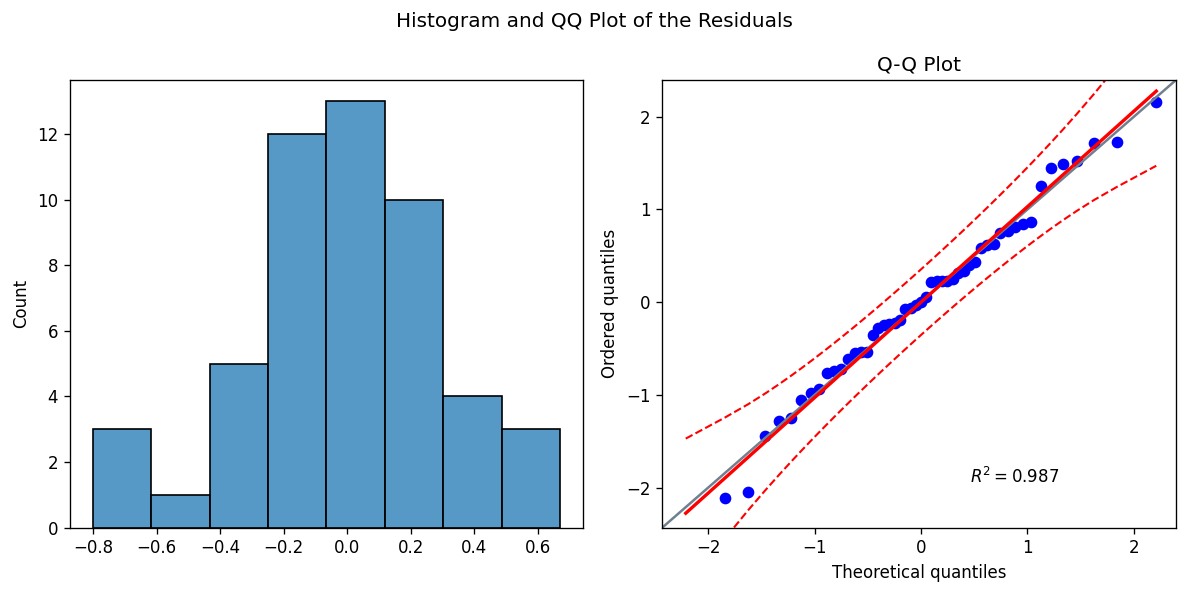

In [62]:
# Plotting the Histogram and QQ Plot of the Residuals

plt.rcParams["figure.figsize"] = [10, 5]
fig, ax =plt.subplots(1,2)
plt.suptitle('Histogram and QQ Plot of the Residuals')
sns.histplot(final_model.resid, ax=ax[0])
pg.qqplot(final_model.resid, confidence=0.95, dist='norm', ax=ax[1])
fig.tight_layout()

### AIC Versus Forward Stepwise Regression

Text(0.5, 1.0, 'AIC Versus Step in Forward Stepwise Regression')

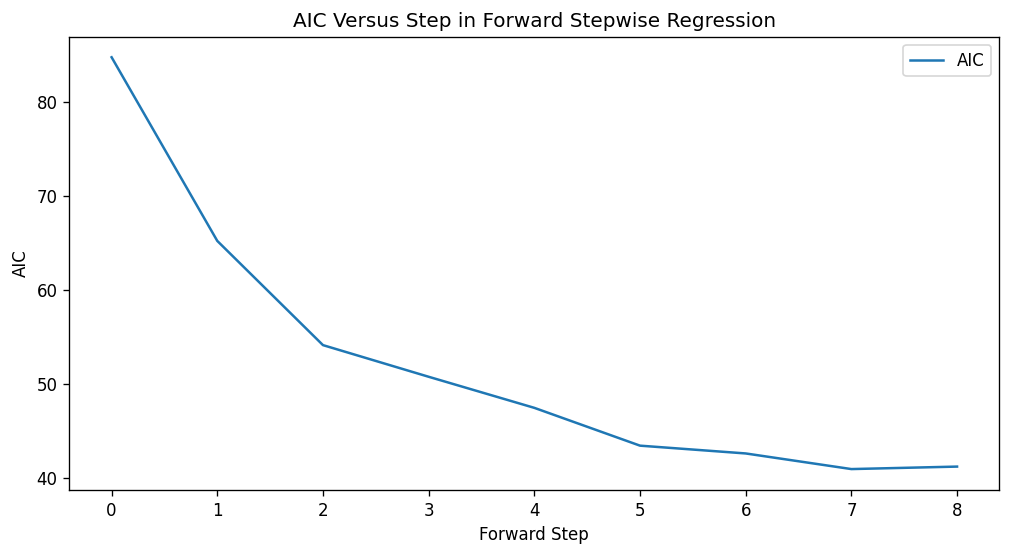

In [63]:
plt.plot(aics, label='AIC')
plt.xlabel('Forward Step')
plt.ylabel('AIC')
plt.legend()
plt.title('AIC Versus Step in Forward Stepwise Regression')

This gives us good evidence that though we could decrease our AIC further, we are not getting much of a decrease after 6 regressors.

In [64]:
final_model, aics=forward_stepwise_regression('Meta-Factor Total', non_meta_factor_averages, df_prime, 6)

In [65]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Meta-Factor Total   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1063.
Date:                Thu, 12 May 2022   Prob (F-statistic):                    9.41e-47
Time:                        17:44:18   Log-Likelihood:                         -15.721
No. Observations:                  51   AIC:                                      43.44
Df Residuals:                      45   BIC:                                      55.03
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Mood: Average                                        0.2259      0.092      2.461      0.018       0.041       0.411
Generativity: Average                                0.2666      0.070      3.821      0.000       0.126       0.407
Narrative Coherence: Average                         0.2421      0.077      3.142      0.003       0.087       0.397
Tragic Optimism (realistic but hopeful): Average     0.2877      0.092      3.129      0.003       0.103       0.473
Consciousness: Average                              -0.2093      0.072     -2.915      0.006      -0.354      -0.065
Control: Average                                     0.1969      0.083      2.375      0.022       0.030       0.364
==============================================================================
Omnibus:                        2.207   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.332   Jarque-Bera (JB):                1.531
Skew:                          -0.414   Prob(JB):                        0.465
Kurtosis:                       3.182   Cond. No.                         22.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's run a regression with the other 4 as regressors and Consciousness as the outcome and if we get a high $R^2$, then it just means that the other 4 aready account for a lot.

In [66]:
# Regressing all non-Consciousness against consciousness

testing_regs = ['Mood: Average', 'Generativity: Average', 'Narrative Coherence: Average',
               'Tragic Optimism (realistic but hopeful): Average', 'Control: Average']
testing_model, _ = forward_stepwise_regression('Consciousness: Average', testing_regs, df_prime, 'None')

In [67]:
testing_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Consciousness: Average   R-squared (uncentered):                   0.960
Model:                                OLS   Adj. R-squared (uncentered):              0.957
Method:                     Least Squares   F-statistic:                              380.1
Date:                    Thu, 12 May 2022   Prob (F-statistic):                    1.96e-33
Time:                            17:44:26   Log-Likelihood:                         -54.099
No. Observations:                      51   AIC:                                      114.2
Df Residuals:                          48   BIC:                                      120.0
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Tragic Optimism (realistic but hopeful): Average     0.3530      0.138      2.557      0.014       0.075       0.631
Control: Average                                     0.2895      0.149      1.943      0.058      -0.010       0.589
Narrative Coherence: Average                         0.2523      0.150      1.684      0.099      -0.049       0.553
==============================================================================
Omnibus:                        0.935   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.626   Jarque-Bera (JB):                0.970
Skew:                           0.202   Prob(JB):                        0.616
Kurtosis:                       2.458   Cond. No.                         12.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This leads us to the conclusion that Consciousness is not needed, so we stop at step 4 to not get it.

In [70]:
final_model, aics=forward_stepwise_regression('Meta-Factor Total', non_meta_factor_averages, df_prime, 4)

In [71]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Meta-Factor Total   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              1332.
Date:                Thu, 12 May 2022   Prob (F-statistic):                    1.04e-47
Time:                        17:44:50   Log-Likelihood:                         -21.385
No. Observations:                  51   AIC:                                      50.77
Df Residuals:                      47   BIC:                                      58.50
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Mood: Average                                        0.3192      0.092      3.457      0.001       0.133       0.505
Generativity: Average                                0.2470      0.074      3.320      0.002       0.097       0.397
Narrative Coherence: Average                         0.2393      0.074      3.235      0.002       0.090       0.388
Tragic Optimism (realistic but hopeful): Average     0.2208      0.097      2.284      0.027       0.026       0.415
==============================================================================
Omnibus:                        2.929   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.231   Jarque-Bera (JB):                2.036
Skew:                          -0.273   Prob(JB):                        0.361
Kurtosis:                       3.812   Cond. No.                         16.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

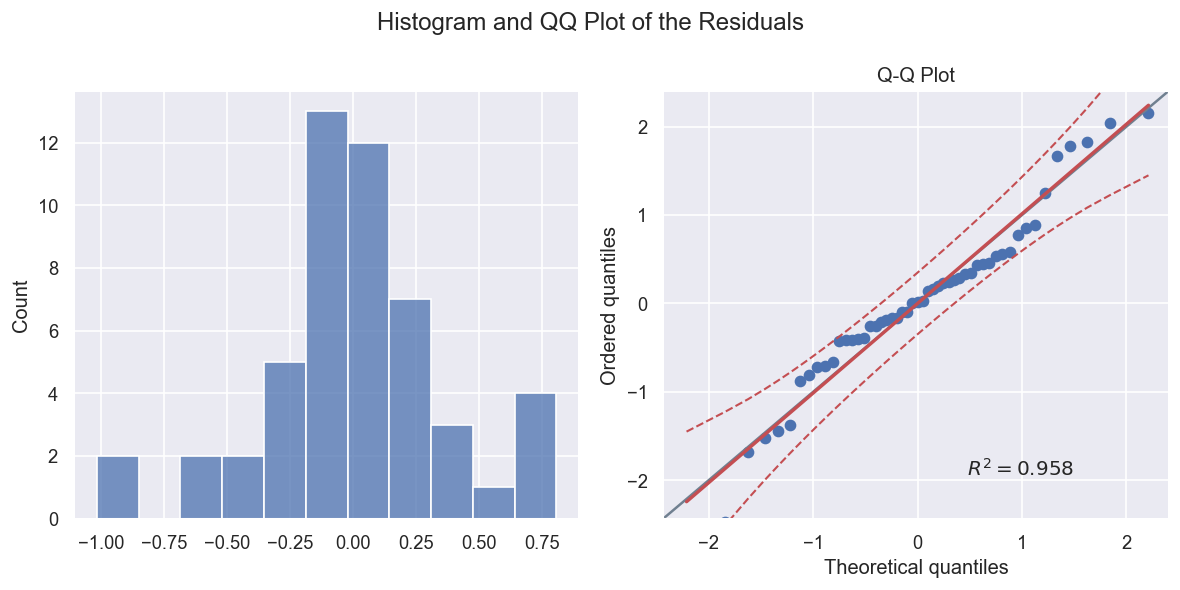

In [117]:
# Plotting the Histogram and QQ Plot of the Residuals

plt.rcParams["figure.figsize"] = [10, 5]
fig, ax =plt.subplots(1,2)
plt.suptitle('Histogram and QQ Plot of the Residuals')
sns.histplot(final_model.resid, ax=ax[0])
pg.qqplot(final_model.resid, confidence=0.95, dist='norm', ax=ax[1])
fig.tight_layout()

### Percent of Variance Explained by Each Regressor in the Final Model

In [118]:
reg_set=final_model.params
reg_set=list(reg_set.keys())
reg_set

['Mood: Average',
 'Generativity: Average',
 'Narrative Coherence: Average',
 'Tragic Optimism (realistic but hopeful): Average']

In [119]:
var_exp_regs('Meta-Factor Total', reg_set, df)

The Sum of Squared Residuals for the full model fit with ['Mood: Average', 'Generativity: Average', 'Narrative Coherence: Average', 'Tragic Optimism (realistic but hopeful): Average'] is 13.91977
To calculate the Partial R-squared, we calculate (SSR_reduced-SSR_full)/SSR_reduced.


The Sum of Squared Residuals of the model fit with only ['Generativity: Average', 'Narrative Coherence: Average', 'Tragic Optimism (realistic but hopeful): Average'] is 15.83817
The Partial R-squared, or the percent of the variation, described by adding Mood: Average to a model fit with only ['Generativity: Average', 'Narrative Coherence: Average', 'Tragic Optimism (realistic but hopeful): Average'] is 12.112


The Sum of Squared Residuals of the model fit with only ['Mood: Average', 'Narrative Coherence: Average', 'Tragic Optimism (realistic but hopeful): Average'] is 14.61961
The Partial R-squared, or the percent of the variation, described by adding Generativity: Average to a model fit with only ['Mood: A

In [120]:
# Getting the correlations between the regressors of the final model

for col in reg_set:
    for sec_col in reg_set:
        if col == sec_col:
            pass
        else:
            corr, pvalue=stats.spearmanr(df[col], df[sec_col])
            print('The correlation between', col, 'and', sec_col, 'is:', round(corr,5))

The correlation between Mood: Average and Generativity: Average is: 0.69914
The correlation between Mood: Average and Narrative Coherence: Average is: 0.60333
The correlation between Mood: Average and Tragic Optimism (realistic but hopeful): Average is: 0.825
The correlation between Generativity: Average and Mood: Average is: 0.69914
The correlation between Generativity: Average and Narrative Coherence: Average is: 0.58944
The correlation between Generativity: Average and Tragic Optimism (realistic but hopeful): Average is: 0.72927
The correlation between Narrative Coherence: Average and Mood: Average is: 0.60333
The correlation between Narrative Coherence: Average and Generativity: Average is: 0.58944
The correlation between Narrative Coherence: Average and Tragic Optimism (realistic but hopeful): Average is: 0.69478
The correlation between Tragic Optimism (realistic but hopeful): Average and Mood: Average is: 0.825
The correlation between Tragic Optimism (realistic but hopeful): Aver

### Impact of Age

In [121]:
# Getting the final model's regressors:

reg_set=[]
for i in range(len(final_model.params)):
    reg_set.append(final_model.params.index[i])
    
reg_set

['Mood: Average',
 'Generativity: Average',
 'Narrative Coherence: Average',
 'Tragic Optimism (realistic but hopeful): Average']

In [122]:
df_aug, col_names= Augmented_DF(reg_set, df_prime)
df_prime=df_prime.reset_index()
df_aug

Age  Mood: Average  Mood: Average*Age  Generativity: Average  \
0   4.407407            4.5           4.138889                    3.5   
1   2.481481            4.0           2.487654                    3.0   
2   4.111111            3.0           2.888889                    2.0   
3   3.074074            5.0           3.395062                    5.0   
4   2.481481            2.0           1.660494                    2.0   
5   1.592593            5.0           2.160494                    5.0   
6   1.592593            4.0           1.895062                    4.0   
7   1.888889            5.0           2.407407                    4.5   
8   5.000000            5.0           5.000000                    4.0   
9   2.925926            3.0           2.296296                    5.0   
10  4.407407            5.0           4.506173                    5.0   
11  3.370370            3.0           2.518519                    3.0   
12  2.333333            3.0           2.000000                    4.0   
13  2.481481            5.0           2.901235                    5.0   
14  3.222222            3.0           2.444444                    3.5   
15  1.296296            3.5           1.589506                    3.0   
16  3.370370            5.0           3.641975                    3.5   
17  1.444444            4.5           1.916667                    3.0   
18  1.740741            4.0           1.993827                    2.5   
19  4.703704            4.0           3.969136                    3.0   
20  1.888889            3.5           1.935185                    2.0   
21  1.296296            2.5           1.373457                    2.5   
22  3.074074            4.5           3.138889                    5.0   
23  1.888889            5.0           2.407407                    4.5   
24  2.481481            4.0           2.487654                    4.5   
25  2.629630            3.0           2.148148                    2.5   
26  1.296296            3.5           1.589506                    2.5   
27  3.074074            4.0           2.882716                    3.5   
28  2.777778            4.5           2.916667                    2.5   
29  3.222222            4.5           3.250000                    3.0   
30  1.740741            5.0           2.283951                    4.5   
31  2.333333            4.0           2.388889                    4.0   
32  3.074074            3.0           2.370370                    4.0   
33  1.740741            5.0           2.283951                    4.5   
34  1.888889            4.0           2.092593                    3.0   
35  1.888889            4.0           2.092593                    5.0   
36  1.740741            2.5           1.558642                    1.0   
37  4.703704            4.0           3.969136                    4.0   
38  4.703704            3.5           3.577160                    2.5   
39  4.259259            2.5           2.608025                    1.5   
40  2.925926            2.5           2.052469                    2.5   
41  3.074074            4.0           2.882716                    4.0   
42  2.037037            2.5           1.682099                    1.0   
43  4.259259            4.5           4.027778                    4.5   
44  2.333333            3.0           2.000000                    3.0   
45  1.000000            4.0           1.500000                    5.0   
46  2.629630            2.5           1.929012                    2.0   
47  1.888889            5.0           2.407407                    4.5   
48  2.037037            4.5           2.361111                    5.0   
49  2.333333            4.0           2.388889                    3.0   
50  2.629630            4.5           2.805556                    5.0   

    Generativity: Average*Age  Narrative Coherence: Average  \
0                    3.404321                           4.5   
1                    2.074074                           4.0   
2                    2.

In [123]:
final_model, aics=forward_stepwise_regression_interaction('Meta-Factor Total', col_names, df_prime, df_aug, 'None')

In [124]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Meta-Factor Total   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              1332.
Date:                Mon, 09 May 2022   Prob (F-statistic):                    1.04e-47
Time:                        18:18:54   Log-Likelihood:                         -21.385
No. Observations:                  51   AIC:                                      50.77
Df Residuals:                      47   BIC:                                      58.50
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Mood: Average                                        0.3192      0.092      3.457      0.001       0.133       0.505
Generativity: Average                                0.2470      0.074      3.320      0.002       0.097       0.397
Narrative Coherence: Average                         0.2393      0.074      3.235      0.002       0.090       0.388
Tragic Optimism (realistic but hopeful): Average     0.2208      0.097      2.284      0.027       0.026       0.415
==============================================================================
Omnibus:                        2.929   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.231   Jarque-Bera (JB):                2.036
Skew:                          -0.273   Prob(JB):                        0.361
Kurtosis:                       3.812   Cond. No.                         16.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that Age has no effect.

## Linear Regression with all Meta-Factors as Regressors and GCI as Target

### Individual Regressors and their P-values

We begin by building a simple Ordinary Least Squares linear regression model with each factor alone to view the p-values, coefficients, and $R^2$.

In [125]:
single_olss=[]
for i in range(len(meta_factors_avg)):
    single_ols=single_factor_lr(df[meta_factors_avg[i]], df['GCI: Average'])
    single_olss.append(single_ols)

In [126]:
single_olss[0:2]

[[Gratitude: Average    0.940083
  dtype: float64,
  0.9800861614207842,
  Gratitude: Average    4.771773e-45
  dtype: float64],
 [Active Habits: Physical, Mental, Social: Average    0.95377
  dtype: float64,
  0.959701572118971,
  Active Habits: Physical, Mental, Social: Average    3.086465e-37
  dtype: float64]]

In [127]:
# Splitting the factors and their p-values

coeffs=[]
r_squareds=[]
p_vals=[]
factors=[]
for i in range(len(single_olss)):
    factors.append(single_olss[i][0].index[0])
    coeffs.append(single_olss[i][0][0])
    r_squareds.append(single_olss[i][1])
    p_vals.append(single_olss[i][2][0])

In [128]:
# Creating a dataframe of the factors, coefficients, R^2, and p-values, then sorting them by highest to lowest

coeff_r2_pvals = {'Factor': factors, 'Coefficient':coeffs, 'R-squared': r_squareds, 'P-Value': p_vals}
df_coeff_r2_pvals = pd.DataFrame(data=coeff_r2_pvals)
df_coeff_r2_pvals=df_coeff_r2_pvals.sort_values('R-squared', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
df_coeff_r2_pvals

Factor  Coefficient  R-squared  \
0                                 Gratitude: Average     0.940083   0.980086   
3  Resilience (including post-traumatic growth): ...     0.954366   0.979982   
4              Self-Acceptance, Self-Esteem: Average     0.971005   0.979269   
2                          Purpose, Meaning: Average     0.991757   0.976500   
1   Active Habits: Physical, Mental, Social: Average     0.953770   0.959702   

        P-Value  
0  4.771773e-45  
3  5.450703e-45  
4  1.330742e-44  
2  3.261706e-43  
1  3.086465e-37

### Exhaustive Search Regression

With only 5 regressors, an exhuastive search, wherein we fit a regression model with each possible combination of regressors and compare their AIC scores, is feasible. 

In [129]:
# Functions to create the full powerset of our set of regressors and to perform an exhaustive search.

def power_set(A):
    length = len(A)
    return {
        frozenset({e for e, b in zip(A, f'{i:{length}b}') if b == '1'})
        for i in range(2 ** length)
    }

def find_lowest_aic(y,x_set, df):
    aic_list=[]
    for x in x_set:
        if x == []:
            aic_list.append(1e100) # If we don't do this, the aic list will have one less value than
            # the x_set. With such a big number, it will never be the min to get picked
            pass
        else:
            model=sm.OLS(endog=df[y], exog=df[x]).fit()
            aic=model.aic
            aic_list.append(aic)
    lowest_aic=min(aic_list)
    reg_set=x_set[aic_list.index(lowest_aic)]

    return [lowest_aic, reg_set]

In [130]:
ps_meta_factors_avg=[list(x) for x in power_set(meta_factors_avg)]

In [131]:
aic_subset=find_lowest_aic('GCI: Average', ps_meta_factors_avg, df)
print('The lowest AIC is: ', aic_subset[0], 'with the following regressors: ', aic_subset[1])

The lowest AIC is:  66.71901636970259 with the following regressors:  ['Self-Acceptance, Self-Esteem: Average', 'Resilience (including post-traumatic growth): Average', 'Gratitude: Average']


In [132]:
final_model=sm.OLS(endog=df['GCI: Average'], exog=df[aic_subset[1]]).fit()

In [133]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           GCI: Average   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1258.
Date:                Mon, 09 May 2022   Prob (F-statistic):                    2.45e-46
Time:                        18:18:54   Log-Likelihood:                         -30.360
No. Observations:                  52   AIC:                                      66.72
Df Residuals:                      49   BIC:                                      72.57
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Self-Acceptance, Self-Esteem: Average                     0.3360      0.118      2.845      0.006       0.099       0.573
Resilience (including post-traumatic growth): Average     0.2802      0.129      2.165      0.035       0.020       0.540
Gratitude: Average                                        0.3460      0.117      2.962      0.005       0.111       0.581
==============================================================================
Omnibus:                        3.354   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                2.454
Skew:                          -0.506   Prob(JB):                        0.293
Kurtosis:                       3.327   Cond. No.                         17.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that this method left us with only regressors with p-values $\leq$ 0.05

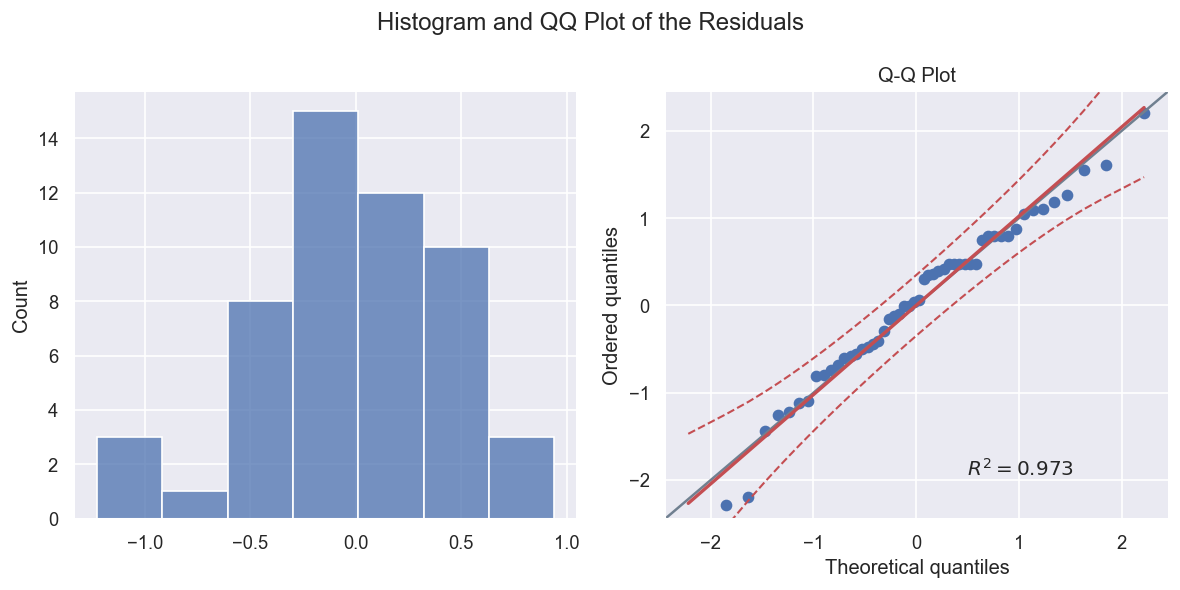

In [134]:
plt.rcParams["figure.figsize"] = [10, 5]
fig, ax =plt.subplots(1,2)
plt.suptitle('Histogram and QQ Plot of the Residuals')
sns.histplot(final_model.resid, ax=ax[0])
pg.qqplot(final_model.resid, confidence=0.95, dist='norm', ax=ax[1])
fig.tight_layout()

### Percent of Variance Explained by Each Regressor in the Final Model

In [135]:
reg_set=final_model.params
reg_set=list(reg_set.keys())
reg_set

['Self-Acceptance, Self-Esteem: Average',
 'Resilience (including post-traumatic growth): Average',
 'Gratitude: Average']

In [136]:
var_exp_regs('GCI: Average', reg_set, df)

The Sum of Squared Residuals for the full model fit with ['Self-Acceptance, Self-Esteem: Average', 'Resilience (including post-traumatic growth): Average', 'Gratitude: Average'] is 9.78685
To calculate the Partial R-squared, we calculate (SSR_reduced-SSR_full)/SSR_reduced.


The Sum of Squared Residuals of the model fit with only ['Resilience (including post-traumatic growth): Average', 'Gratitude: Average'] is 11.40294
The Partial R-squared, or the percent of the variation, described by adding Self-Acceptance, Self-Esteem: Average to a model fit with only ['Resilience (including post-traumatic growth): Average', 'Gratitude: Average'] is 14.173


The Sum of Squared Residuals of the model fit with only ['Self-Acceptance, Self-Esteem: Average', 'Gratitude: Average'] is 10.72312
The Partial R-squared, or the percent of the variation, described by adding Resilience (including post-traumatic growth): Average to a model fit with only ['Self-Acceptance, Self-Esteem: Average', 'Gratitude: Aver

In [137]:
# Getting the correlations between the regressors of the final model

for col in reg_set:
    for sec_col in reg_set:
        if col == sec_col:
            pass
        else:
            corr, pvalue=stats.spearmanr(df[col], df[sec_col])
            print('The correlation between', col, 'and', sec_col, 'is:', round(corr,5))

The correlation between Self-Acceptance, Self-Esteem: Average and Resilience (including post-traumatic growth): Average is: 0.84025
The correlation between Self-Acceptance, Self-Esteem: Average and Gratitude: Average is: 0.84659
The correlation between Resilience (including post-traumatic growth): Average and Self-Acceptance, Self-Esteem: Average is: 0.84025
The correlation between Resilience (including post-traumatic growth): Average and Gratitude: Average is: 0.83742
The correlation between Gratitude: Average and Self-Acceptance, Self-Esteem: Average is: 0.84659
The correlation between Gratitude: Average and Resilience (including post-traumatic growth): Average is: 0.83742


### Impact of Age

In [138]:
# Getting the final model's regressors:

reg_set=[]
for i in range(len(final_model.params)):
    reg_set.append(final_model.params.index[i])
    
reg_set

['Self-Acceptance, Self-Esteem: Average',
 'Resilience (including post-traumatic growth): Average',
 'Gratitude: Average']

In [139]:
df_aug, col_names= Augmented_DF(reg_set, df)
df_aug

Age  Self-Acceptance, Self-Esteem: Average  \
0   4.407407                                    4.0   
1   2.481481                                    3.0   
2   4.111111                                    3.0   
3   3.074074                                    4.0   
4   2.481481                                    2.5   
5   1.592593                                    5.0   
6   1.592593                                    4.0   
7   1.888889                                    4.0   
8   5.000000                                    5.0   
9   2.925926                                    4.5   
10  4.407407                                    5.0   
11  3.370370                                    2.0   
12  2.333333                                    5.0   
13  2.481481                                    5.0   
14  3.222222                                    3.0   
15  1.296296                                    3.0   
16  3.370370                                    5.0   
17  1.444444                                    5.0   
18  1.740741                                    3.5   
19  4.703704                                    2.5   
20  1.888889                                    3.5   
21  1.296296                                    1.5   
22  3.074074                                    4.5   
23  1.888889                                    4.5   
24  2.481481                                    3.5   
25  2.629630                                    3.0   
26  1.296296                                    3.0   
27  3.074074                                    4.5   
28  2.777778                                    3.0   
29  3.222222                                    3.5   
30  1.740741                                    5.0   
31  2.333333                                    4.0   
32  3.074074                                    3.5   
33  1.740741                                    5.0   
34  1.888889                                    4.5   
35  1.888889                                    5.0   
36  1.740741                                    1.5   
37  2.777778                                    1.5   
38  4.703704                                    3.5   
39  4.703704                                    3.5   
40  4.259259                                    2.5   
41  2.925926                                    2.5   
42  3.074074                                    4.5   
43  2.037037                                    1.5   
44  4.259259                                    4.5   
45  2.333333                                    4.0   
46  1.000000                                    4.5   
47  2.629630                                    4.0   
48  1.888889                                    5.0   
49  2.037037                                    5.0   
50  2.333333                                    3.5   
51  2.629630                                    4.5   

    Self-Acceptance, Self-Esteem: Average*Age  \
0                                    3.771605   
1                                    2.074074   
2                                    2.888889   
3                                    2.882716   
4                                    1.867284   
5                                    2.160494   
6                                    1.895062   
7                                    2.092593   
8                                    5.000000   
9                                    3.027778   
10                                   4.506173   
11                                   1.956790   
12                                   2.777778   
13                                   2.901235   
14                                   2.444444   
15                                   1.481481   
16                                   3.641975   
17                                   2.037037   
18                                   1.848765   
19                                   2.793210   
20                                   1.935185   
21             

In [140]:
final_model, aics=forward_stepwise_regression_interaction('GCI: Average', col_names, df, df_aug, 'None')

In [141]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           GCI: Average   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1258.
Date:                Mon, 09 May 2022   Prob (F-statistic):                    2.45e-46
Time:                        18:18:55   Log-Likelihood:                         -30.360
No. Observations:                  52   AIC:                                      66.72
Df Residuals:                      49   BIC:                                      72.57
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Gratitude: Average                                        0.3460      0.117      2.962      0.005       0.111       0.581
Self-Acceptance, Self-Esteem: Average                     0.3360      0.118      2.845      0.006       0.099       0.573
Resilience (including post-traumatic growth): Average     0.2802      0.129      2.165      0.035       0.020       0.540
==============================================================================
Omnibus:                        3.354   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                2.454
Skew:                          -0.506   Prob(JB):                        0.293
Kurtosis:                       3.327   Cond. No.                         17.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that Age has no effect.

## Regression with Elder Identity Revision as Regressors and GCI as Dependent Variable

### Individual Regressors and their P-values

We begin by building a simple Ordinary Least Squares linear regression model with each factor alone to view the p-values, coefficients, and $R^2$.

In [142]:
single_olss=[]
for i in range(len(eir_avg)):
    single_ols=single_factor_lr(df[eir_avg[i]], df['GCI: Average'])
    single_olss.append(single_ols)

In [143]:
single_olss[0:2]

[[Control: Average    0.989421
  dtype: float64,
  0.9693415752526005,
  Control: Average    2.881044e-40
  dtype: float64],
 [Competence: Average    0.972304
  dtype: float64,
  0.9497067715324408,
  Competence: Average    8.816398e-35
  dtype: float64]]

In [144]:
# Splitting the factors and their p-values

coeffs=[]
r_squareds=[]
p_vals=[]
factors=[]
for i in range(len(single_olss)):
    factors.append(single_olss[i][0].index[0])
    coeffs.append(single_olss[i][0][0])
    r_squareds.append(single_olss[i][1])
    p_vals.append(single_olss[i][2][0])

In [145]:
# Creating a dataframe of the factors, coefficients, R^2, and p-values, then sorting them by highest to lowest

coeff_r2_pvals = {'Factor': factors, 'Coefficient':coeffs, 'R-squared': r_squareds, 'P-Value': p_vals}
df_coeff_r2_pvals = pd.DataFrame(data=coeff_r2_pvals)
df_coeff_r2_pvals=df_coeff_r2_pvals.sort_values('R-squared', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
df_coeff_r2_pvals

Factor  Coefficient  R-squared       P-Value
0        Control: Average     0.989421   0.969342  2.881044e-40
4     Connection: Average     1.042836   0.963983  1.756046e-38
3  Consciousness: Average     1.085622   0.955205  4.590929e-36
2     Continuity: Average     0.876488   0.950795  5.042934e-35
1     Competence: Average     0.972304   0.949707  8.816398e-35

### Exhaustive Search Regression

In [146]:
ps_eir_avg=[list(x) for x in power_set(eir_avg)]

In [147]:
aic_subset=find_lowest_aic('GCI: Average', ps_eir_avg, df)
print('The lowest AIC is: ', aic_subset[0], 'with the following regressors: ', aic_subset[1])

The lowest AIC is:  87.87166530011578 with the following regressors:  ['Connection: Average', 'Control: Average']


In [148]:
final_model=sm.OLS(endog=df['GCI: Average'], exog=df[aic_subset[1]]).fit()

In [149]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           GCI: Average   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              1225.
Date:                Mon, 09 May 2022   Prob (F-statistic):                    3.36e-43
Time:                        18:18:55   Log-Likelihood:                         -41.936
No. Observations:                  52   AIC:                                      87.87
Df Residuals:                      50   BIC:                                      91.77
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Connection: Average     0.4756      0.092      5.161      0.000       0.290       0.661
Control: Average        0.5516      0.087      6.327      0.000       0.376       0.727
==============================================================================
Omnibus:                       14.141   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.834
Skew:                           1.096   Prob(JB):                     0.000365
Kurtosis:                       4.581   Cond. No.                         8.57
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

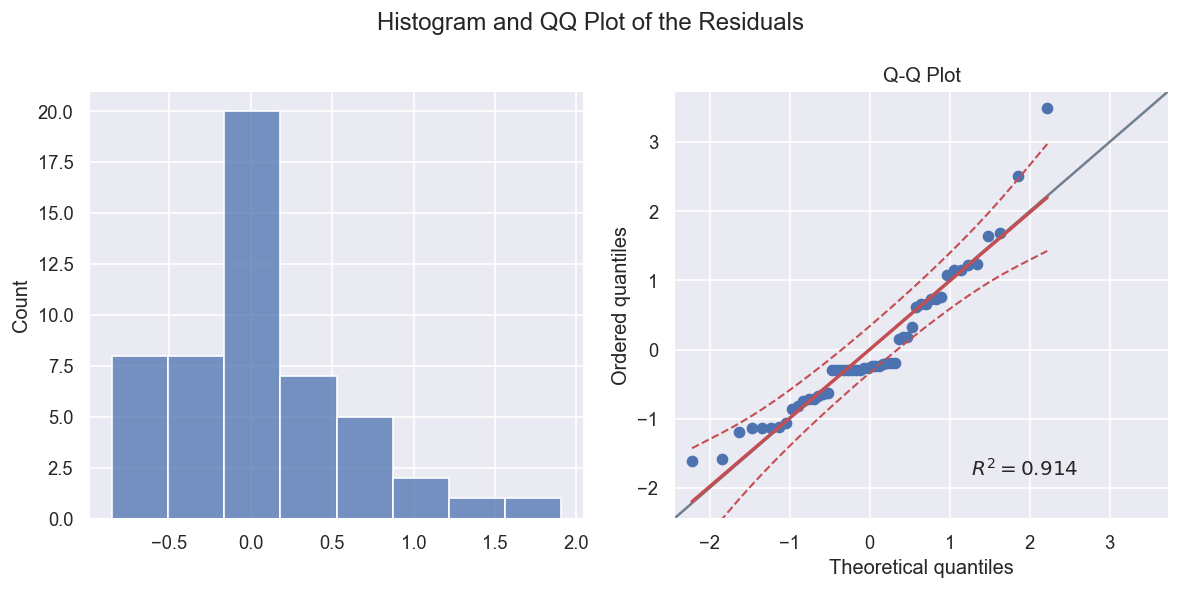

In [150]:
plt.rcParams["figure.figsize"] = [10, 5]
fig, ax =plt.subplots(1,2)
plt.suptitle('Histogram and QQ Plot of the Residuals')
sns.histplot(final_model.resid, ax=ax[0])
pg.qqplot(final_model.resid, confidence=0.95, dist='norm', ax=ax[1])
fig.tight_layout()

There appears to be two outliers. We will remove the most egregious and refit.

In [151]:
residuals=list(final_model.resid)
indices=[]
for resid in residuals:
    if resid >= 1.5:
        indices.append(residuals.index(resid))
print('Indices of residuals of interest:', indices)

Indices of residuals of interest: [42]


In [152]:
df.iloc[42]

Case Number                  43
Dem: Age               3.074074
Dem: Gender                   F
Dem: Marital Status           D
Dem: Ethnicity                W
                         ...   
Connection: Average         1.5
GCI: SF                       4
GCI: BG                       4
GCI: Average                4.0
Meta-Factor Total           4.8
Name: 42, Length: 96, dtype: object

Now, we will remove this data point and refit the model.

### Refitting without Potential Outliers

In [153]:
df_prime=df.copy()
for row in indices:
    df_prime=df_prime.drop(labels=row, axis=0)

In [154]:
df_prime

Case Number  Dem: Age Dem: Gender Dem: Marital Status Dem: Ethnicity  \
0             1  4.407407           M                   W              W   
1             2  2.481481           F                   W              W   
2             3  4.111111           M                   W              W   
3             4  3.074074           M                   M              W   
4             5  2.481481           M                   M              W   
5             6  1.592593           F                   W              W   
6             7  1.592593           M                   M              W   
7             8  1.888889           F                   W              W   
8             9  5.000000           F                   W              W   
9            10  2.925926           M                   M              W   
10           11  4.407407           M                   M              W   
11           12  3.370370           M                   D              W   
12           13  2.333333           F                   W              W   
13           14  2.481481           M                   M              W   
14           15  3.222222           M                   W              W   
15           16  1.296296           M                   M              W   
16           17  3.370370           F                   M              W   
17           18  1.444444           F                   M              W   
18           19  1.740741           F                   M              W   
19           20  4.703704           M                   M              W   
20           21  1.888889           M                   M              W   
21           22  1.296296           M                   D              W   
22           23  3.074074           M                   M              W   
23           24  1.888889           M                   M              W   
24           25  2.481481           F                   M              W   
25           26  2.629630           M                   M              W   
26           27  1.296296           F                   M              W   
27           28  3.074074           M                   M              L   
28           29  2.777778           F                   W              W   
29           30  3.222222           F                   D              W   
30           31  1.740741           M                   M              B   
31           32  2.333333           F                   D              B   
32           33  3.074074           M                   M              B   
33           34  1.740741           F                   D           H-NA   
34           35  1.888889           F                   S              B   
35           36  1.888889           M                   M              B   
36           37  1.740741           M                   D              W   
37           38  2.777778           M                   D              W   
38           39  4.703704           F                   W              W   
39           40  4.703704           F                   W              W   
40           41  4.259259           F                   S              W   
41           42  2.925926           F                   D              W   
43           44  2.037037           F                   D              W   
44           45  4.259259           F                   W              B   
45           46  2.333333           M                   W              W   
46           47  1.000000           F                   D              W   
47           48  2.629630           M                   D              W   
48           49  1.888889           M                   M              L   
49           50  2.037037           F                   M              L   
50           51  2.333333           F                   M              A   
51           52  2.629630           M                   M         W-Arab   

   Dem: Socio-Economic Staus Dem: Residential Statu

In [155]:
ps_eir_avg=[list(x) for x in power_set(eir_avg)]

In [156]:
aic_subset=find_lowest_aic('GCI: Average', ps_eir_avg, df_prime)
print('The lowest AIC is: ', aic_subset[0], 'with the following regressors: ', aic_subset[1])

The lowest AIC is:  72.94163561239344 with the following regressors:  ['Connection: Average', 'Control: Average']


In [157]:
final_model=sm.OLS(endog=df_prime['GCI: Average'], exog=df_prime[aic_subset[1]]).fit()

In [158]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           GCI: Average   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              1563.
Date:                Mon, 09 May 2022   Prob (F-statistic):                    4.13e-45
Time:                        18:18:56   Log-Likelihood:                         -34.471
No. Observations:                  51   AIC:                                      72.94
Df Residuals:                      49   BIC:                                      76.81
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Connection: Average     0.5192      0.082      6.360      0.000       0.355       0.683
Control: Average        0.5049      0.077      6.522      0.000       0.349       0.661
==============================================================================
Omnibus:                        5.014   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.157
Skew:                           0.686   Prob(JB):                        0.125
Kurtosis:                       3.274   Cond. No.                         8.64
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

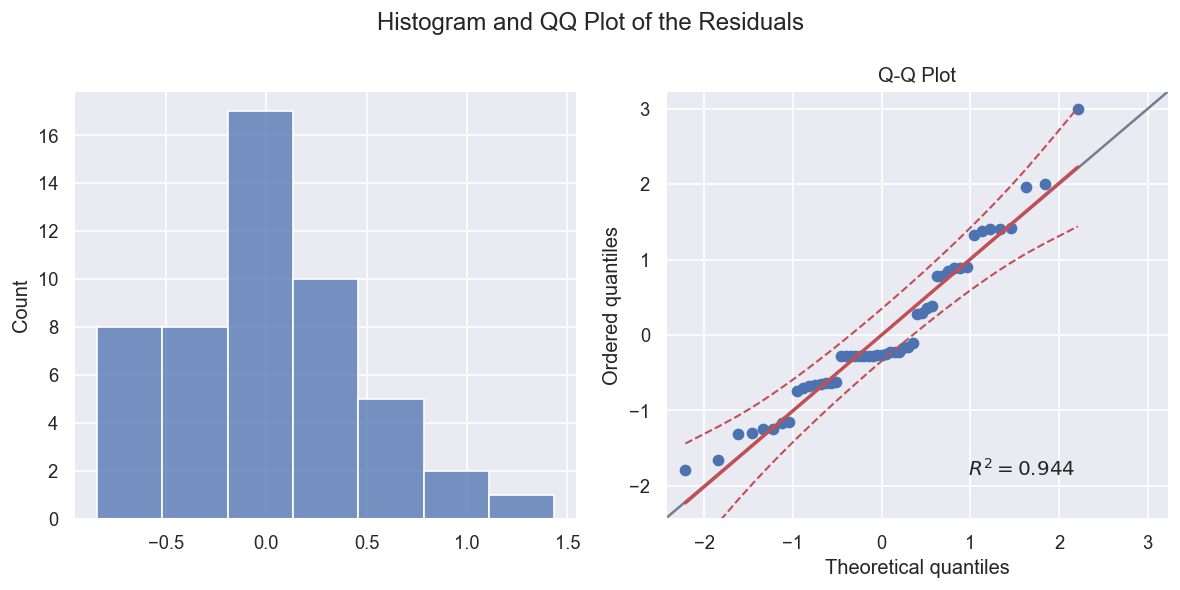

In [159]:
plt.rcParams["figure.figsize"] = [10, 5]
fig, ax =plt.subplots(1,2)
plt.suptitle('Histogram and QQ Plot of the Residuals')
sns.histplot(final_model.resid, ax=ax[0])
pg.qqplot(final_model.resid, confidence=0.95, dist='norm', ax=ax[1])
fig.tight_layout()

### Percent of Variance Explained by Each Regressor in the Final Model

In [160]:
reg_set=final_model.params
reg_set=list(reg_set.keys())
reg_set

['Connection: Average', 'Control: Average']

In [161]:
var_exp_regs('GCI: Average', reg_set, df)

The Sum of Squared Residuals for the full model fit with ['Connection: Average', 'Control: Average'] is 15.276
To calculate the Partial R-squared, we calculate (SSR_reduced-SSR_full)/SSR_reduced.


The Sum of Squared Residuals of the model fit with only ['Control: Average'] is 23.41537
The Partial R-squared, or the percent of the variation, described by adding Connection: Average to a model fit with only ['Control: Average'] is 34.760999999999996


The Sum of Squared Residuals of the model fit with only ['Connection: Average'] is 27.50775
The Partial R-squared, or the percent of the variation, described by adding Control: Average to a model fit with only ['Connection: Average'] is 44.467


In [162]:
# Getting the correlations between the regressors of the final model

for col in reg_set:
    for sec_col in reg_set:
        if col == sec_col:
            pass
        else:
            corr, pvalue=stats.spearmanr(df[col], df[sec_col])
            print('The correlation between', col, 'and', sec_col, 'is:', round(corr,5))

The correlation between Connection: Average and Control: Average is: 0.78841
The correlation between Control: Average and Connection: Average is: 0.78841


### Impact of Age

In [163]:
# Getting the final model's regressors:

reg_set=[]
for i in range(len(final_model.params)):
    reg_set.append(final_model.params.index[i])
    
reg_set

['Connection: Average', 'Control: Average']

In [164]:
df_aug, col_names= Augmented_DF(reg_set, df_prime)
df_prime=df_prime.reset_index()
df_aug

Age  Connection: Average  Connection: Average*Age  Control: Average  \
0   4.407407                  4.0                 3.771605               4.0   
1   2.481481                  3.5                 2.280864               3.0   
2   4.111111                  2.5                 2.546296               3.5   
3   3.074074                  5.0                 3.395062               4.0   
4   2.481481                  2.0                 1.660494               2.5   
5   1.592593                  5.0                 2.160494               5.0   
6   1.592593                  4.5                 2.027778               4.5   
7   1.888889                  3.0                 1.777778               3.5   
8   5.000000                  5.0                 5.000000               3.5   
9   2.925926                  4.0                 2.783951               4.0   
10  4.407407                  5.0                 4.506173               5.0   
11  3.370370                  3.0                 2.518519               3.0   
12  2.333333                  5.0                 2.777778               5.0   
13  2.481481                  5.0                 2.901235               4.0   
14  3.222222                  4.0                 2.981481               3.5   
15  1.296296                  2.0                 1.265432               3.5   
16  3.370370                  5.0                 3.641975               4.0   
17  1.444444                  5.0                 2.037037               5.0   
18  1.740741                  1.5                 1.268519               3.0   
19  4.703704                  3.5                 3.577160               5.0   
20  1.888889                  2.0                 1.462963               3.5   
21  1.296296                  1.5                 1.157407               3.0   
22  3.074074                  2.5                 2.114198               4.0   
23  1.888889                  4.5                 2.250000               4.5   
24  2.481481                  2.5                 1.867284               3.0   
25  2.629630                  3.5                 2.367284               3.5   
26  1.296296                  3.5                 1.589506               3.5   
27  3.074074                  2.5                 2.114198               3.5   
28  2.777778                  5.0                 3.148148               4.0   
29  3.222222                  2.5                 2.175926               5.0   
30  1.740741                  4.5                 2.138889               5.0   
31  2.333333                  4.0                 2.388889               4.0   
32  3.074074                  3.0                 2.370370               2.5   
33  1.740741                  5.0                 2.283951               5.0   
34  1.888889                  3.0                 1.777778               3.5   
35  1.888889                  5.0                 2.407407               4.0   
36  1.740741                  1.0                 1.123457               2.5   
37  2.777778                  1.5                 1.527778               2.0   
38  4.703704                  2.5                 2.793210               3.5   
39  4.703704                  2.5                 2.793210               2.5   
40  4.259259                  1.5                 1.898148               2.5   
41  2.925926                  1.5                 1.564815               2.5   
42  2.037037                  2.0                 1.512346               2.0   
43  4.259259                  3.5                 3.317901               4.5   
44  2.333333                  1.5                 1.416667               2.5   
45  1.000000                  4.0                 1.500000               4.5   
46  2.629630                  2.5                 1.929012               3.5   
47  1.888889                  5.0                 2.407407               5.0   
48  2.037037                  5.0                 2.530864               5.0   
49  2.333

In [165]:
final_model, aics=forward_stepwise_regression_interaction('GCI: Average', col_names, df_prime, df_aug, 'None')

In [166]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           GCI: Average   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1082.
Date:                Mon, 09 May 2022   Prob (F-statistic):                    4.65e-44
Time:                        18:18:57   Log-Likelihood:                         -33.001
No. Observations:                  51   AIC:                                      72.00
Df Residuals:                      48   BIC:                                      77.80
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Control: Average        0.4375      0.086      5.096      0.000       0.265       0.610
Connection: Average     0.5267      0.080      6.563      0.000       0.365       0.688
Age                     0.0900      0.053      1.688      0.098      -0.017       0.197
==============================================================================
Omnibus:                        2.064   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.813
Skew:                           0.455   Prob(JB):                        0.404
Kurtosis:                       2.843   Cond. No.                         10.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that Age is not significant. Let's look at AIC versus stepwise step.

Text(0.5, 1.0, 'AIC Versus Step in Forward Stepwise Regression')

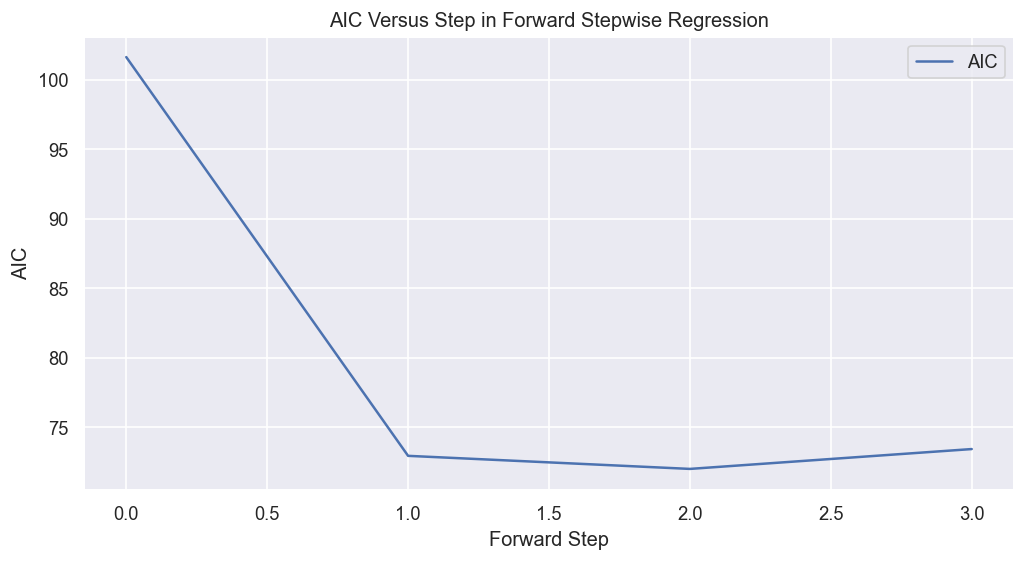

In [167]:
plt.plot(aics, label='AIC')
plt.xlabel('Forward Step')
plt.ylabel('AIC')
plt.legend()
plt.title('AIC Versus Step in Forward Stepwise Regression')

According to this, we can stop at two regressors.

In [168]:
final_model, aics=forward_stepwise_regression_interaction('GCI: Average', col_names, df_prime, df_aug, 2)

In [169]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           GCI: Average   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              1563.
Date:                Mon, 09 May 2022   Prob (F-statistic):                    4.13e-45
Time:                        18:18:57   Log-Likelihood:                         -34.471
No. Observations:                  51   AIC:                                      72.94
Df Residuals:                      49   BIC:                                      76.81
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Control: Average        0.5049      0.077      6.522      0.000       0.349       0.661
Connection: Average     0.5192      0.082      6.360      0.000       0.355       0.683
==============================================================================
Omnibus:                        5.014   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.157
Skew:                           0.686   Prob(JB):                        0.125
Kurtosis:                       3.274   Cond. No.                         8.64
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see Age is not significant.

## Regression with Elder Developmental Tasks as Regressors and GCI as Dependent Variable

### Individual Regressors and their P-values

We begin by building a simple Ordinary Least Squares linear regression model with each factor alone to view the p-values, coefficients, and $R^2$.

In [170]:
single_olss=[]
for i in range(len(elder_dev_tasks_avg)):
    single_ols=single_factor_lr(df[elder_dev_tasks_avg[i]], df['GCI: Average'])
    single_olss.append(single_ols)

In [171]:
single_olss[0:2]

[[Generativity: Average    1.025403
  dtype: float64,
  0.96196516458839,
  Generativity: Average    7.059150e-38
  dtype: float64],
 [Keeper of Meaning: Average    1.029029
  dtype: float64,
  0.9313467218352046,
  Keeper of Meaning: Average    2.487317e-31
  dtype: float64]]

In [172]:
# Splitting the factors and their p-values

coeffs=[]
r_squareds=[]
p_vals=[]
factors=[]
for i in range(len(single_olss)):
    factors.append(single_olss[i][0].index[0])
    coeffs.append(single_olss[i][0][0])
    r_squareds.append(single_olss[i][1])
    p_vals.append(single_olss[i][2][0])

In [173]:
# Creating a dataframe of the factors, coefficients, R^2, and p-values, then sorting them by highest to lowest

coeff_r2_pvals = {'Factor': factors, 'Coefficient':coeffs, 'R-squared': r_squareds, 'P-Value': p_vals}
df_coeff_r2_pvals = pd.DataFrame(data=coeff_r2_pvals)
df_coeff_r2_pvals=df_coeff_r2_pvals.sort_values('R-squared', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
df_coeff_r2_pvals

Factor  Coefficient  R-squared       P-Value
2      Ego Integrity: Average     0.995058   0.983658  3.083081e-47
0       Generativity: Average     1.025403   0.961965  7.059150e-38
1  Keeper of Meaning: Average     1.029029   0.931347  2.487317e-31

### Exhaustive Search Regression

In [174]:
ps_elder_dev_tasks_avg=[list(x) for x in power_set(elder_dev_tasks_avg)]

In [175]:
aic_subset=find_lowest_aic('GCI: Average', ps_elder_dev_tasks_avg, df)
print('The lowest AIC is: ', aic_subset[0], 'with the following regressors: ', aic_subset[1])

The lowest AIC is:  67.78567675272016 with the following regressors:  ['Generativity: Average', 'Ego Integrity: Average']


In [176]:
final_model=sm.OLS(endog=df['GCI: Average'], exog=df[aic_subset[1]]).fit()

In [177]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           GCI: Average   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1814.
Date:                Mon, 09 May 2022   Prob (F-statistic):                    2.15e-47
Time:                        18:18:57   Log-Likelihood:                         -31.893
No. Observations:                  52   AIC:                                      67.79
Df Residuals:                      50   BIC:                                      71.69
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Generativity: Average      0.2619      0.082      3.180      0.003       0.096       0.427
Ego Integrity: Average     0.7493      0.079      9.482      0.000       0.591       0.908
==============================================================================
Omnibus:                        3.122   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                2.230
Skew:                           0.297   Prob(JB):                        0.328
Kurtosis:                       3.822   Cond. No.                         9.46
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

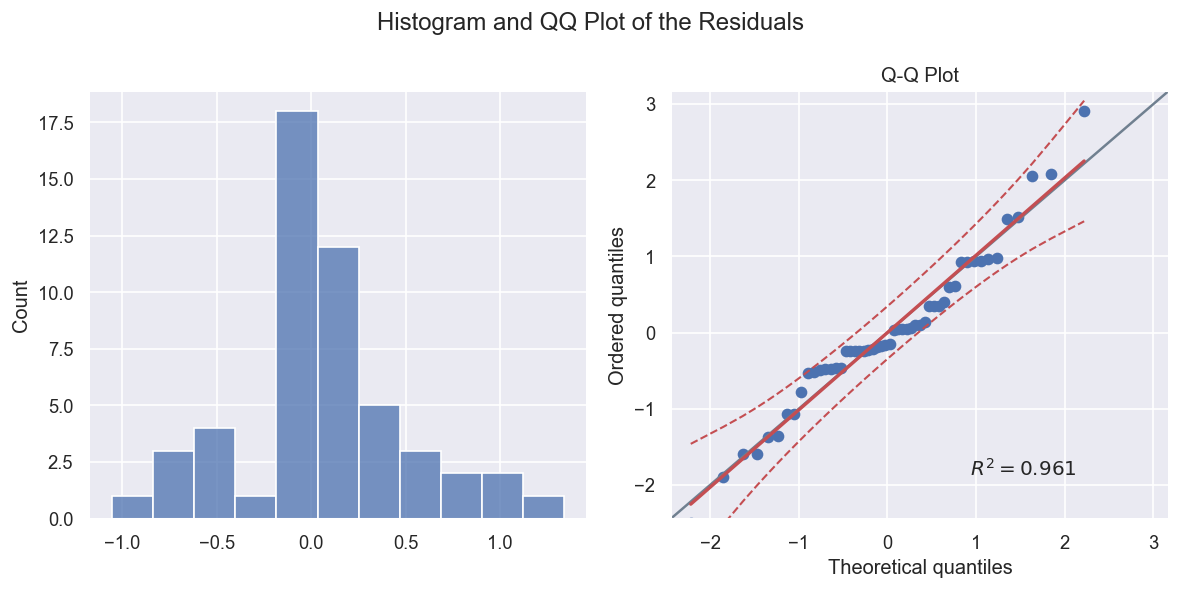

In [178]:
plt.rcParams["figure.figsize"] = [10, 5]
fig, ax =plt.subplots(1,2)
plt.suptitle('Histogram and QQ Plot of the Residuals')
sns.histplot(final_model.resid, ax=ax[0])
pg.qqplot(final_model.resid, confidence=0.95, dist='norm', ax=ax[1])
fig.tight_layout()

### Percent of Variance Explained by Each Regressor in the Final Model

In [179]:
reg_set=final_model.params
reg_set=list(reg_set.keys())
reg_set

['Generativity: Average', 'Ego Integrity: Average']

In [180]:
var_exp_regs('GCI: Average', reg_set, df)

The Sum of Squared Residuals for the full model fit with ['Generativity: Average', 'Ego Integrity: Average'] is 10.38138
To calculate the Partial R-squared, we calculate (SSR_reduced-SSR_full)/SSR_reduced.


The Sum of Squared Residuals of the model fit with only ['Ego Integrity: Average'] is 12.48147
The Partial R-squared, or the percent of the variation, described by adding Generativity: Average to a model fit with only ['Ego Integrity: Average'] is 16.826


The Sum of Squared Residuals of the model fit with only ['Generativity: Average'] is 29.04911
The Partial R-squared, or the percent of the variation, described by adding Ego Integrity: Average to a model fit with only ['Generativity: Average'] is 64.263


In [181]:
# Getting the correlations between the regressors of the final model

for col in reg_set:
    for sec_col in reg_set:
        if col == sec_col:
            pass
        else:
            corr, pvalue=stats.spearmanr(df[col], df[sec_col])
            print('The correlation between', col, 'and', sec_col, 'is:', round(corr,5))

The correlation between Generativity: Average and Ego Integrity: Average is: 0.76024
The correlation between Ego Integrity: Average and Generativity: Average is: 0.76024


### Impact of Age

In [182]:
# Getting the final model's regressors:

reg_set=[]
for i in range(len(final_model.params)):
    reg_set.append(final_model.params.index[i])
    
reg_set

['Generativity: Average', 'Ego Integrity: Average']

In [183]:
df_aug, col_names= Augmented_DF(reg_set, df)
df_aug

Age  Generativity: Average  Generativity: Average*Age  \
0   4.407407                    3.5                   3.404321   
1   2.481481                    3.0                   2.074074   
2   4.111111                    2.0                   2.203704   
3   3.074074                    5.0                   3.395062   
4   2.481481                    2.0                   1.660494   
5   1.592593                    5.0                   2.160494   
6   1.592593                    4.0                   1.895062   
7   1.888889                    4.5                   2.250000   
8   5.000000                    4.0                   4.166667   
9   2.925926                    5.0                   3.271605   
10  4.407407                    5.0                   4.506173   
11  3.370370                    3.0                   2.518519   
12  2.333333                    4.0                   2.388889   
13  2.481481                    5.0                   2.901235   
14  3.222222                    3.5                   2.712963   
15  1.296296                    3.0                   1.481481   
16  3.370370                    3.5                   2.799383   
17  1.444444                    3.0                   1.555556   
18  1.740741                    2.5                   1.558642   
19  4.703704                    3.0                   3.185185   
20  1.888889                    2.0                   1.462963   
21  1.296296                    2.5                   1.373457   
22  3.074074                    5.0                   3.395062   
23  1.888889                    4.5                   2.250000   
24  2.481481                    4.5                   2.694444   
25  2.629630                    2.5                   1.929012   
26  1.296296                    2.5                   1.373457   
27  3.074074                    3.5                   2.626543   
28  2.777778                    2.5                   1.990741   
29  3.222222                    3.0                   2.444444   
30  1.740741                    4.5                   2.138889   
31  2.333333                    4.0                   2.388889   
32  3.074074                    4.0                   2.882716   
33  1.740741                    4.5                   2.138889   
34  1.888889                    3.0                   1.777778   
35  1.888889                    5.0                   2.407407   
36  1.740741                    1.0                   1.123457   
37  2.777778                    1.0                   1.296296   
38  4.703704                    4.0                   3.969136   
39  4.703704                    2.5                   2.793210   
40  4.259259                    1.5                   1.898148   
41  2.925926                    2.5                   2.052469   
42  3.074074                    4.0                   2.882716   
43  2.037037                    1.0                   1.172840   
44  4.259259                    4.5                   4.027778   
45  2.333333                    3.0                   2.000000   
46  1.000000                    5.0                   1.666667   
47  2.629630                    2.0                   1.709877   
48  1.888889                    4.5                   2.250000   
49  2.037037                    5.0                   2.530864   
50  2.333333                    3.0                   2.000000   
51  2.629630                    5.0                   3.024691   

    Ego Integrity: Average  Ego Integrity: Average*Age  
0                      3.5                    3.404321  
1                      2.5                    1.867284  
2                      3.0                    2.888889  
3                      5.0                    3.395062  
4                      2.0                    1.660494  
5                      5.0                    2.160494  
6                      4.0                    1.895062  
7                      4.0                    2.092593

In [184]:
final_model, aics=forward_stepwise_regression_interaction('GCI: Average', col_names, df, df_aug, 2)

In [185]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           GCI: Average   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1814.
Date:                Mon, 09 May 2022   Prob (F-statistic):                    2.15e-47
Time:                        18:18:58   Log-Likelihood:                         -31.893
No. Observations:                  52   AIC:                                      67.79
Df Residuals:                      50   BIC:                                      71.69
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Ego Integrity: Average     0.7493      0.079      9.482      0.000       0.591       0.908
Generativity: Average      0.2619      0.082      3.180      0.003       0.096       0.427
==============================================================================
Omnibus:                        3.122   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                2.230
Skew:                           0.297   Prob(JB):                        0.328
Kurtosis:                       3.822   Cond. No.                         9.46
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So, we can say that Age has no effect.

## Regression with Elder Identity Revision as Regressors and Comp Meta Score as Dependent Variable

### Individual Regressors and their P-values

We begin by building a simple Ordinary Least Squares linear regression model with each factor alone to view the p-values, coefficients, and $R^2$.

In [186]:
single_olss=[]
for i in range(len(eir_avg)):
    single_ols=single_factor_lr(df[eir_avg[i]], df['Meta-Factor Total'])
    single_olss.append(single_ols)

In [187]:
single_olss[0:2]

[[Control: Average    1.015802
  dtype: float64,
  0.9633574846942867,
  Control: Average    2.725498e-38
  dtype: float64],
 [Competence: Average    1.001629
  dtype: float64,
  0.9502876922717611,
  Competence: Average    6.553919e-35
  dtype: float64]]

In [188]:
# Splitting the factors and their p-values

coeffs=[]
r_squareds=[]
p_vals=[]
factors=[]
for i in range(len(single_olss)):
    factors.append(single_olss[i][0].index[0])
    coeffs.append(single_olss[i][0][0])
    r_squareds.append(single_olss[i][1])
    p_vals.append(single_olss[i][2][0])

In [189]:
# Creating a dataframe of the factors, coefficients, R^2, and p-values, then sorting them by highest to lowest

coeff_r2_pvals = {'Factor': factors, 'Coefficient':coeffs, 'R-squared': r_squareds, 'P-Value': p_vals}
df_coeff_r2_pvals = pd.DataFrame(data=coeff_r2_pvals)
df_coeff_r2_pvals=df_coeff_r2_pvals.sort_values('R-squared', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
df_coeff_r2_pvals

Factor  Coefficient  R-squared       P-Value
0        Control: Average     1.015802   0.963357  2.725498e-38
2     Continuity: Average     0.906321   0.958551  6.332039e-37
1     Competence: Average     1.001629   0.950288  6.553919e-35
4     Connection: Average     1.054727   0.929764  4.451025e-31
3  Consciousness: Average     1.101050   0.926422  1.458762e-30

### Exhaustive Search Regression

In [190]:
ps_eir_avg=[list(x) for x in power_set(eir_avg)]

In [191]:
aic_subset=find_lowest_aic('Meta-Factor Total', ps_eir_avg, df)
print('The lowest AIC is: ', aic_subset[0], 'with the following regressors: ', aic_subset[1])

The lowest AIC is:  115.85344782455829 with the following regressors:  ['Connection: Average', 'Control: Average', 'Continuity: Average']


In [192]:
final_model=sm.OLS(endog=df['Meta-Factor Total'], exog=df[aic_subset[1]]).fit()

In [193]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Meta-Factor Total   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              509.2
Date:                Mon, 09 May 2022   Prob (F-statistic):                    6.51e-37
Time:                        18:18:58   Log-Likelihood:                         -54.927
No. Observations:                  52   AIC:                                      115.9
Df Residuals:                      49   BIC:                                      121.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Connection: Average     0.1891      0.119      1.583      0.120      -0.051       0.429
Control: Average        0.4361      0.198      2.207      0.032       0.039       0.833
Continuity: Average     0.3674      0.147      2.503      0.016       0.072       0.662
==============================================================================
Omnibus:                       17.324   Durbin-Watson:                   2.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.494
Skew:                           1.049   Prob(JB):                     1.07e-06
Kurtosis:                       5.879   Cond. No.                         16.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

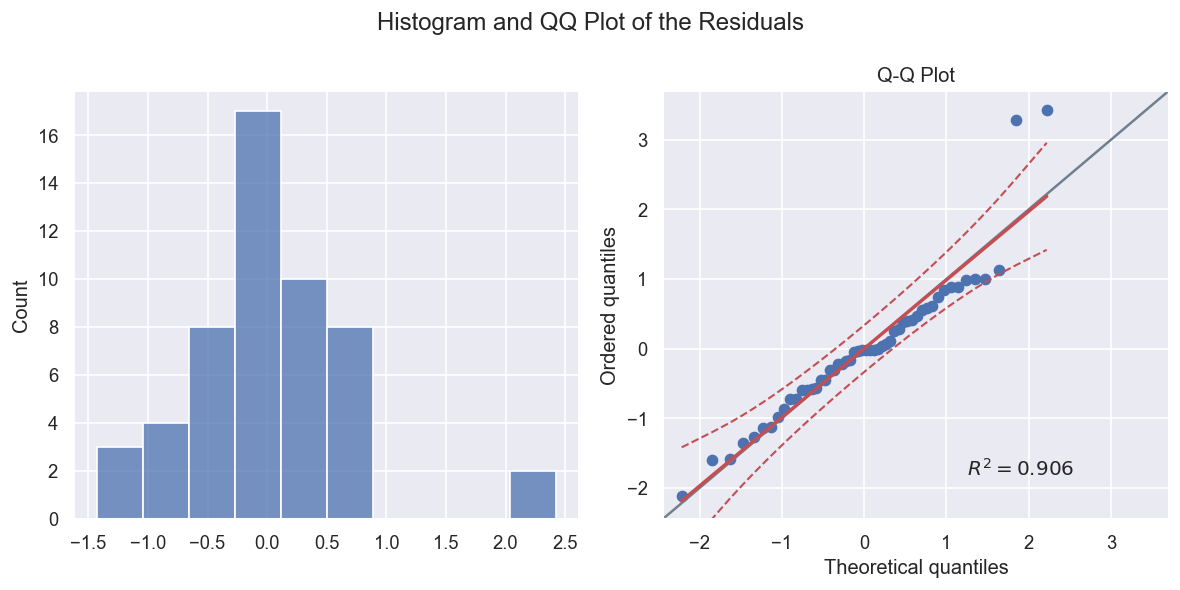

In [194]:
plt.rcParams["figure.figsize"] = [10, 5]
fig, ax =plt.subplots(1,2)
plt.suptitle('Histogram and QQ Plot of the Residuals')
sns.histplot(final_model.resid, ax=ax[0])
pg.qqplot(final_model.resid, confidence=0.95, dist='norm', ax=ax[1])
fig.tight_layout()

There appears to be two outliers. We will remove one and refit.

In [195]:
residuals=list(final_model.resid)
indices=[]
for resid in residuals:
    if resid >= 2.4:
        indices.append(residuals.index(resid))
print('Indices of residuals of interest:', indices)

Indices of residuals of interest: [37]


In [196]:
df.iloc[37]

Case Number                  38
Dem: Age               2.777778
Dem: Gender                   M
Dem: Marital Status           D
Dem: Ethnicity                W
                         ...   
Connection: Average         1.5
GCI: SF                       2
GCI: BG                       1
GCI: Average                1.5
Meta-Factor Total           4.5
Name: 37, Length: 96, dtype: object

Now, we will remove this data point and refit the model.

### Refitting without Potential Outliers

In [197]:
df_prime=df.copy()
for row in indices:
    df_prime=df_prime.drop(labels=row, axis=0)

In [198]:
df_prime

Case Number  Dem: Age Dem: Gender Dem: Marital Status Dem: Ethnicity  \
0             1  4.407407           M                   W              W   
1             2  2.481481           F                   W              W   
2             3  4.111111           M                   W              W   
3             4  3.074074           M                   M              W   
4             5  2.481481           M                   M              W   
5             6  1.592593           F                   W              W   
6             7  1.592593           M                   M              W   
7             8  1.888889           F                   W              W   
8             9  5.000000           F                   W              W   
9            10  2.925926           M                   M              W   
10           11  4.407407           M                   M              W   
11           12  3.370370           M                   D              W   
12           13  2.333333           F                   W              W   
13           14  2.481481           M                   M              W   
14           15  3.222222           M                   W              W   
15           16  1.296296           M                   M              W   
16           17  3.370370           F                   M              W   
17           18  1.444444           F                   M              W   
18           19  1.740741           F                   M              W   
19           20  4.703704           M                   M              W   
20           21  1.888889           M                   M              W   
21           22  1.296296           M                   D              W   
22           23  3.074074           M                   M              W   
23           24  1.888889           M                   M              W   
24           25  2.481481           F                   M              W   
25           26  2.629630           M                   M              W   
26           27  1.296296           F                   M              W   
27           28  3.074074           M                   M              L   
28           29  2.777778           F                   W              W   
29           30  3.222222           F                   D              W   
30           31  1.740741           M                   M              B   
31           32  2.333333           F                   D              B   
32           33  3.074074           M                   M              B   
33           34  1.740741           F                   D           H-NA   
34           35  1.888889           F                   S              B   
35           36  1.888889           M                   M              B   
36           37  1.740741           M                   D              W   
38           39  4.703704           F                   W              W   
39           40  4.703704           F                   W              W   
40           41  4.259259           F                   S              W   
41           42  2.925926           F                   D              W   
42           43  3.074074           F                   D              W   
43           44  2.037037           F                   D              W   
44           45  4.259259           F                   W              B   
45           46  2.333333           M                   W              W   
46           47  1.000000           F                   D              W   
47           48  2.629630           M                   D              W   
48           49  1.888889           M                   M              L   
49           50  2.037037           F                   M              L   
50           51  2.333333           F                   M              A   
51           52  2.629630           M                   M         W-Arab   

   Dem: Socio-Economic Staus Dem: Residential Statu

In [199]:
ps_eir_avg=[list(x) for x in power_set(eir_avg)]

In [200]:
aic_subset=find_lowest_aic('Meta-Factor Total', ps_eir_avg, df)
print('The lowest AIC is: ', aic_subset[0], 'with the following regressors: ', aic_subset[1])

The lowest AIC is:  115.85344782455829 with the following regressors:  ['Connection: Average', 'Control: Average', 'Continuity: Average']


In [201]:
final_model=sm.OLS(endog=df_prime['Meta-Factor Total'], exog=df_prime[aic_subset[1]]).fit()

In [202]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Meta-Factor Total   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              641.4
Date:                Mon, 09 May 2022   Prob (F-statistic):                    1.04e-38
Time:                        18:18:59   Log-Likelihood:                         -47.484
No. Observations:                  51   AIC:                                      101.0
Df Residuals:                      48   BIC:                                      106.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Connection: Average     0.2124      0.106      2.010      0.050   -5.65e-05       0.425
Control: Average        0.4414      0.174      2.530      0.015       0.091       0.792
Continuity: Average     0.3373      0.130      2.599      0.012       0.076       0.598
==============================================================================
Omnibus:                       11.848   Durbin-Watson:                   2.585
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               18.613
Skew:                           0.675   Prob(JB):                     9.09e-05
Kurtosis:                       5.633   Cond. No.                         16.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have the same regressors.

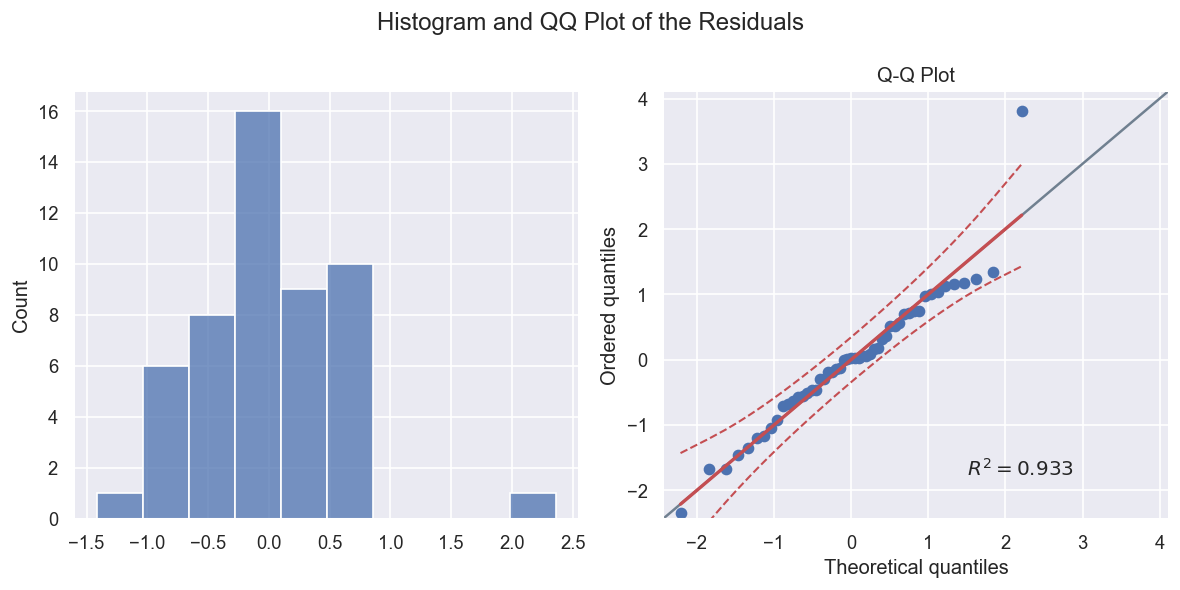

In [203]:
plt.rcParams["figure.figsize"] = [10, 5]
fig, ax =plt.subplots(1,2)
plt.suptitle('Histogram and QQ Plot of the Residuals')
sns.histplot(final_model.resid, ax=ax[0])
pg.qqplot(final_model.resid, confidence=0.95, dist='norm', ax=ax[1])
fig.tight_layout()

Removing the other outlier.

In [204]:
residuals=list(final_model.resid)
indices=[]
for resid in residuals:
    if resid >= 2.2:
        indices.append(residuals.index(resid))
print('Indices of residuals of interest:', indices)

Indices of residuals of interest: [41]


In [205]:
df_prime.iloc[41]

Case Number                  43
Dem: Age               3.074074
Dem: Gender                   F
Dem: Marital Status           D
Dem: Ethnicity                W
                         ...   
Connection: Average         1.5
GCI: SF                       4
GCI: BG                       4
GCI: Average                4.0
Meta-Factor Total           4.8
Name: 42, Length: 96, dtype: object

In [206]:
df_prime

Case Number  Dem: Age Dem: Gender Dem: Marital Status Dem: Ethnicity  \
0             1  4.407407           M                   W              W   
1             2  2.481481           F                   W              W   
2             3  4.111111           M                   W              W   
3             4  3.074074           M                   M              W   
4             5  2.481481           M                   M              W   
5             6  1.592593           F                   W              W   
6             7  1.592593           M                   M              W   
7             8  1.888889           F                   W              W   
8             9  5.000000           F                   W              W   
9            10  2.925926           M                   M              W   
10           11  4.407407           M                   M              W   
11           12  3.370370           M                   D              W   
12           13  2.333333           F                   W              W   
13           14  2.481481           M                   M              W   
14           15  3.222222           M                   W              W   
15           16  1.296296           M                   M              W   
16           17  3.370370           F                   M              W   
17           18  1.444444           F                   M              W   
18           19  1.740741           F                   M              W   
19           20  4.703704           M                   M              W   
20           21  1.888889           M                   M              W   
21           22  1.296296           M                   D              W   
22           23  3.074074           M                   M              W   
23           24  1.888889           M                   M              W   
24           25  2.481481           F                   M              W   
25           26  2.629630           M                   M              W   
26           27  1.296296           F                   M              W   
27           28  3.074074           M                   M              L   
28           29  2.777778           F                   W              W   
29           30  3.222222           F                   D              W   
30           31  1.740741           M                   M              B   
31           32  2.333333           F                   D              B   
32           33  3.074074           M                   M              B   
33           34  1.740741           F                   D           H-NA   
34           35  1.888889           F                   S              B   
35           36  1.888889           M                   M              B   
36           37  1.740741           M                   D              W   
38           39  4.703704           F                   W              W   
39           40  4.703704           F                   W              W   
40           41  4.259259           F                   S              W   
41           42  2.925926           F                   D              W   
42           43  3.074074           F                   D              W   
43           44  2.037037           F                   D              W   
44           45  4.259259           F                   W              B   
45           46  2.333333           M                   W              W   
46           47  1.000000           F                   D              W   
47           48  2.629630           M                   D              W   
48           49  1.888889           M                   M              L   
49           50  2.037037           F                   M              L   
50           51  2.333333           F                   M              A   
51           52  2.629630           M                   M         W-Arab   

   Dem: Socio-Economic Staus Dem: Residential Statu

We see that we need to drop the 42nd row.

In [207]:
df_prime=df_prime.drop(labels=42, axis=0)

In [208]:
df_prime

Case Number  Dem: Age Dem: Gender Dem: Marital Status Dem: Ethnicity  \
0             1  4.407407           M                   W              W   
1             2  2.481481           F                   W              W   
2             3  4.111111           M                   W              W   
3             4  3.074074           M                   M              W   
4             5  2.481481           M                   M              W   
5             6  1.592593           F                   W              W   
6             7  1.592593           M                   M              W   
7             8  1.888889           F                   W              W   
8             9  5.000000           F                   W              W   
9            10  2.925926           M                   M              W   
10           11  4.407407           M                   M              W   
11           12  3.370370           M                   D              W   
12           13  2.333333           F                   W              W   
13           14  2.481481           M                   M              W   
14           15  3.222222           M                   W              W   
15           16  1.296296           M                   M              W   
16           17  3.370370           F                   M              W   
17           18  1.444444           F                   M              W   
18           19  1.740741           F                   M              W   
19           20  4.703704           M                   M              W   
20           21  1.888889           M                   M              W   
21           22  1.296296           M                   D              W   
22           23  3.074074           M                   M              W   
23           24  1.888889           M                   M              W   
24           25  2.481481           F                   M              W   
25           26  2.629630           M                   M              W   
26           27  1.296296           F                   M              W   
27           28  3.074074           M                   M              L   
28           29  2.777778           F                   W              W   
29           30  3.222222           F                   D              W   
30           31  1.740741           M                   M              B   
31           32  2.333333           F                   D              B   
32           33  3.074074           M                   M              B   
33           34  1.740741           F                   D           H-NA   
34           35  1.888889           F                   S              B   
35           36  1.888889           M                   M              B   
36           37  1.740741           M                   D              W   
38           39  4.703704           F                   W              W   
39           40  4.703704           F                   W              W   
40           41  4.259259           F                   S              W   
41           42  2.925926           F                   D              W   
43           44  2.037037           F                   D              W   
44           45  4.259259           F                   W              B   
45           46  2.333333           M                   W              W   
46           47  1.000000           F                   D              W   
47           48  2.629630           M                   D              W   
48           49  1.888889           M                   M              L   
49           50  2.037037           F                   M              L   
50           51  2.333333           F                   M              A   
51           52  2.629630           M                   M         W-Arab   

   Dem: Socio-Economic Staus Dem: Residential Status  \
0                          U                       H   
1              

In [209]:
ps_eir_avg=[list(x) for x in power_set(eir_avg)]

In [210]:
aic_subset=find_lowest_aic('Meta-Factor Total', ps_eir_avg, df_prime)
print('The lowest AIC is: ', aic_subset[0], 'with the following regressors: ', aic_subset[1])

The lowest AIC is:  82.27292147948567 with the following regressors:  ['Connection: Average', 'Control: Average', 'Continuity: Average']


In [211]:
final_model=sm.OLS(endog=df_prime['Meta-Factor Total'], exog=df_prime[aic_subset[1]]).fit()

In [212]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Meta-Factor Total   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              876.9
Date:                Mon, 09 May 2022   Prob (F-statistic):                    3.04e-41
Time:                        18:19:00   Log-Likelihood:                         -38.136
No. Observations:                  50   AIC:                                      82.27
Df Residuals:                      47   BIC:                                      88.01
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Connection: Average     0.2670      0.090      2.961      0.005       0.086       0.448
Control: Average        0.4106      0.148      2.780      0.008       0.113       0.708
Continuity: Average     0.3123      0.110      2.842      0.007       0.091       0.533
==============================================================================
Omnibus:                        1.680   Durbin-Watson:                   2.459
Prob(Omnibus):                  0.432   Jarque-Bera (JB):                1.439
Skew:                          -0.410   Prob(JB):                        0.487
Kurtosis:                       2.860   Cond. No.                         16.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have the same regressors.

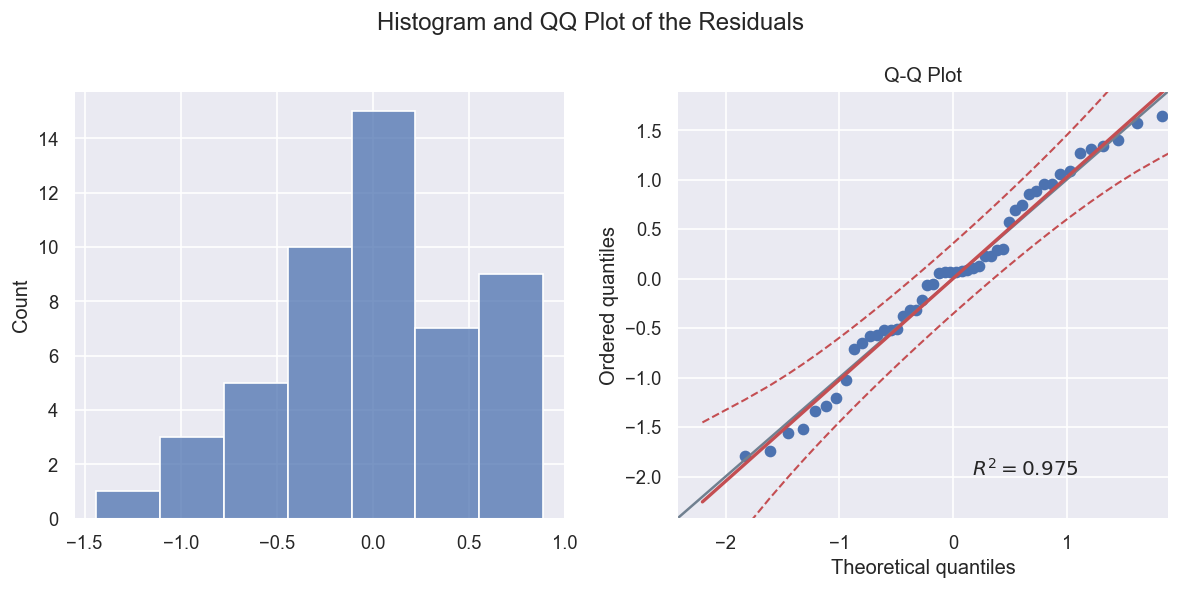

In [213]:
plt.rcParams["figure.figsize"] = [10, 5]
fig, ax =plt.subplots(1,2)
plt.suptitle('Histogram and QQ Plot of the Residuals')
sns.histplot(final_model.resid, ax=ax[0])
pg.qqplot(final_model.resid, confidence=0.95, dist='norm', ax=ax[1])
fig.tight_layout()

We have a much better fit with the same regressors, so we will stop here.

### Percent of Variance Explained by Each Regressor in the Final Model

In [214]:
reg_set=final_model.params
reg_set=list(reg_set.keys())
reg_set

['Connection: Average', 'Control: Average', 'Continuity: Average']

In [215]:
var_exp_regs('Meta-Factor Total', reg_set, df)

The Sum of Squared Residuals for the full model fit with ['Connection: Average', 'Control: Average', 'Continuity: Average'] is 25.17705
To calculate the Partial R-squared, we calculate (SSR_reduced-SSR_full)/SSR_reduced.


The Sum of Squared Residuals of the model fit with only ['Control: Average', 'Continuity: Average'] is 26.46419
The Partial R-squared, or the percent of the variation, described by adding Connection: Average to a model fit with only ['Control: Average', 'Continuity: Average'] is 4.864


The Sum of Squared Residuals of the model fit with only ['Connection: Average', 'Continuity: Average'] is 27.6795
The Partial R-squared, or the percent of the variation, described by adding Control: Average to a model fit with only ['Connection: Average', 'Continuity: Average'] is 9.041


The Sum of Squared Residuals of the model fit with only ['Connection: Average', 'Control: Average'] is 28.39708
The Partial R-squared, or the percent of the variation, described by adding Continuity:

In [216]:
# Getting the correlations between the regressors of the final model

for col in reg_set:
    for sec_col in reg_set:
        if col == sec_col:
            pass
        else:
            corr, pvalue=stats.spearmanr(df[col], df[sec_col])
            print('The correlation between', col, 'and', sec_col, 'is:', round(corr,5))

The correlation between Connection: Average and Control: Average is: 0.78841
The correlation between Connection: Average and Continuity: Average is: 0.68148
The correlation between Control: Average and Connection: Average is: 0.78841
The correlation between Control: Average and Continuity: Average is: 0.76459
The correlation between Continuity: Average and Connection: Average is: 0.68148
The correlation between Continuity: Average and Control: Average is: 0.76459


### Impact of Age

In [217]:
# Getting the final model's regressors:

reg_set=[]
for i in range(len(final_model.params)):
    reg_set.append(final_model.params.index[i])
    
reg_set

['Connection: Average', 'Control: Average', 'Continuity: Average']

In [218]:
df_aug, col_names= Augmented_DF(reg_set, df_prime)
df_prime=df_prime.reset_index()
df_aug

Age  Connection: Average  Connection: Average*Age  Control: Average  \
0   4.407407                  4.0                 3.771605               4.0   
1   2.481481                  3.5                 2.280864               3.0   
2   4.111111                  2.5                 2.546296               3.5   
3   3.074074                  5.0                 3.395062               4.0   
4   2.481481                  2.0                 1.660494               2.5   
5   1.592593                  5.0                 2.160494               5.0   
6   1.592593                  4.5                 2.027778               4.5   
7   1.888889                  3.0                 1.777778               3.5   
8   5.000000                  5.0                 5.000000               3.5   
9   2.925926                  4.0                 2.783951               4.0   
10  4.407407                  5.0                 4.506173               5.0   
11  3.370370                  3.0                 2.518519               3.0   
12  2.333333                  5.0                 2.777778               5.0   
13  2.481481                  5.0                 2.901235               4.0   
14  3.222222                  4.0                 2.981481               3.5   
15  1.296296                  2.0                 1.265432               3.5   
16  3.370370                  5.0                 3.641975               4.0   
17  1.444444                  5.0                 2.037037               5.0   
18  1.740741                  1.5                 1.268519               3.0   
19  4.703704                  3.5                 3.577160               5.0   
20  1.888889                  2.0                 1.462963               3.5   
21  1.296296                  1.5                 1.157407               3.0   
22  3.074074                  2.5                 2.114198               4.0   
23  1.888889                  4.5                 2.250000               4.5   
24  2.481481                  2.5                 1.867284               3.0   
25  2.629630                  3.5                 2.367284               3.5   
26  1.296296                  3.5                 1.589506               3.5   
27  3.074074                  2.5                 2.114198               3.5   
28  2.777778                  5.0                 3.148148               4.0   
29  3.222222                  2.5                 2.175926               5.0   
30  1.740741                  4.5                 2.138889               5.0   
31  2.333333                  4.0                 2.388889               4.0   
32  3.074074                  3.0                 2.370370               2.5   
33  1.740741                  5.0                 2.283951               5.0   
34  1.888889                  3.0                 1.777778               3.5   
35  1.888889                  5.0                 2.407407               4.0   
36  1.740741                  1.0                 1.123457               2.5   
37  4.703704                  2.5                 2.793210               3.5   
38  4.703704                  2.5                 2.793210               2.5   
39  4.259259                  1.5                 1.898148               2.5   
40  2.925926                  1.5                 1.564815               2.5   
41  2.037037                  2.0                 1.512346               2.0   
42  4.259259                  3.5                 3.317901               4.5   
43  2.333333                  1.5                 1.416667               2.5   
44  1.000000                  4.0                 1.500000               4.5   
45  2.629630                  2.5                 1.929012               3.5   
46  1.888889                  5.0                 2.407407               5.0   
47  2.037037                  5.0                 2.530864               5.0   
48  2.333333                  2.5                 1.805556               2.5   
49  2.629

In [219]:
final_model, aics=forward_stepwise_regression_interaction('Meta-Factor Total', col_names, df_prime, df_aug, 'None')

In [220]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Meta-Factor Total   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              876.9
Date:                Mon, 09 May 2022   Prob (F-statistic):                    3.04e-41
Time:                        18:19:01   Log-Likelihood:                         -38.136
No. Observations:                  50   AIC:                                      82.27
Df Residuals:                      47   BIC:                                      88.01
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Control: Average        0.4106      0.148      2.780      0.008       0.113       0.708
Connection: Average     0.2670      0.090      2.961      0.005       0.086       0.448
Continuity: Average     0.3123      0.110      2.842      0.007       0.091       0.533
==============================================================================
Omnibus:                        1.680   Durbin-Watson:                   2.459
Prob(Omnibus):                  0.432   Jarque-Bera (JB):                1.439
Skew:                          -0.410   Prob(JB):                        0.487
Kurtosis:                       2.860   Cond. No.                         16.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that Age has no effect.

## Regression with Elder Developmental Tasks as Regressors and Comp Meta Score as Dependent Variable

### Individual Regressors and their P-values

We begin by building a simple Ordinary Least Squares linear regression model with each factor alone to view the p-values, coefficients, and $R^2$.

In [221]:
single_olss=[]
for i in range(len(elder_dev_tasks_avg)):
    single_ols=single_factor_lr(df[elder_dev_tasks_avg[i]], df['Meta-Factor Total'])
    single_olss.append(single_ols)

In [222]:
single_olss[0:2]

[[Generativity: Average    1.051592
  dtype: float64,
  0.9539392808119449,
  Generativity: Average    9.349842e-36
  dtype: float64],
 [Keeper of Meaning: Average    1.056345
  dtype: float64,
  0.925387857244323,
  Keeper of Meaning: Average    2.083764e-30
  dtype: float64]]

In [223]:
# Splitting the factors and their p-values

coeffs=[]
r_squareds=[]
p_vals=[]
factors=[]
for i in range(len(single_olss)):
    factors.append(single_olss[i][0].index[0])
    coeffs.append(single_olss[i][0][0])
    r_squareds.append(single_olss[i][1])
    p_vals.append(single_olss[i][2][0])

In [224]:
# Creating a dataframe of the factors, coefficients, R^2, and p-values, then sorting them by highest to lowest

coeff_r2_pvals = {'Factor': factors, 'Coefficient':coeffs, 'R-squared': r_squareds, 'P-Value': p_vals}
df_coeff_r2_pvals = pd.DataFrame(data=coeff_r2_pvals)
df_coeff_r2_pvals=df_coeff_r2_pvals.sort_values('R-squared', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
df_coeff_r2_pvals

Factor  Coefficient  R-squared       P-Value
2      Ego Integrity: Average     1.011796   0.958934  4.996109e-37
0       Generativity: Average     1.051592   0.953939  9.349842e-36
1  Keeper of Meaning: Average     1.056345   0.925388  2.083764e-30

### Exhaustive Search Regression

In [225]:
ps_elder_dev_tasks_avg=[list(x) for x in power_set(elder_dev_tasks_avg)]

In [226]:
aic_subset=find_lowest_aic('Meta-Factor Total', ps_elder_dev_tasks_avg, df)
print('The lowest AIC is: ', aic_subset[0], 'with the following regressors: ', aic_subset[1])

The lowest AIC is:  116.49862915928964 with the following regressors:  ['Generativity: Average', 'Ego Integrity: Average']


In [227]:
final_model=sm.OLS(endog=df['Meta-Factor Total'], exog=df[aic_subset[1]]).fit()

In [228]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Meta-Factor Total   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              739.4
Date:                Mon, 09 May 2022   Prob (F-statistic):                    7.33e-38
Time:                        18:19:01   Log-Likelihood:                         -56.249
No. Observations:                  52   AIC:                                      116.5
Df Residuals:                      50   BIC:                                      120.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Generativity: Average      0.4703      0.132      3.576      0.001       0.206       0.735
Ego Integrity: Average     0.5704      0.126      4.519      0.000       0.317       0.824
==============================================================================
Omnibus:                       23.618   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.168
Skew:                           1.061   Prob(JB):                     4.76e-17
Kurtosis:                       8.495   Cond. No.                         9.46
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

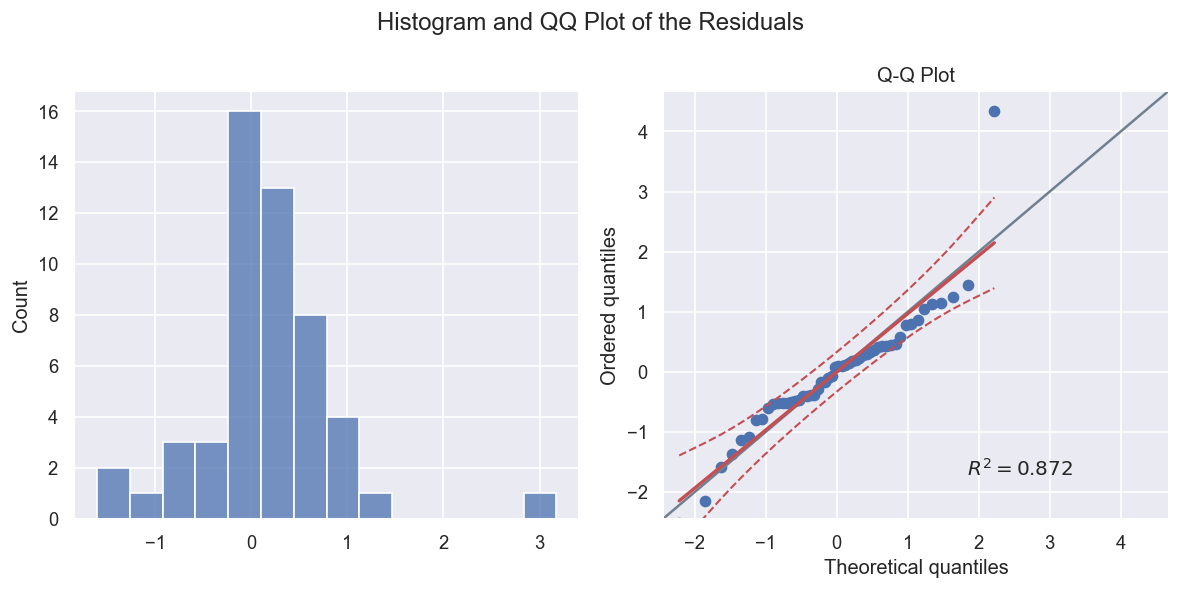

In [229]:
plt.rcParams["figure.figsize"] = [10, 5]
fig, ax =plt.subplots(1,2)
plt.suptitle('Histogram and QQ Plot of the Residuals')
sns.histplot(final_model.resid, ax=ax[0])
pg.qqplot(final_model.resid, confidence=0.95, dist='norm', ax=ax[1])
fig.tight_layout()

### Refitting without Potential Outliers

In [230]:
residuals=list(final_model.resid)
indices=[]
for resid in residuals:
    if resid >= 2.4:
        indices.append(residuals.index(resid))
print('Indices of residuals of interest:', indices)

Indices of residuals of interest: [37]


In [231]:
df.iloc[37]

Case Number                  38
Dem: Age               2.777778
Dem: Gender                   M
Dem: Marital Status           D
Dem: Ethnicity                W
                         ...   
Connection: Average         1.5
GCI: SF                       2
GCI: BG                       1
GCI: Average                1.5
Meta-Factor Total           4.5
Name: 37, Length: 96, dtype: object

In [232]:
df_prime=df.copy()
for row in indices:
    df_prime=df_prime.drop(labels=row, axis=0)

In [233]:
df_prime

Case Number  Dem: Age Dem: Gender Dem: Marital Status Dem: Ethnicity  \
0             1  4.407407           M                   W              W   
1             2  2.481481           F                   W              W   
2             3  4.111111           M                   W              W   
3             4  3.074074           M                   M              W   
4             5  2.481481           M                   M              W   
5             6  1.592593           F                   W              W   
6             7  1.592593           M                   M              W   
7             8  1.888889           F                   W              W   
8             9  5.000000           F                   W              W   
9            10  2.925926           M                   M              W   
10           11  4.407407           M                   M              W   
11           12  3.370370           M                   D              W   
12           13  2.333333           F                   W              W   
13           14  2.481481           M                   M              W   
14           15  3.222222           M                   W              W   
15           16  1.296296           M                   M              W   
16           17  3.370370           F                   M              W   
17           18  1.444444           F                   M              W   
18           19  1.740741           F                   M              W   
19           20  4.703704           M                   M              W   
20           21  1.888889           M                   M              W   
21           22  1.296296           M                   D              W   
22           23  3.074074           M                   M              W   
23           24  1.888889           M                   M              W   
24           25  2.481481           F                   M              W   
25           26  2.629630           M                   M              W   
26           27  1.296296           F                   M              W   
27           28  3.074074           M                   M              L   
28           29  2.777778           F                   W              W   
29           30  3.222222           F                   D              W   
30           31  1.740741           M                   M              B   
31           32  2.333333           F                   D              B   
32           33  3.074074           M                   M              B   
33           34  1.740741           F                   D           H-NA   
34           35  1.888889           F                   S              B   
35           36  1.888889           M                   M              B   
36           37  1.740741           M                   D              W   
38           39  4.703704           F                   W              W   
39           40  4.703704           F                   W              W   
40           41  4.259259           F                   S              W   
41           42  2.925926           F                   D              W   
42           43  3.074074           F                   D              W   
43           44  2.037037           F                   D              W   
44           45  4.259259           F                   W              B   
45           46  2.333333           M                   W              W   
46           47  1.000000           F                   D              W   
47           48  2.629630           M                   D              W   
48           49  1.888889           M                   M              L   
49           50  2.037037           F                   M              L   
50           51  2.333333           F                   M              A   
51           52  2.629630           M                   M         W-Arab   

   Dem: Socio-Economic Staus Dem: Residential Statu

In [234]:
ps_elder_dev_tasks_avg=[list(x) for x in power_set(elder_dev_tasks_avg)]

In [235]:
aic_subset=find_lowest_aic('Meta-Factor Total', ps_elder_dev_tasks_avg, df_prime)
print('The lowest AIC is: ', aic_subset[0], 'with the following regressors: ', aic_subset[1])

The lowest AIC is:  89.54418438636412 with the following regressors:  ['Generativity: Average', 'Ego Integrity: Average', 'Keeper of Meaning: Average']


In [236]:
final_model=sm.OLS(endog=df_prime['Meta-Factor Total'], exog=df_prime[aic_subset[1]]).fit()

In [237]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Meta-Factor Total   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              806.4
Date:                Mon, 09 May 2022   Prob (F-statistic):                    4.80e-41
Time:                        18:19:02   Log-Likelihood:                         -41.772
No. Observations:                  51   AIC:                                      89.54
Df Residuals:                      48   BIC:                                      95.34
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Generativity: Average          0.4012      0.121      3.316      0.002       0.158       0.645
Ego Integrity: Average         0.4833      0.101      4.774      0.000       0.280       0.687
Keeper of Meaning: Average     0.1612      0.093      1.738      0.089      -0.025       0.348
==============================================================================
Omnibus:                        8.375   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                7.592
Skew:                          -0.792   Prob(JB):                       0.0225
Kurtosis:                       4.032   Cond. No.                         12.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

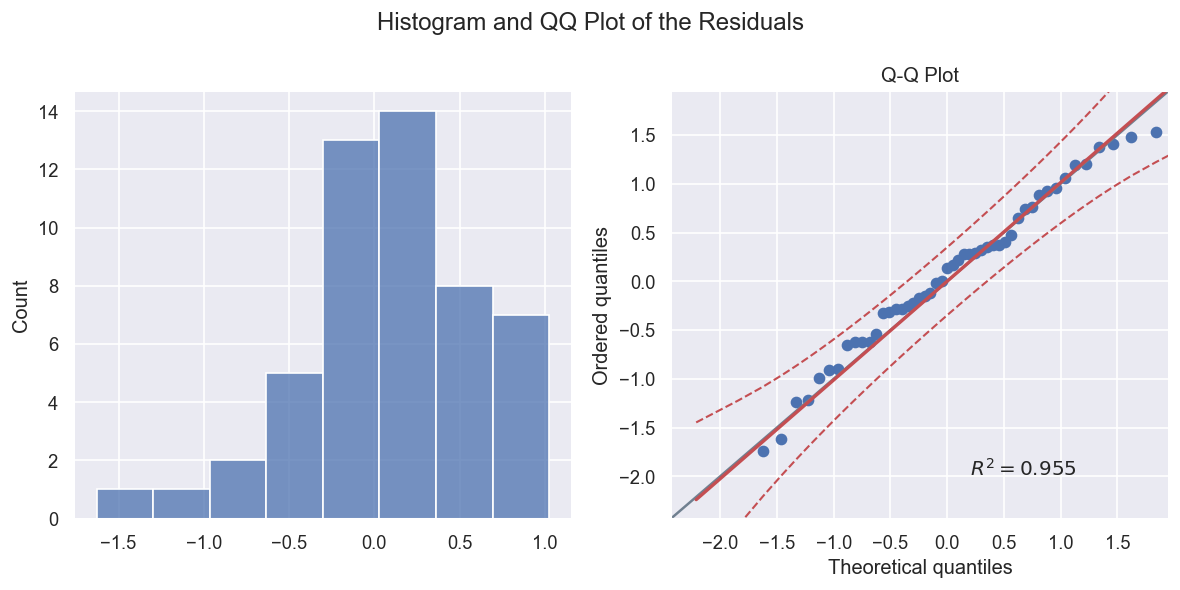

In [238]:
plt.rcParams["figure.figsize"] = [10, 5]
fig, ax =plt.subplots(1,2)
plt.suptitle('Histogram and QQ Plot of the Residuals')
sns.histplot(final_model.resid, ax=ax[0])
pg.qqplot(final_model.resid, confidence=0.95, dist='norm', ax=ax[1])
fig.tight_layout()

So, now that we have a good fit, we will see what happens with the AIC versus stepwise step plot, since Keep of Meaning isn't significant.

In [239]:
final_model, aics=forward_stepwise_regression('Meta-Factor Total', aic_subset[1], df_prime, 'None')

Text(0.5, 1.0, 'AIC Versus Step in Forward Stepwise Regression')

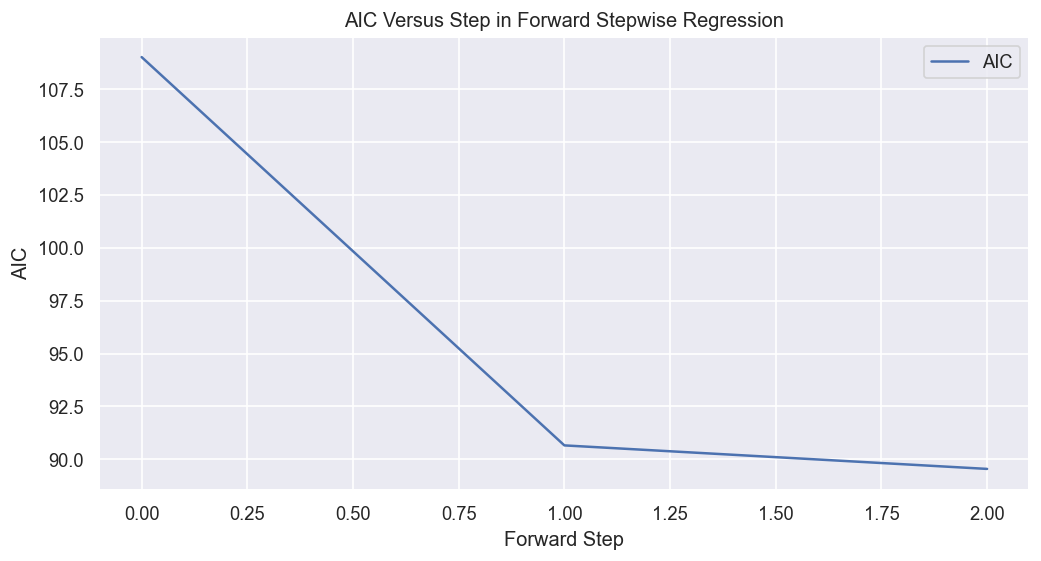

In [240]:
plt.plot(aics, label='AIC')
plt.xlabel('Forward Step')
plt.ylabel('AIC')
plt.legend()
plt.title('AIC Versus Step in Forward Stepwise Regression')

In [241]:
final_model, aics=forward_stepwise_regression('Meta-Factor Total', aic_subset[1], df_prime, 2)

So, we will stop at two regressors.

In [242]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Meta-Factor Total   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1160.
Date:                Mon, 09 May 2022   Prob (F-statistic):                    5.37e-42
Time:                        18:19:03   Log-Likelihood:                         -43.328
No. Observations:                  51   AIC:                                      90.66
Df Residuals:                      49   BIC:                                      94.52
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Ego Integrity: Average     0.5241      0.100      5.217      0.000       0.322       0.726
Generativity: Average      0.5129      0.105      4.903      0.000       0.303       0.723
==============================================================================
Omnibus:                        6.626   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                5.579
Skew:                          -0.681   Prob(JB):                       0.0615
Kurtosis:                       3.879   Cond. No.                         9.48
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Percent of Variance Explained by Each Regressor in the Final Model

In [243]:
reg_set=final_model.params
reg_set=list(reg_set.keys())
reg_set

['Ego Integrity: Average', 'Generativity: Average']

In [244]:
var_exp_regs('Meta-Factor Total', reg_set, df)

The Sum of Squared Residuals for the full model fit with ['Ego Integrity: Average', 'Generativity: Average'] is 26.49091
To calculate the Partial R-squared, we calculate (SSR_reduced-SSR_full)/SSR_reduced.


The Sum of Squared Residuals of the model fit with only ['Generativity: Average'] is 37.3101
The Partial R-squared, or the percent of the variation, described by adding Ego Integrity: Average to a model fit with only ['Generativity: Average'] is 28.998


The Sum of Squared Residuals of the model fit with only ['Ego Integrity: Average'] is 33.26443
The Partial R-squared, or the percent of the variation, described by adding Generativity: Average to a model fit with only ['Ego Integrity: Average'] is 20.363


In [245]:
# Getting the correlations between the regressors of the final model

for col in reg_set:
    for sec_col in reg_set:
        if col == sec_col:
            pass
        else:
            corr, pvalue=stats.spearmanr(df[col], df[sec_col])
            print('The correlation between', col, 'and', sec_col, 'is:', round(corr,5))

The correlation between Ego Integrity: Average and Generativity: Average is: 0.76024
The correlation between Generativity: Average and Ego Integrity: Average is: 0.76024


### Impact of Age

In [246]:
# Getting the final model's regressors:

reg_set=[]
for i in range(len(final_model.params)):
    reg_set.append(final_model.params.index[i])
    
reg_set

['Ego Integrity: Average', 'Generativity: Average']

In [247]:
df_aug, col_names= Augmented_DF(reg_set, df_prime)
df_prime=df_prime.reset_index()
df_aug

Age  Ego Integrity: Average  Ego Integrity: Average*Age  \
0   4.407407                     3.5                    3.404321   
1   2.481481                     2.5                    1.867284   
2   4.111111                     3.0                    2.888889   
3   3.074074                     5.0                    3.395062   
4   2.481481                     2.0                    1.660494   
5   1.592593                     5.0                    2.160494   
6   1.592593                     4.0                    1.895062   
7   1.888889                     4.0                    2.092593   
8   5.000000                     5.0                    5.000000   
9   2.925926                     5.0                    3.271605   
10  4.407407                     5.0                    4.506173   
11  3.370370                     2.0                    1.956790   
12  2.333333                     5.0                    2.777778   
13  2.481481                     5.0                    2.901235   
14  3.222222                     2.5                    2.175926   
15  1.296296                     2.5                    1.373457   
16  3.370370                     5.0                    3.641975   
17  1.444444                     5.0                    2.037037   
18  1.740741                     2.0                    1.413580   
19  4.703704                     3.0                    3.185185   
20  1.888889                     2.0                    1.462963   
21  1.296296                     2.0                    1.265432   
22  3.074074                     3.5                    2.626543   
23  1.888889                     4.0                    2.092593   
24  2.481481                     2.5                    1.867284   
25  2.629630                     3.0                    2.148148   
26  1.296296                     3.0                    1.481481   
27  3.074074                     4.5                    3.138889   
28  2.777778                     4.5                    2.916667   
29  3.222222                     4.5                    3.250000   
30  1.740741                     5.0                    2.283951   
31  2.333333                     4.5                    2.583333   
32  3.074074                     3.0                    2.370370   
33  1.740741                     5.0                    2.283951   
34  1.888889                     4.5                    2.250000   
35  1.888889                     5.0                    2.407407   
36  1.740741                     1.0                    1.123457   
37  4.703704                     4.5                    4.361111   
38  4.703704                     2.5                    2.793210   
39  4.259259                     1.5                    1.898148   
40  2.925926                     2.0                    1.808642   
41  3.074074                     4.5                    3.138889   
42  2.037037                     1.0                    1.172840   
43  4.259259                     4.5                    4.027778   
44  2.333333                     3.0                    2.000000   
45  1.000000                     4.5                    1.583333   
46  2.629630                     3.0                    2.148148   
47  1.888889                     5.0                    2.407407   
48  2.037037                     5.0                    2.530864   
49  2.333333                     3.0                    2.000000   
50  2.629630                     4.5                    2.805556   

    Generativity: Average  Generativity: Average*Age  
0                     3.5                   3.404321  
1                     3.0                   2.074074  
2                     2.0                   2.203704  
3                     5.0                   3.395062  
4                     2.0                   1.660494  
5                     5.0                   2.160494  
6                     4.0                   1.895062  
7                     4.5       

In [248]:
final_model, aics=forward_stepwise_regression_interaction('Meta-Factor Total', col_names, df_prime, df_aug, 'None')

In [249]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Meta-Factor Total   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              860.1
Date:                Mon, 09 May 2022   Prob (F-statistic):                    2.69e-43
Time:                        18:19:04   Log-Likelihood:                         -32.412
No. Observations:                  51   AIC:                                      72.82
Df Residuals:                      47   BIC:                                      80.55
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Ego Integrity: Average         0.8532      0.131      6.500      0.000       0.589       1.117
Generativity: Average          0.3675      0.091      4.038      0.000       0.184       0.551
Age                            0.6591      0.139      4.758      0.000       0.380       0.938
Ego Integrity: Average*Age    -0.9641      0.251     -3.846      0.000      -1.468      -0.460
==============================================================================
Omnibus:                        5.543   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                4.433
Skew:                          -0.658   Prob(JB):                        0.109
Kurtosis:                       3.593   Cond. No.                         29.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that everything is significant. We will run an AIC versus step.

Text(0.5, 1.0, 'AIC Versus Step in Forward Stepwise Regression')

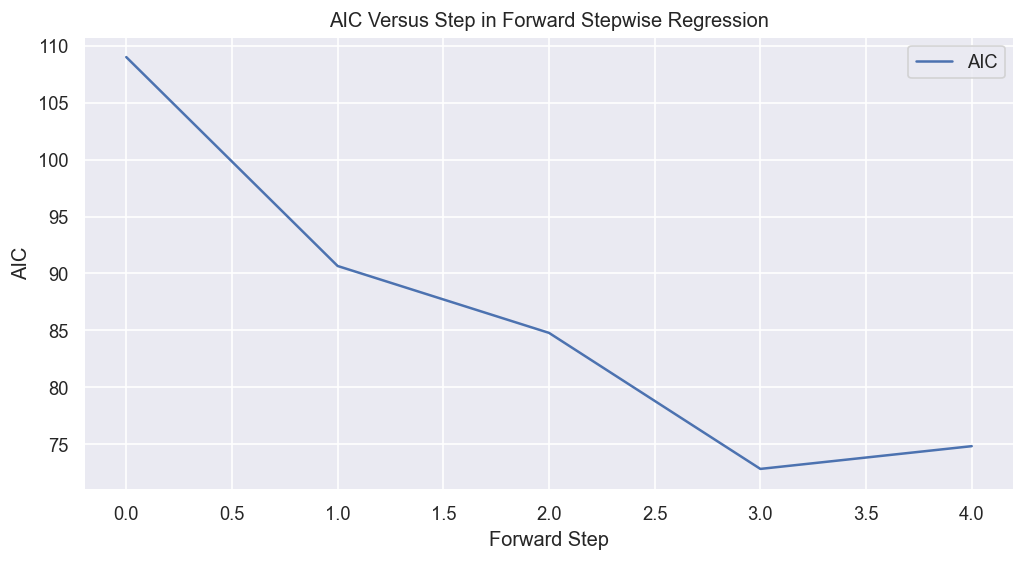

In [250]:
plt.plot(aics, label='AIC')
plt.xlabel('Forward Step')
plt.ylabel('AIC')
plt.legend()
plt.title('AIC Versus Step in Forward Stepwise Regression')

This isn't helpful. We will fit for Ego Integrity times Age with all other regressors.

In [251]:
new_regs=['Ego Integrity: Average', 'Generativity: Average', 'Age']

In [252]:
final_model=sm.OLS(endog=df_aug['Ego Integrity: Average*Age'], exog=df_aug[new_regs]).fit()

In [253]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Ego Integrity: Average*Age   R-squared (uncentered):                   0.990
Model:                                    OLS   Adj. R-squared (uncentered):              0.989
Method:                         Least Squares   F-statistic:                              1528.
Date:                        Mon, 09 May 2022   Prob (F-statistic):                    1.30e-47
Time:                                18:19:04   Log-Likelihood:                         -4.7981
No. Observations:                          51   AIC:                                      15.60
Df Residuals:                              48   BIC:                                      21.39
Df Model:                                   3                                                  
Covariance Type:                    nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Ego Integrity: Average     0.4001      0.049      8.206      0.000       0.302       0.498
Generativity: Average     -0.0940      0.051     -1.857      0.069      -0.196       0.008
Age                        0.5139      0.029     17.521      0.000       0.455       0.573
==============================================================================
Omnibus:                       14.491   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.075
Skew:                           0.944   Prob(JB):                     4.37e-05
Kurtosis:                       5.425   Cond. No.                         10.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Doing this, it seems as if these three factors account well for the interaction term between Ego Integrity and Age.

In [254]:
final_regs=['Ego Integrity: Average', 'Generativity: Average', 'Age']

In [255]:
final_model=sm.OLS(endog=df_prime['Meta-Factor Total'], exog=df_aug[final_regs]).fit()

In [256]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Meta-Factor Total   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              887.0
Date:                Mon, 09 May 2022   Prob (F-statistic):                    5.11e-42
Time:                        18:19:04   Log-Likelihood:                         -39.389
No. Observations:                  51   AIC:                                      84.78
Df Residuals:                      48   BIC:                                      90.57
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Ego Integrity: Average     0.4674      0.096      4.865      0.000       0.274       0.661
Generativity: Average      0.4581      0.100      4.593      0.000       0.258       0.659
Age                        0.1636      0.058      2.831      0.007       0.047       0.280
==============================================================================
Omnibus:                       14.471   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.513
Skew:                          -1.046   Prob(JB):                     0.000157
Kurtosis:                       4.966   Cond. No.                         10.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So, we can say that Age is signficant here.

# Influence of Demographics

## Race

It seems as if I do not have enough racial diversity/data points to really get anything out of it. Even White/Non-White won't really work. Really, this could be the Socio-Economic variable.

## Residential Status and Elder Identity Revision factor Competence

For this, we will find the simple average Competence Score of each possible Residential Status.

### Average Competence Score of H versus Not H

In [257]:
H=[]
Not_H=[]
for i in range(len(df)):
    if df['Dem: Residential Status'][i] == 'H':
        H.append(df['Competence: Average'][i])
    if df['Dem: Residential Status'][i] == 'IL' or df['Dem: Residential Status'][i] == 'AL' or df['Dem: Residential Status'][i] == 'I' or df['Dem: Residential Status'][i] == 'R':
        Not_H.append(df['Competence: Average'][i])


In [258]:
print('The Residential Status', 'H','had an average Competence Score of:', round(sum(H)/len(H),2), 'with', len(H), 'data points.')
print('The Residential Status', 'Not-H','had an average Competence Score of:', round(sum(Not_H)/len(Not_H),2), 'with', len(Not_H), 'data points.')

The Residential Status H had an average Competence Score of: 4.1 with 35 data points.
The Residential Status Not-H had an average Competence Score of: 2.94 with 17 data points.


### Plotting the Frequencies

Text(0.5, 1.0, 'Frequency plot of Competence values for Residential Status H')

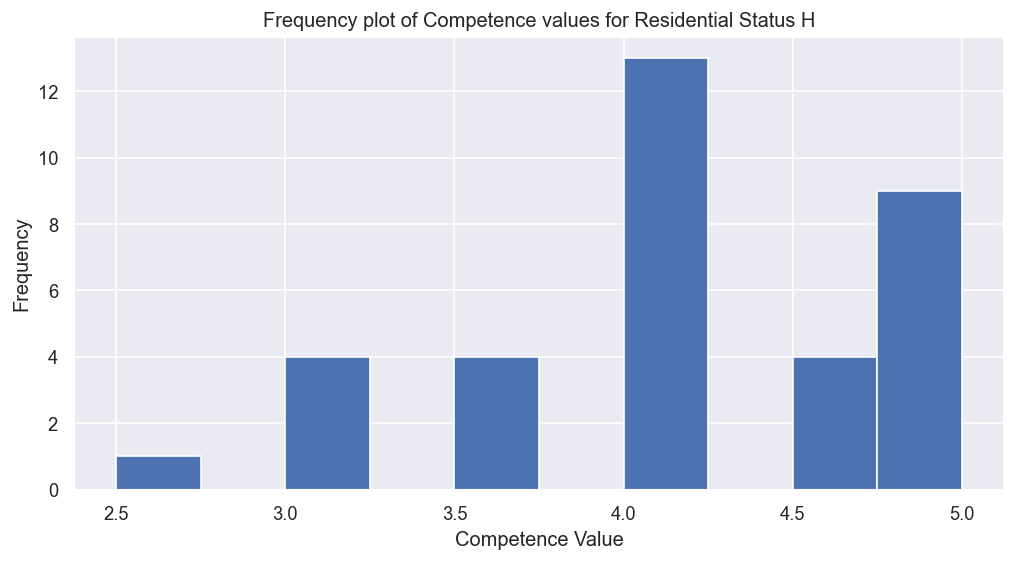

In [259]:
plt.hist(H)
plt.xlabel('Competence Value')
plt.ylabel('Frequency')
plt.title('Frequency plot of Competence values for Residential Status H')

Text(0.5, 1.0, 'Frequency plot of Competence values for Residential Status Not-H')

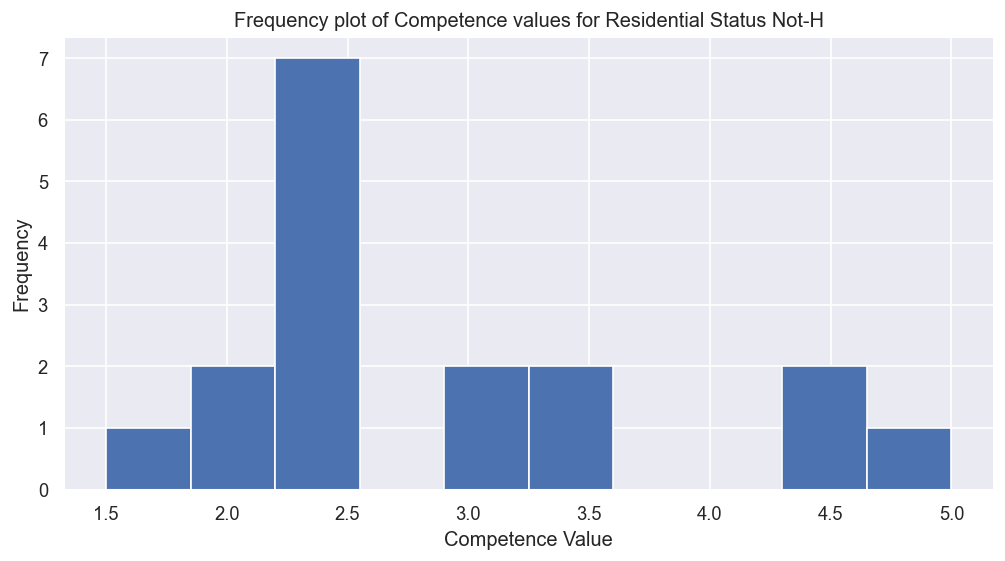

In [260]:
plt.hist(Not_H)
plt.xlabel('Competence Value')
plt.ylabel('Frequency')
plt.title('Frequency plot of Competence values for Residential Status Not-H')

### Fisher's Exact Test

In [261]:
high_H=[]
low_H=[]
for val in H:
        if val<=2.5:
            low_H.append(1)
        else:
            high_H.append(1)
            
high_Not_H=[]
low_Not_H=[]

for val in Not_H:
        if val<=2.5:
            low_Not_H.append(1)
        else:
            high_Not_H.append(1)
            
H_low_freq=len(low_H)/len(H)
H_high_freq=len(high_H)/len(H)

Not_H_low_freq=len(low_Not_H)/len(Not_H)
Not_H_high_freq=len(high_Not_H)/len(Not_H)
            
    
print('We chose "Low" to mean 2.5 or lower and "High" to mean greater than 2.5.')
print('\n')
print('Low frequency for H:', round(H_low_freq,3))
print('High frequency for H:', round(H_high_freq,3))
print('\n')
print('Low frequency for Not_H:', round(Not_H_low_freq,3))
print('High frequency for Not_H:', round(Not_H_high_freq,3))

We chose "Low" to mean 2.5 or lower and "High" to mean greater than 2.5.


Low frequency for H: 0.029
High frequency for H: 0.971


Low frequency for Not_H: 0.588
High frequency for Not_H: 0.412


We will run Fishers Exact Test to determine if there is an association between Residential Status and Competence.

Hypotheses:

$H_0$: The two variables (Competency and Home Ownership) are independent.

$H_1$: They're not independent, or there is some kind of association.

In [262]:
# Table with our values
table = [[10, 7],[1, 34]]

# Running Fishers Exact test
_, p_val=scipy.stats.fisher_exact(table, alternative='two-sided')
print('The p-value is:', p_val)

The p-value is: 1.147372874671027e-05


Our p-value is enough to reject the null as any reasonable level of confidence. Interpretation: There is an association between home ownership and high/low competency. Further, if you own a home, you have a higher score. 

# K-Means Clustering

Note: Rerunning the clustering algorithms can have them put into different groups, though the analysis remains the same. Just double-check the accuracy. It is set up to be high, so if it is low, it means that iteration switched the cluster labels.

In [263]:
def PCA_plotting(X):
    X=X.copy()
    # Scaling the data with our X_train matrix
    scaler=StandardScaler()
    X=scaler.fit_transform(X)
    
    # Fitting the PCA to our X_train matrix
    pca=PCA()
    X_pca=pca.fit_transform(X)
    
    # Plot the cumulative sum of the explained variance ratio
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(cumsum, 'rx-')
    plt.xlabel('Principal component number')
    plt.ylabel('Cum sum')
    plt.title('The cumulative sum of exp var ratio for X');

    # Plot the spectrum of the covariance matrix
    plt.figure(figsize=(8,8))
    plt.plot(pca.explained_variance_, 'bo-')
    plt.xlabel('Principal component number')
    plt.ylabel('Eigenvalues')
    plt.title('The spectrum of the covariance matrix for X');

In [264]:
def pca_comps(X, no_comps):
    X=X.copy()
    # Scaling the data with our X_train matrix
    scaler=StandardScaler()
    X=scaler.fit_transform(X)
    
    # Fitting the PCA to our X_train matrix
    pca=PCA(no_comps)
    X_pca=pca.fit_transform(X)
    
    return X_pca

## All Factors versus GCI

In [265]:
# Setting up our clustering data

X=df[all_averages]
y=df['GCI: Average']

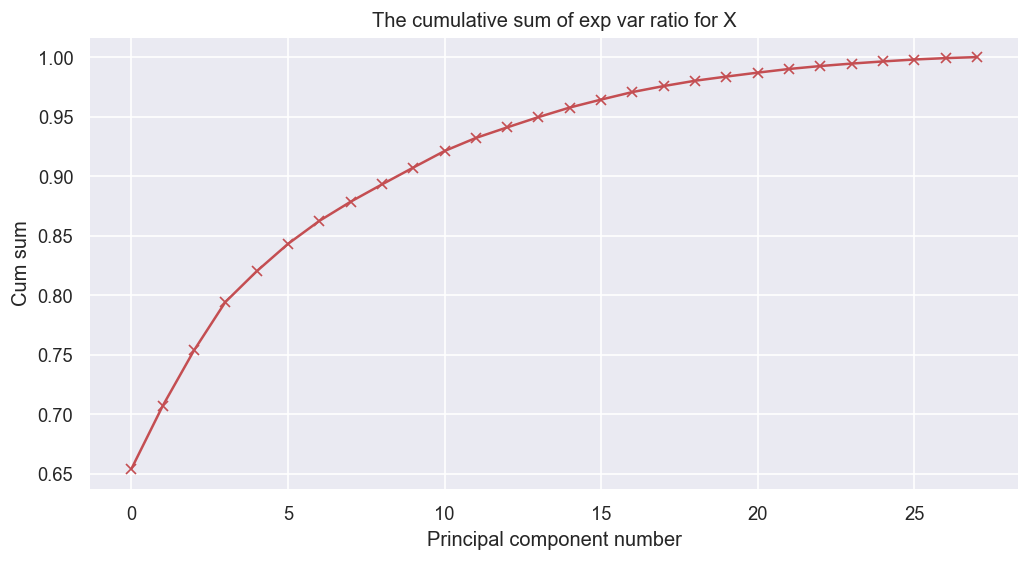

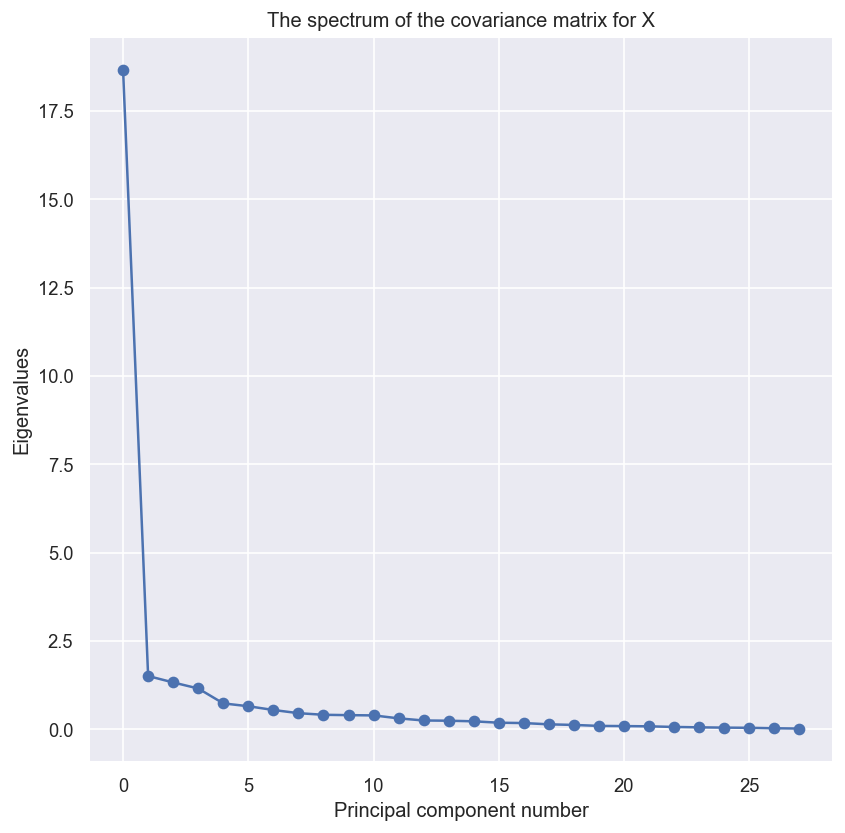

In [266]:
# PCA

# X=df[all_averages]
PCA_plotting(X)

In [267]:
pca_comp=pca_comps(X, 2)

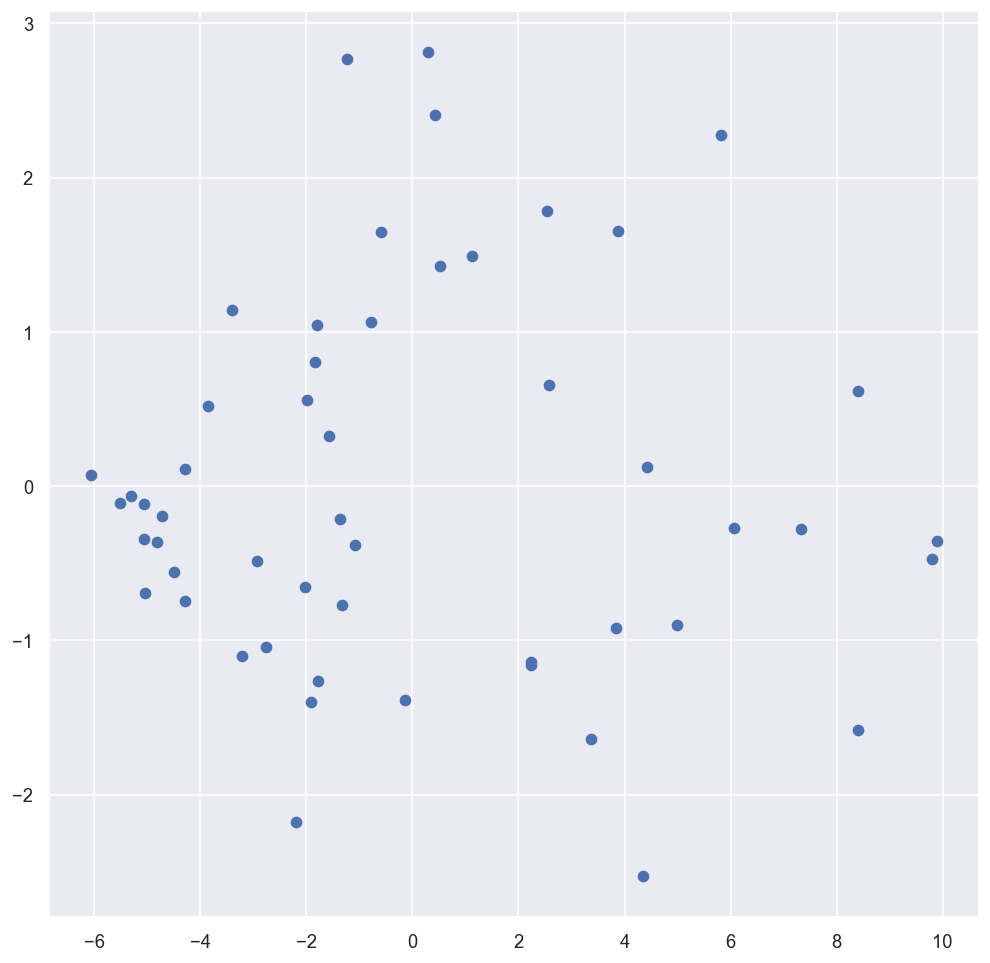

In [268]:
x=[]
y=[]
for i in range(len(pca_comp)):
    x.append(pca_comp[i][0])
    y.append(pca_comp[i][1])

fig = plt.figure(figsize=(10,10))
plt.scatter(x,y)

In [269]:
pca_comp=pca_comps(X, 3)

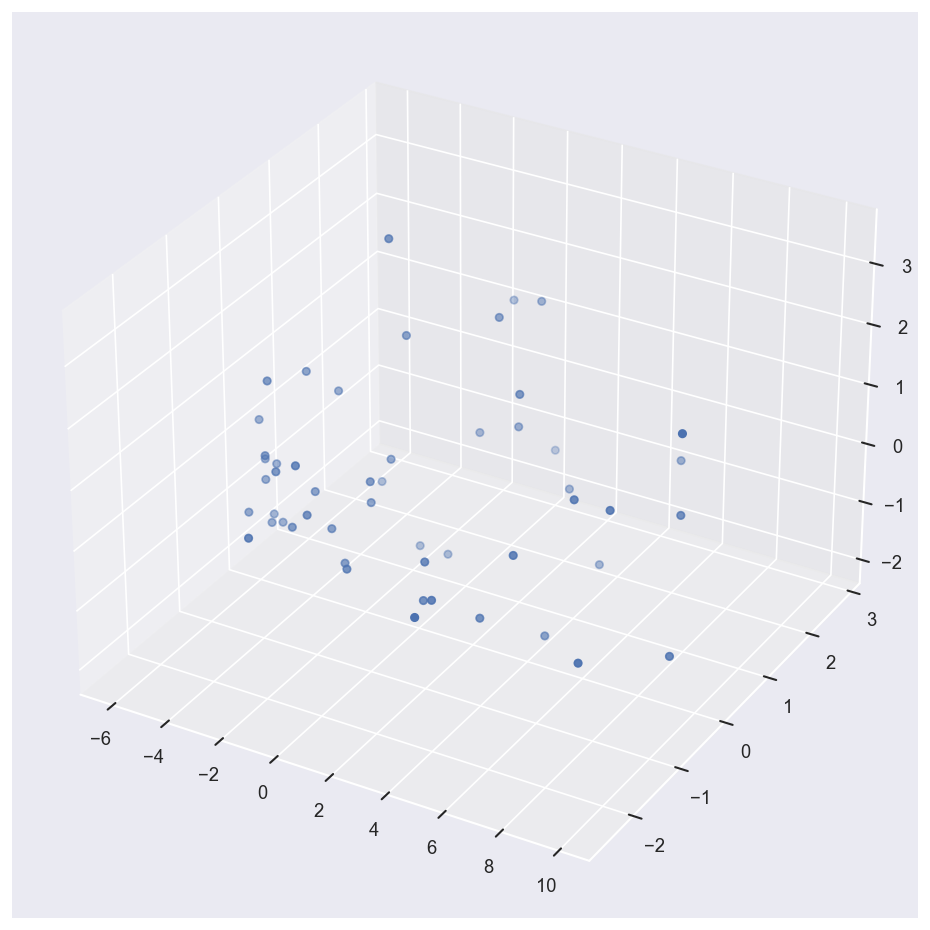

In [270]:
x=[]
y=[]
z=[]
for i in range(len(pca_comp)):
    x.append(pca_comp[i][0])
    y.append(pca_comp[i][1])
    z.append(pca_comp[i][2])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)

Note, we need to redo our X, as the PCA has changed it.

In [271]:
# Setting up our clustering data

X=df[all_averages]
y=df['GCI: Average']

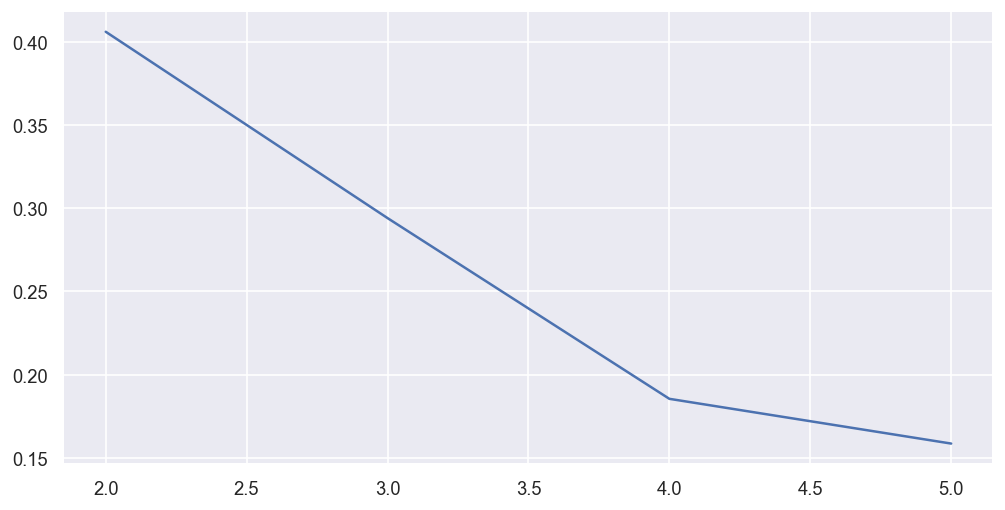

In [272]:
# Running Sil Scores

sil_scores=[]
K_vals=[2, 3, 4, 5]
for K in K_vals:
    kmeans=KMeans(n_clusters=K)
    kmeans.fit(X)
    sil_score=silhouette_score(X, kmeans.labels_)
    sil_scores.append(sil_score)
    
plt.plot(K_vals, sil_scores)

It seems as if two clusters is the best

Note, before continuing, rerun the cell where we define X and y, as we have altered X by PCA and we want the original dataset.

In [273]:
# k-Means with k=2

K=2
kmeans=KMeans(n_clusters=K)
y_pred=kmeans.fit_predict(X)

for i in range(len(y)):
    print('GCI Score:',y[i], 'Group:', y_pred[i])

GCI Score: 4.0 Group: 0
GCI Score: 4.0 Group: 0
GCI Score: 3.0 Group: 1
GCI Score: 4.5 Group: 0
GCI Score: 2.0 Group: 1
GCI Score: 5.0 Group: 0
GCI Score: 4.0 Group: 0
GCI Score: 4.0 Group: 0
GCI Score: 5.0 Group: 0
GCI Score: 4.0 Group: 0
GCI Score: 5.0 Group: 0
GCI Score: 3.0 Group: 1
GCI Score: 5.0 Group: 0
GCI Score: 5.0 Group: 0
GCI Score: 3.0 Group: 0
GCI Score: 2.5 Group: 0
GCI Score: 4.5 Group: 0
GCI Score: 5.0 Group: 0
GCI Score: 2.0 Group: 1
GCI Score: 4.0 Group: 0
GCI Score: 3.0 Group: 1
GCI Score: 2.0 Group: 1
GCI Score: 4.0 Group: 0
GCI Score: 4.5 Group: 0
GCI Score: 2.5 Group: 0
GCI Score: 3.0 Group: 1
GCI Score: 3.0 Group: 1
GCI Score: 3.5 Group: 0
GCI Score: 4.0 Group: 0
GCI Score: 3.5 Group: 0
GCI Score: 5.0 Group: 0
GCI Score: 4.0 Group: 0
GCI Score: 3.0 Group: 1
GCI Score: 5.0 Group: 0
GCI Score: 4.0 Group: 0
GCI Score: 5.0 Group: 0
GCI Score: 1.0 Group: 1
GCI Score: 1.5 Group: 1
GCI Score: 4.5 Group: 0
GCI Score: 3.0 Group: 1
GCI Score: 2.0 Group: 1
GCI Score: 1.5 G

It seems that group 0 is associated with higher GCI scores. Let's recode the GCI scores as high or low and then see how accurate these groups are.

In [274]:

labels=[]
for val in y:
    if val <= 3:
        labels.append(1) # Low group
    else:
        labels.append(0) # High group


correct=[]
for i in range(len(y)):
    if labels[i] == y_pred[i]:
        correct.append(1)
        
print('The percentage correct is:', 100*round(len(correct)/len(y),4))

The percentage correct is: 92.31


In [275]:
# Viewing the cluster means

print('Both Clusters:',kmeans.cluster_centers_,'\n')
print('First Cluster:', kmeans.cluster_centers_[0],'\n')
print('Second Cluster:', kmeans.cluster_centers_[1])

Both Clusters: [[4.51428571 4.27142857 4.21428571 4.32857143 4.25714286 4.08571429
  3.95714286 4.28571429 4.17142857 4.4        4.14285714 3.8
  4.24285714 4.32857143 3.82857143 4.32857143 4.64285714 4.81428571
  4.32857143 3.52857143 4.2        4.2        4.24285714 4.12857143
  4.15714286 4.48571429 3.84285714 3.95714286]
 [2.52941176 2.88235294 2.52941176 2.88235294 2.73529412 2.20588235
  2.11764706 2.20588235 3.07843137 2.64705882 2.17647059 2.23529412
  2.29411765 2.85294118 2.88235294 3.         3.61764706 3.32352941
  3.05882353 2.         2.79411765 2.79411765 2.91176471 2.82352941
  2.82352941 3.61764706 2.02941176 2.14705882]] 

First Cluster: [4.51428571 4.27142857 4.21428571 4.32857143 4.25714286 4.08571429
 3.95714286 4.28571429 4.17142857 4.4        4.14285714 3.8
 4.24285714 4.32857143 3.82857143 4.32857143 4.64285714 4.81428571
 4.32857143 3.52857143 4.2        4.2        4.24285714 4.12857143
 4.15714286 4.48571429 3.84285714 3.95714286] 

Second Cluster: [2.52941176

In [276]:
# Viewing their relationship with the factors

for i in range(len(all_averages)):
    print(all_averages[i],round(kmeans.cluster_centers_[0][i],2))

Gratitude: Average 4.51
Active Habits: Physical, Mental, Social: Average 4.27
Purpose, Meaning: Average 4.21
Resilience (including post-traumatic growth): Average 4.33
Self-Acceptance, Self-Esteem: Average 4.26
Generativity: Average 4.09
Keeper of Meaning: Average 3.96
Ego Integrity: Average 4.29
Controllable Protective Factors: Only factor that goes up to 7: Average 4.17
Reliable Attachment Figure(s): Average 4.4
Healthy Grieving: Average 4.14
Sense of Humor: Average 3.8
Tragic Optimism (realistic but hopeful): Average 4.24
Mood: Average 4.33
Anxiety: Average 3.83
Energy: Average 4.33
Cognitive: Average 4.64
Engagement: Average 4.81
Candor: Average 4.33
Open System: Average 3.53
Narrative Coherence: Average 4.2
Transparency: Average 4.2
Youthfulness: Average 4.24
Control: Average 4.13
Competence: Average 4.16
Continuity: Average 4.49
Consciousness: Average 3.84
Connection: Average 3.96


In [277]:
# Top 3

ordered_cluster=list(kmeans.cluster_centers_[0].copy())
ordered_cluster.sort(reverse=True)


print('Top 3 Factors Most Indicative of a High Score for k-Means Clustering:')
for i in range(3):
    score=ordered_cluster[i]
    index=list(kmeans.cluster_centers_[0]).index(score)
    factor=all_averages[index]
    print(factor, round(score,2))

Top 3 Factors Most Indicative of a High Score for k-Means Clustering:
Engagement: Average 4.81
Cognitive: Average 4.64
Gratitude: Average 4.51


We see Gratitude showing up here, same as the Linear Regression.

## All Non-Meta Factor versus Comp Meta Score

In [278]:
# Removing rows we dropped in the regression

df_prime=df.copy()
df_prime=df_prime.drop(labels=37, axis=0)
df_prime

Case Number  Dem: Age Dem: Gender Dem: Marital Status Dem: Ethnicity  \
0             1  4.407407           M                   W              W   
1             2  2.481481           F                   W              W   
2             3  4.111111           M                   W              W   
3             4  3.074074           M                   M              W   
4             5  2.481481           M                   M              W   
5             6  1.592593           F                   W              W   
6             7  1.592593           M                   M              W   
7             8  1.888889           F                   W              W   
8             9  5.000000           F                   W              W   
9            10  2.925926           M                   M              W   
10           11  4.407407           M                   M              W   
11           12  3.370370           M                   D              W   
12           13  2.333333           F                   W              W   
13           14  2.481481           M                   M              W   
14           15  3.222222           M                   W              W   
15           16  1.296296           M                   M              W   
16           17  3.370370           F                   M              W   
17           18  1.444444           F                   M              W   
18           19  1.740741           F                   M              W   
19           20  4.703704           M                   M              W   
20           21  1.888889           M                   M              W   
21           22  1.296296           M                   D              W   
22           23  3.074074           M                   M              W   
23           24  1.888889           M                   M              W   
24           25  2.481481           F                   M              W   
25           26  2.629630           M                   M              W   
26           27  1.296296           F                   M              W   
27           28  3.074074           M                   M              L   
28           29  2.777778           F                   W              W   
29           30  3.222222           F                   D              W   
30           31  1.740741           M                   M              B   
31           32  2.333333           F                   D              B   
32           33  3.074074           M                   M              B   
33           34  1.740741           F                   D           H-NA   
34           35  1.888889           F                   S              B   
35           36  1.888889           M                   M              B   
36           37  1.740741           M                   D              W   
38           39  4.703704           F                   W              W   
39           40  4.703704           F                   W              W   
40           41  4.259259           F                   S              W   
41           42  2.925926           F                   D              W   
42           43  3.074074           F                   D              W   
43           44  2.037037           F                   D              W   
44           45  4.259259           F                   W              B   
45           46  2.333333           M                   W              W   
46           47  1.000000           F                   D              W   
47           48  2.629630           M                   D              W   
48           49  1.888889           M                   M              L   
49           50  2.037037           F                   M              L   
50           51  2.333333           F                   M              A   
51           52  2.629630           M                   M         W-Arab   

   Dem: Socio-Economic Staus Dem: Residential Statu

In [279]:
# Setting up our clustering data

X=df_prime[non_meta_factor_averages]
y=df_prime['Meta-Factor Total']

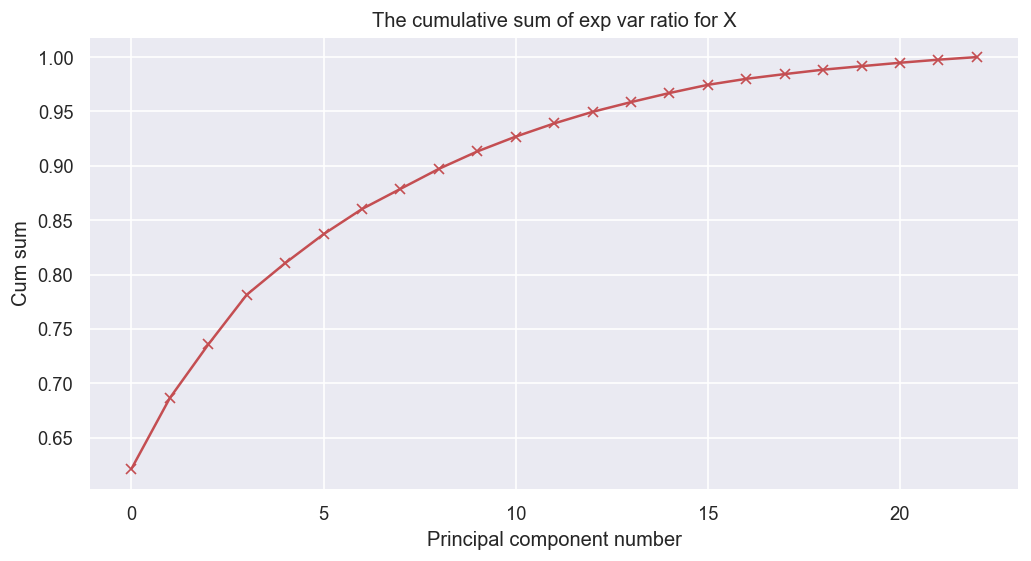

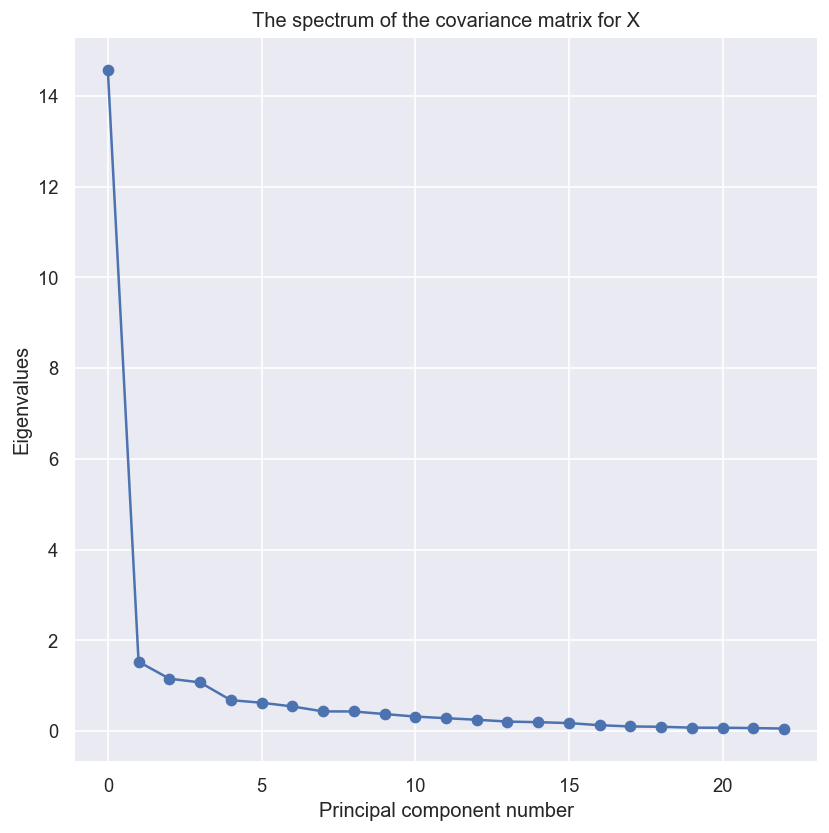

In [280]:
# PCA

# X=df[all_averages]
PCA_plotting(X)

In [281]:
pca_comp=pca_comps(X, 2)

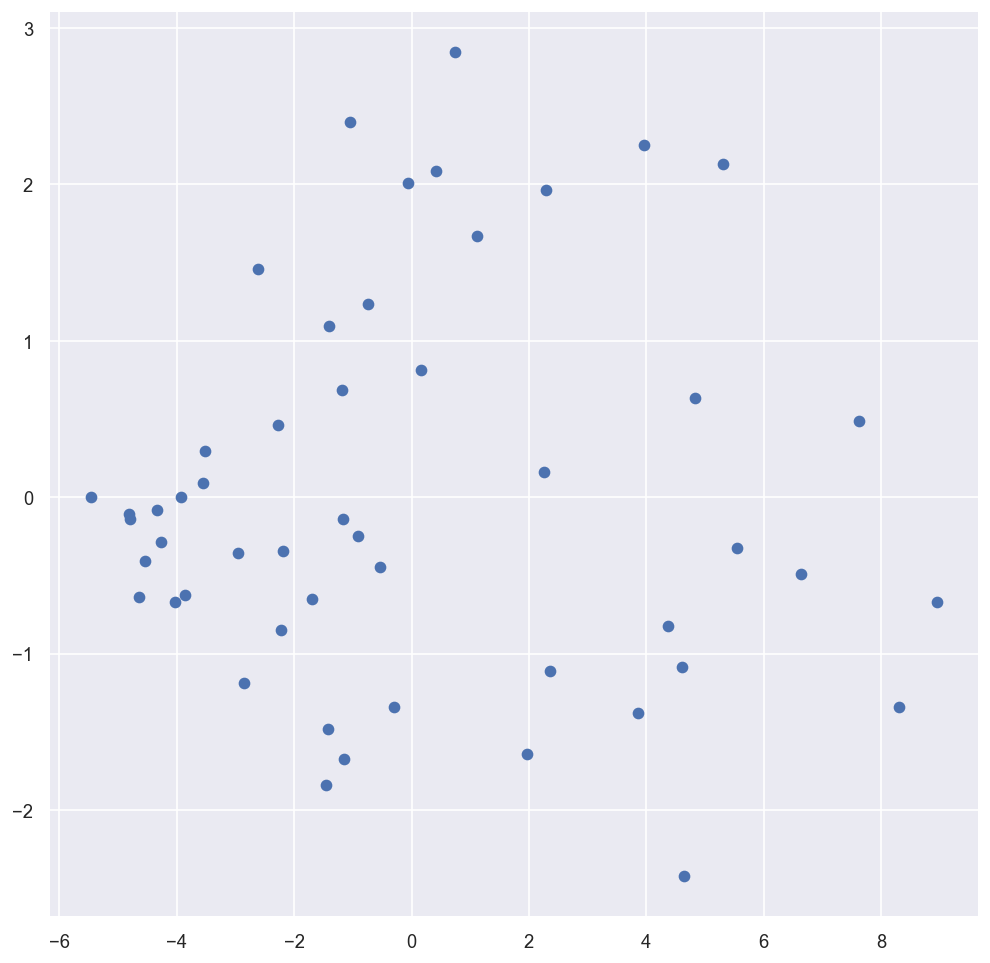

In [282]:
x=[]
y=[]
for i in range(len(pca_comp)):
    x.append(pca_comp[i][0])
    y.append(pca_comp[i][1])

fig = plt.figure(figsize=(10,10))
plt.scatter(x,y)

In [283]:
pca_comp=pca_comps(X, 3)

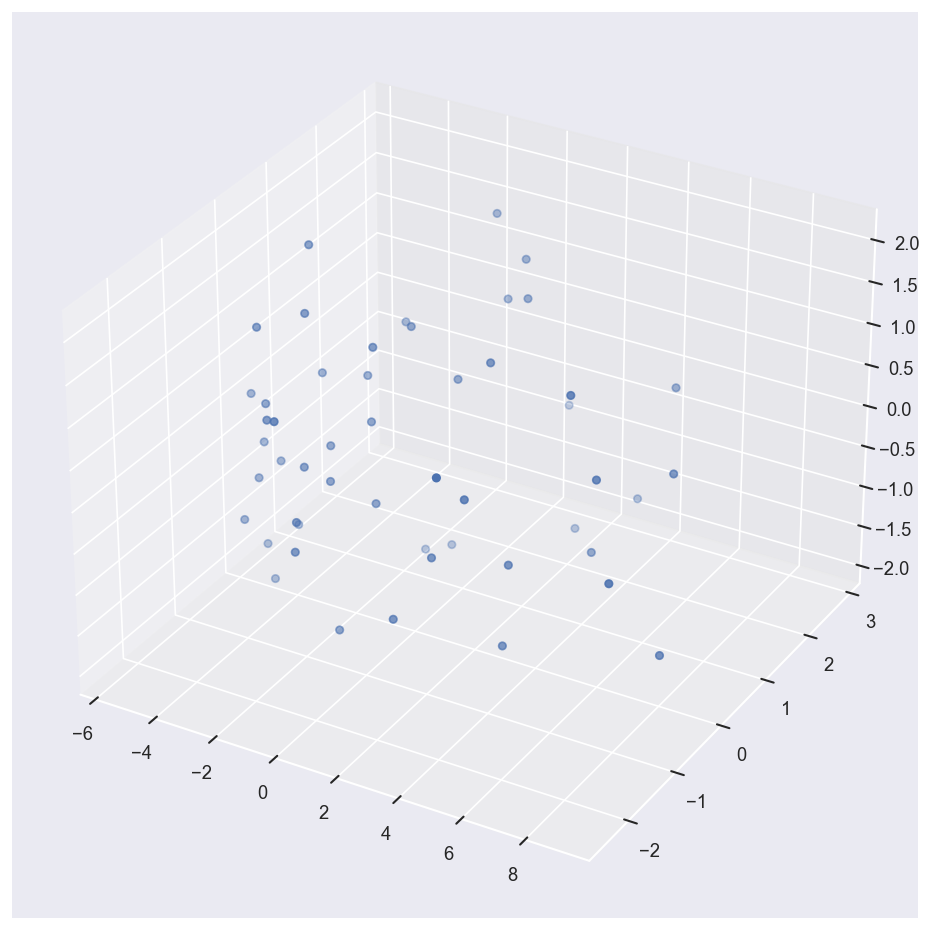

In [284]:
x=[]
y=[]
z=[]
for i in range(len(pca_comp)):
    x.append(pca_comp[i][0])
    y.append(pca_comp[i][1])
    z.append(pca_comp[i][2])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)

In [285]:
# Setting up our clustering data

X=df_prime[non_meta_factor_averages]
y=df_prime['Meta-Factor Total']

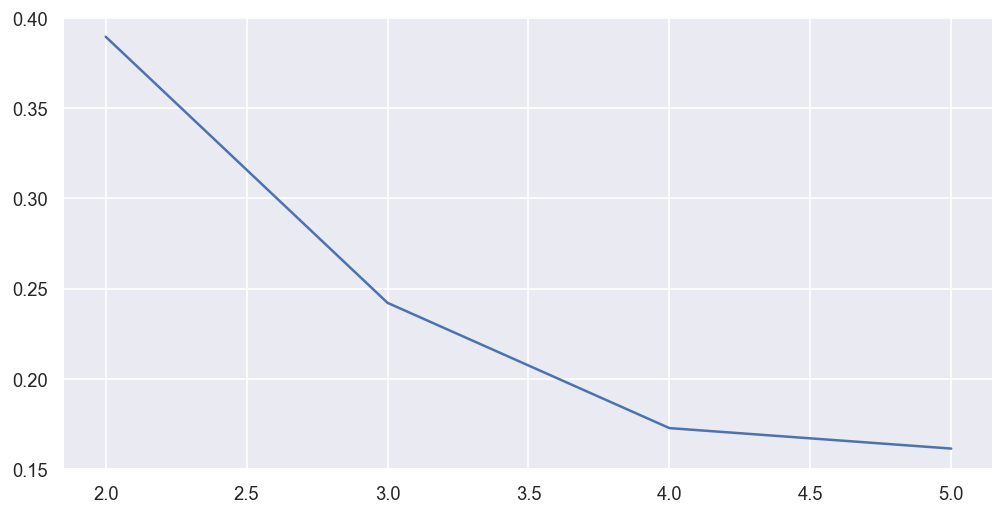

In [286]:
# Running Sil Scores

sil_scores=[]
K_vals=[2, 3, 4, 5]
for K in K_vals:
    kmeans=KMeans(n_clusters=K)
    kmeans.fit(X)
    sil_score=silhouette_score(X, kmeans.labels_)
    sil_scores.append(sil_score)
    
plt.plot(K_vals, sil_scores)

It seems as if two clusters is the best

In [287]:
# k-Means with k=2

K=2
kmeans=KMeans(n_clusters=K)
y_pred=kmeans.fit_predict(X)

for i in range(len(y)):
    print('Comp Meta Score:',list(y)[i], 'Group:', list(y_pred)[i])

Comp Meta Score: 4.2 Group: 1
Comp Meta Score: 4.0 Group: 1
Comp Meta Score: 2.6 Group: 0
Comp Meta Score: 4.4 Group: 1
Comp Meta Score: 2.4 Group: 0
Comp Meta Score: 5.0 Group: 1
Comp Meta Score: 4.2 Group: 1
Comp Meta Score: 4.0 Group: 1
Comp Meta Score: 4.6 Group: 1
Comp Meta Score: 3.6 Group: 1
Comp Meta Score: 5.0 Group: 1
Comp Meta Score: 3.0 Group: 0
Comp Meta Score: 4.6 Group: 1
Comp Meta Score: 5.0 Group: 1
Comp Meta Score: 3.3 Group: 1
Comp Meta Score: 3.2 Group: 1
Comp Meta Score: 4.9 Group: 1
Comp Meta Score: 4.7 Group: 1
Comp Meta Score: 3.2 Group: 0
Comp Meta Score: 3.6 Group: 1
Comp Meta Score: 3.1 Group: 0
Comp Meta Score: 2.4 Group: 0
Comp Meta Score: 4.6 Group: 1
Comp Meta Score: 4.5 Group: 1
Comp Meta Score: 4.0 Group: 0
Comp Meta Score: 3.6 Group: 0
Comp Meta Score: 3.1 Group: 0
Comp Meta Score: 4.5 Group: 1
Comp Meta Score: 3.1 Group: 1
Comp Meta Score: 4.2 Group: 1
Comp Meta Score: 4.8 Group: 1
Comp Meta Score: 3.5 Group: 1
Comp Meta Score: 3.4 Group: 0
Comp Meta 

It seems that group 1 is associated with higher Comp Meta scores. Let's recode the Comp Meta scores as high or low and then see how accurate these groups are.

In [288]:

labels=[]
for val in y:
    if val <= 3.5:
        labels.append(0) # Low group
    else:
        labels.append(1) # High group


correct=[]
for i in range(len(y)):
    if labels[i] == y_pred[i]:
        correct.append(1)
        
print('The percentage correct is:', 100*round(len(correct)/len(y),4))

The percentage correct is: 84.31


In [289]:
# Viewing the cluster means

print('Both Clusters:',kmeans.cluster_centers_,'\n')
print('First Cluster:', kmeans.cluster_centers_[0],'\n')
print('Second Cluster:', kmeans.cluster_centers_[1])

Both Clusters: [[2.44444444 2.25       2.30555556 3.31481481 2.77777778 2.22222222
  2.30555556 2.41666667 3.02777778 2.94444444 3.25       3.83333333
  3.5        3.16666667 2.16666667 2.91666667 2.80555556 3.11111111
  2.86111111 3.02777778 3.69444444 2.11111111 2.22222222]
 [4.10606061 4.03030303 4.37878788 4.17171717 4.46969697 4.25757576
  3.87878788 4.3030303  4.34848485 3.87878788 4.31818182 4.62121212
  4.81818182 4.33333333 3.53030303 4.24242424 4.24242424 4.24242424
  4.21212121 4.16666667 4.53030303 3.92424242 4.04545455]] 

First Cluster: [2.44444444 2.25       2.30555556 3.31481481 2.77777778 2.22222222
 2.30555556 2.41666667 3.02777778 2.94444444 3.25       3.83333333
 3.5        3.16666667 2.16666667 2.91666667 2.80555556 3.11111111
 2.86111111 3.02777778 3.69444444 2.11111111 2.22222222] 

Second Cluster: [4.10606061 4.03030303 4.37878788 4.17171717 4.46969697 4.25757576
 3.87878788 4.3030303  4.34848485 3.87878788 4.31818182 4.62121212
 4.81818182 4.33333333 3.53030303

In [290]:
# Viewing their relationship with the factors

for i in range(len(non_meta_factor_averages)):
    print(non_meta_factor_averages[i],round(kmeans.cluster_centers_[1][i],2))

Generativity: Average 4.11
Keeper of Meaning: Average 4.03
Ego Integrity: Average 4.38
Controllable Protective Factors: Only factor that goes up to 7: Average 4.17
Reliable Attachment Figure(s): Average 4.47
Healthy Grieving: Average 4.26
Sense of Humor: Average 3.88
Tragic Optimism (realistic but hopeful): Average 4.3
Mood: Average 4.35
Anxiety: Average 3.88
Energy: Average 4.32
Cognitive: Average 4.62
Engagement: Average 4.82
Candor: Average 4.33
Open System: Average 3.53
Narrative Coherence: Average 4.24
Transparency: Average 4.24
Youthfulness: Average 4.24
Control: Average 4.21
Competence: Average 4.17
Continuity: Average 4.53
Consciousness: Average 3.92
Connection: Average 4.05


In [291]:
# Top 3

ordered_cluster=list(kmeans.cluster_centers_[1].copy())
ordered_cluster.sort(reverse=True)


print('Top 3 Factors Most Indicative of a High Score for k-Means Clustering:')
for i in range(3):
    score=ordered_cluster[i]
    index=list(kmeans.cluster_centers_[1]).index(score)
    factor=non_meta_factor_averages[index]
    print(factor, round(score,2))

Top 3 Factors Most Indicative of a High Score for k-Means Clustering:
Engagement: Average 4.82
Cognitive: Average 4.62
Continuity: Average 4.53


Interestingly, none of these were identified by the Linear Regression as being important.

## Meta-Factors versus GCI

In [292]:
# Setting up our clustering data

X=df[meta_factors_avg]
y=df['GCI: Average']

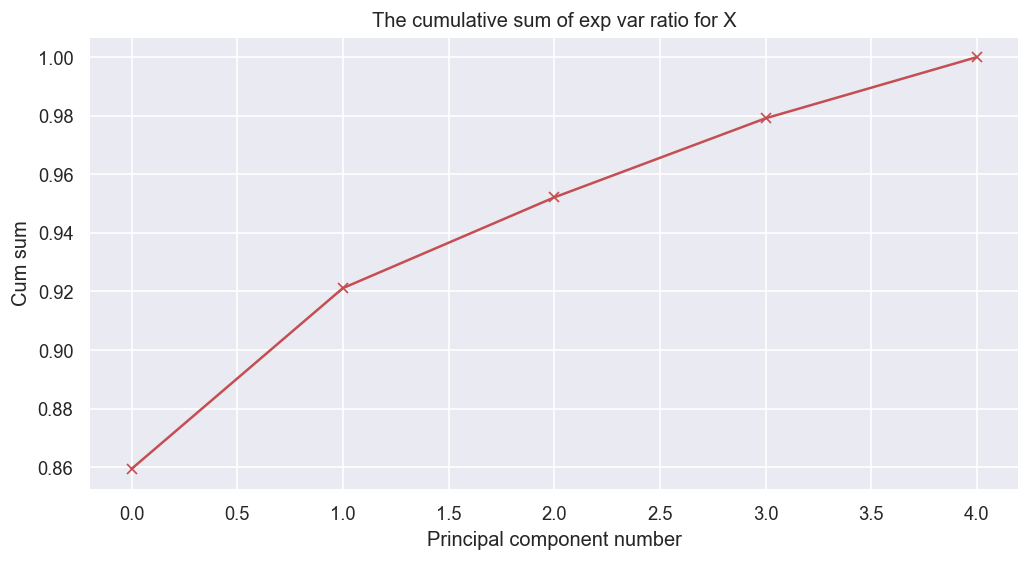

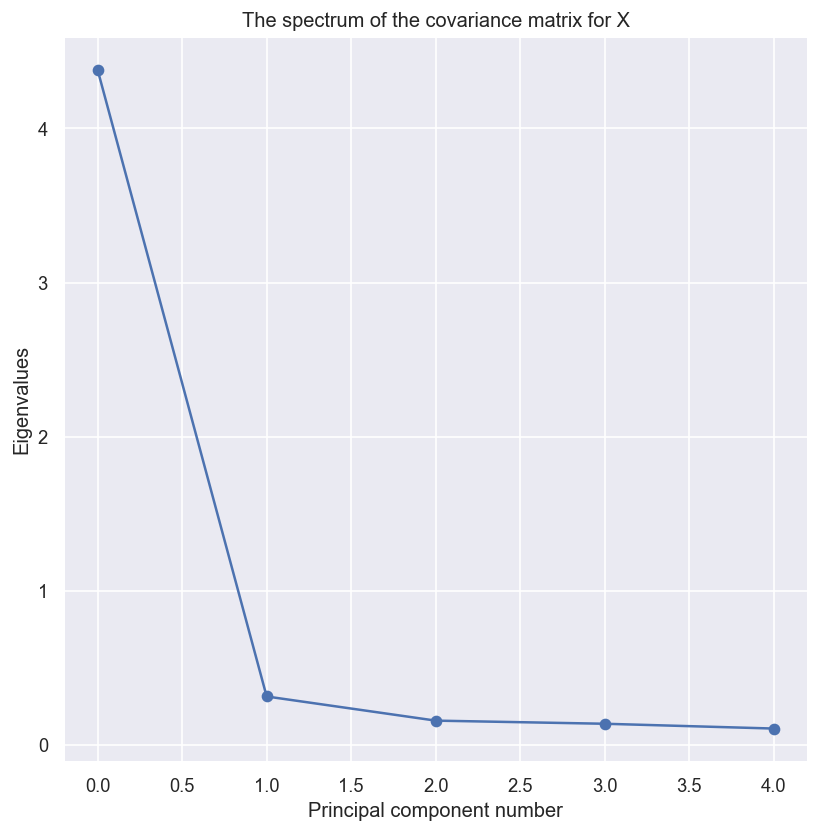

In [293]:
# PCA

# X=df[all_averages]
PCA_plotting(X)

In [294]:
pca_comp=pca_comps(X, 2)

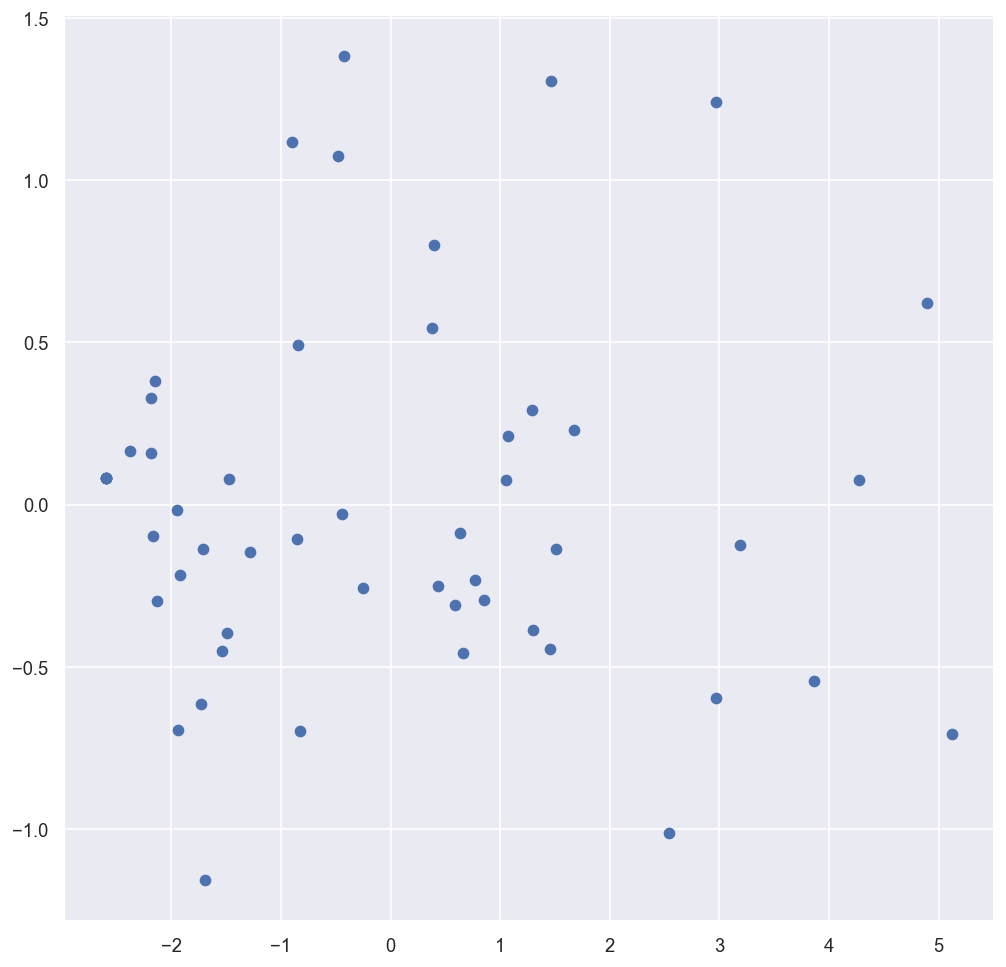

In [295]:
x=[]
y=[]
for i in range(len(pca_comp)):
    x.append(pca_comp[i][0])
    y.append(pca_comp[i][1])

fig = plt.figure(figsize=(10,10))
plt.scatter(x,y)

In [296]:
pca_comp=pca_comps(X, 3)

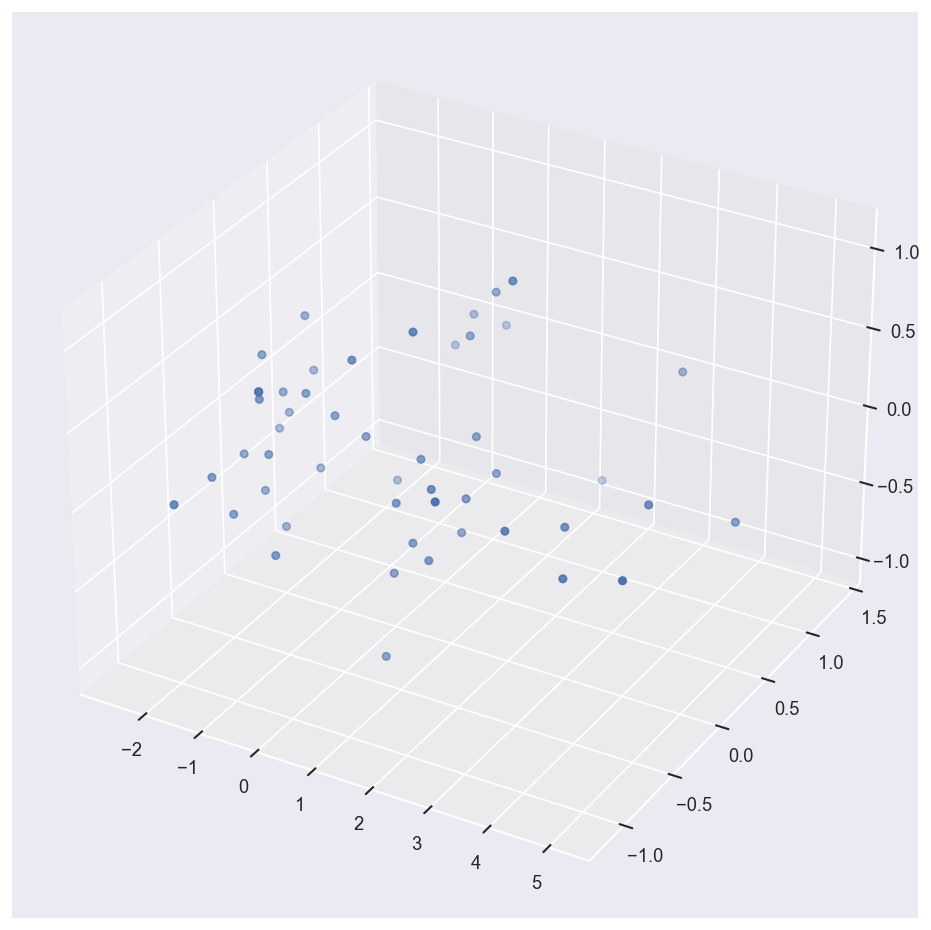

In [297]:
x=[]
y=[]
z=[]
for i in range(len(pca_comp)):
    x.append(pca_comp[i][0])
    y.append(pca_comp[i][1])
    z.append(pca_comp[i][2])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)

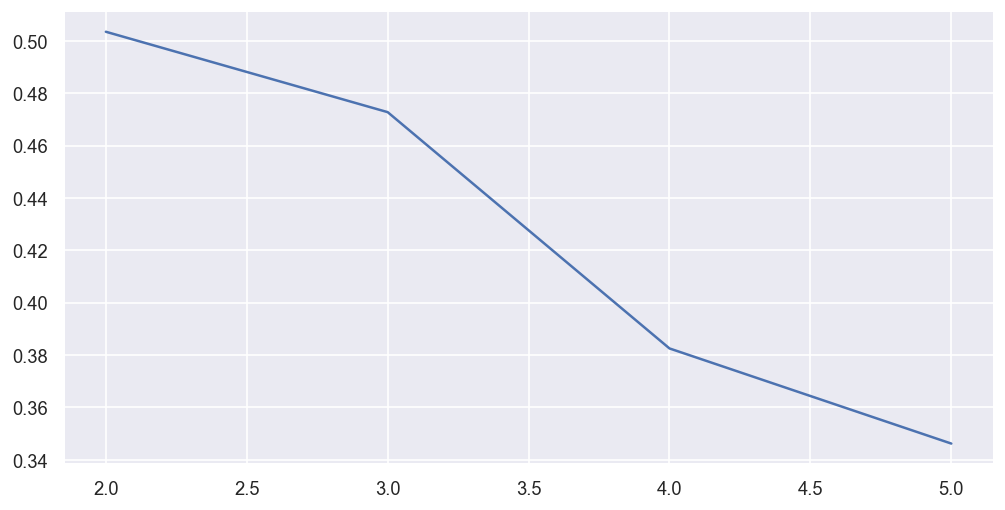

In [298]:
# Running Sil Scores

sil_scores=[]
K_vals=[2, 3, 4, 5]
for K in K_vals:
    kmeans=KMeans(n_clusters=K)
    kmeans.fit(X)
    sil_score=silhouette_score(X, kmeans.labels_)
    sil_scores.append(sil_score)
    
plt.plot(K_vals, sil_scores)

It seems as if two clusters is the best

In [299]:
# Setting up our clustering data

X=df[meta_factors_avg]
y=df['GCI: Average']

In [300]:
# k-Means with k=2

K=2
kmeans=KMeans(n_clusters=K)
y_pred=kmeans.fit_predict(X)

for i in range(len(y)):
    print('GCI Score',y[i], 'Group:', y_pred[i])

GCI Score 4.0 Group: 1
GCI Score 4.0 Group: 1
GCI Score 3.0 Group: 0
GCI Score 4.5 Group: 1
GCI Score 2.0 Group: 0
GCI Score 5.0 Group: 1
GCI Score 4.0 Group: 1
GCI Score 4.0 Group: 1
GCI Score 5.0 Group: 1
GCI Score 4.0 Group: 0
GCI Score 5.0 Group: 1
GCI Score 3.0 Group: 0
GCI Score 5.0 Group: 1
GCI Score 5.0 Group: 1
GCI Score 3.0 Group: 0
GCI Score 2.5 Group: 0
GCI Score 4.5 Group: 1
GCI Score 5.0 Group: 1
GCI Score 2.0 Group: 0
GCI Score 4.0 Group: 0
GCI Score 3.0 Group: 0
GCI Score 2.0 Group: 0
GCI Score 4.0 Group: 1
GCI Score 4.5 Group: 1
GCI Score 2.5 Group: 1
GCI Score 3.0 Group: 0
GCI Score 3.0 Group: 0
GCI Score 3.5 Group: 1
GCI Score 4.0 Group: 0
GCI Score 3.5 Group: 1
GCI Score 5.0 Group: 1
GCI Score 4.0 Group: 0
GCI Score 3.0 Group: 0
GCI Score 5.0 Group: 1
GCI Score 4.0 Group: 1
GCI Score 5.0 Group: 1
GCI Score 1.0 Group: 0
GCI Score 1.5 Group: 0
GCI Score 4.5 Group: 1
GCI Score 3.0 Group: 0
GCI Score 2.0 Group: 0
GCI Score 1.5 Group: 0
GCI Score 4.0 Group: 1
GCI Score 1

It seems that group 1 is associated with higher GCI scores. Let's recode the GCI scores as high or low and then see how accurate these groups are. We find that 3.5 as the cutoff gives us the highest accuracy.

In [301]:

labels=[]
for val in y:
    if val <= 3.5:
        labels.append(0) # Low group
    else:
        labels.append(1) # High group


correct=[]
for i in range(len(y)):
    if labels[i] == y_pred[i]:
        correct.append(1)
        
print('The percentage correct is:', 100*round(len(correct)/len(y),4))

The percentage correct is: 86.53999999999999


In [302]:
# Viewing the cluster means

print('Both Clusters:',kmeans.cluster_centers_,'\n')
print('First Cluster:', kmeans.cluster_centers_[0],'\n')
print('Second Cluster:', kmeans.cluster_centers_[1])

Both Clusters: [[2.8125     3.0625     2.72916667 3.02083333 2.91666667]
 [4.76785714 4.46428571 4.46428571 4.57142857 4.48214286]] 

First Cluster: [2.8125     3.0625     2.72916667 3.02083333 2.91666667] 

Second Cluster: [4.76785714 4.46428571 4.46428571 4.57142857 4.48214286]


In [303]:
# Viewing their relationship with the factors

for i in range(len(meta_factors_avg)):
    print(meta_factors_avg[i],round(kmeans.cluster_centers_[1][i],2))

Gratitude: Average 4.77
Active Habits: Physical, Mental, Social: Average 4.46
Purpose, Meaning: Average 4.46
Resilience (including post-traumatic growth): Average 4.57
Self-Acceptance, Self-Esteem: Average 4.48


In [304]:
# Top 3

ordered_cluster=list(kmeans.cluster_centers_[0].copy())
ordered_cluster.sort(reverse=True)


print('Top 3 Factors Most Indicative of a High Score for k-Means Clustering:')
for i in range(3):
    score=ordered_cluster[i]
    index=list(kmeans.cluster_centers_[0]).index(score)
    factor=meta_factors_avg[index]
    print(factor, round(score,2))

Top 3 Factors Most Indicative of a High Score for k-Means Clustering:
Active Habits: Physical, Mental, Social: Average 3.06
Resilience (including post-traumatic growth): Average 3.02
Self-Acceptance, Self-Esteem: Average 2.92


All of these were identified as the most important in the Linear Regression.

## Elder Identity Revision versus GCI

In [305]:
# Removing the cases from the Linear Regression

df_prime=df.copy()
df_prime=df_prime.drop(labels=42)
df_prime

Case Number  Dem: Age Dem: Gender Dem: Marital Status Dem: Ethnicity  \
0             1  4.407407           M                   W              W   
1             2  2.481481           F                   W              W   
2             3  4.111111           M                   W              W   
3             4  3.074074           M                   M              W   
4             5  2.481481           M                   M              W   
5             6  1.592593           F                   W              W   
6             7  1.592593           M                   M              W   
7             8  1.888889           F                   W              W   
8             9  5.000000           F                   W              W   
9            10  2.925926           M                   M              W   
10           11  4.407407           M                   M              W   
11           12  3.370370           M                   D              W   
12           13  2.333333           F                   W              W   
13           14  2.481481           M                   M              W   
14           15  3.222222           M                   W              W   
15           16  1.296296           M                   M              W   
16           17  3.370370           F                   M              W   
17           18  1.444444           F                   M              W   
18           19  1.740741           F                   M              W   
19           20  4.703704           M                   M              W   
20           21  1.888889           M                   M              W   
21           22  1.296296           M                   D              W   
22           23  3.074074           M                   M              W   
23           24  1.888889           M                   M              W   
24           25  2.481481           F                   M              W   
25           26  2.629630           M                   M              W   
26           27  1.296296           F                   M              W   
27           28  3.074074           M                   M              L   
28           29  2.777778           F                   W              W   
29           30  3.222222           F                   D              W   
30           31  1.740741           M                   M              B   
31           32  2.333333           F                   D              B   
32           33  3.074074           M                   M              B   
33           34  1.740741           F                   D           H-NA   
34           35  1.888889           F                   S              B   
35           36  1.888889           M                   M              B   
36           37  1.740741           M                   D              W   
37           38  2.777778           M                   D              W   
38           39  4.703704           F                   W              W   
39           40  4.703704           F                   W              W   
40           41  4.259259           F                   S              W   
41           42  2.925926           F                   D              W   
43           44  2.037037           F                   D              W   
44           45  4.259259           F                   W              B   
45           46  2.333333           M                   W              W   
46           47  1.000000           F                   D              W   
47           48  2.629630           M                   D              W   
48           49  1.888889           M                   M              L   
49           50  2.037037           F                   M              L   
50           51  2.333333           F                   M              A   
51           52  2.629630           M                   M         W-Arab   

   Dem: Socio-Economic Staus Dem: Residential Statu

In [306]:
# Setting up our clustering data

X=df_prime[eir_avg]
y=df_prime['GCI: Average']

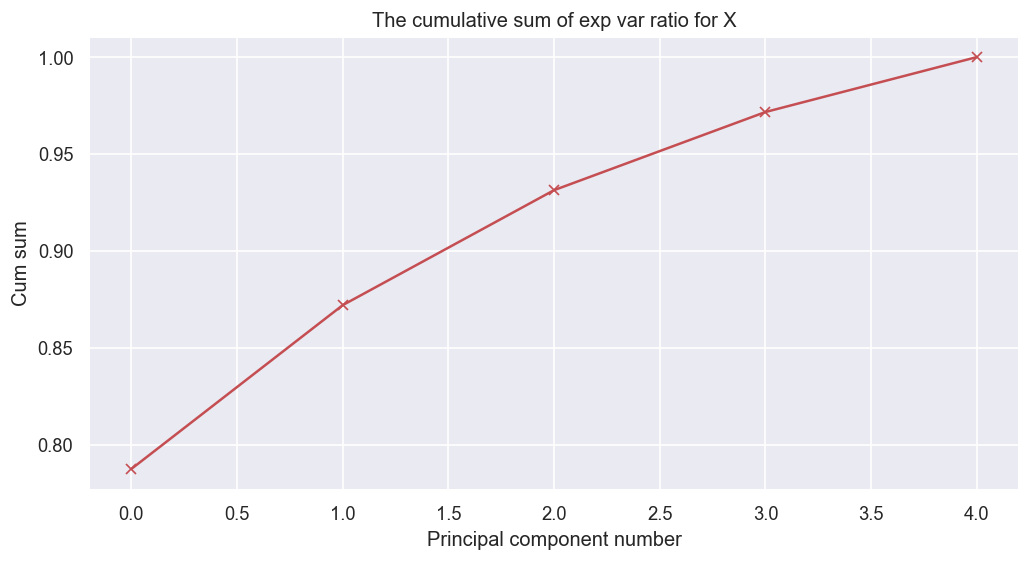

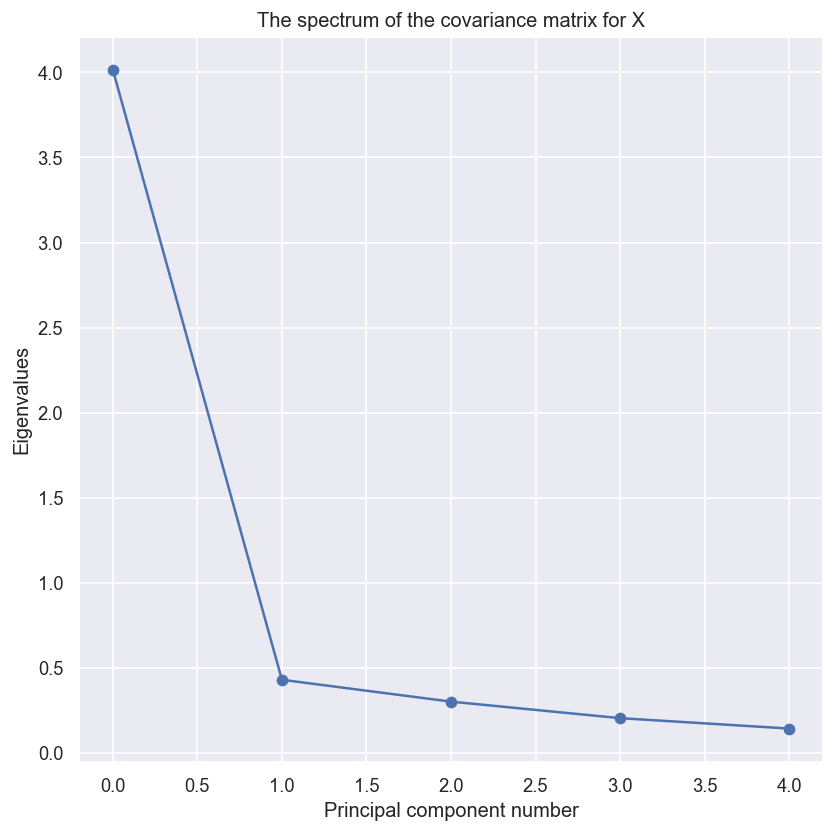

In [307]:
# PCA

# X=df[all_averages]
PCA_plotting(X)

In [308]:
pca_comp=pca_comps(X, 2)

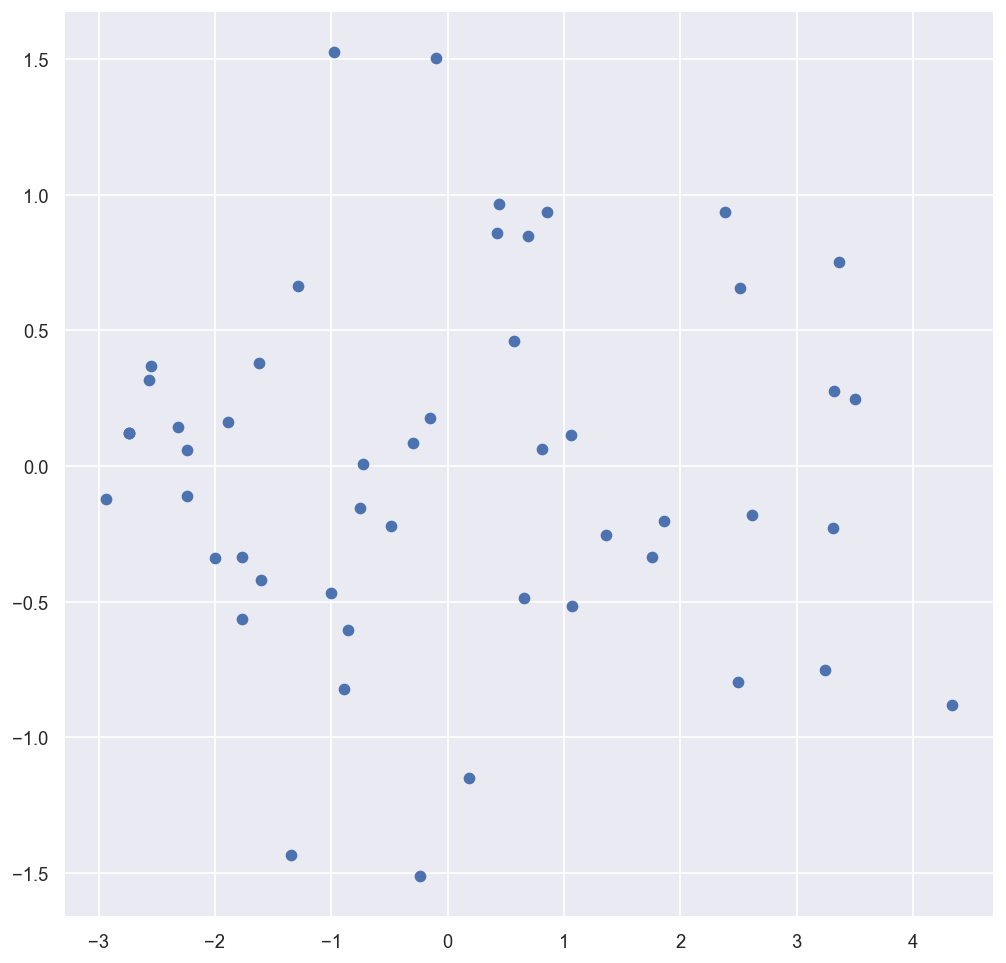

In [309]:
x=[]
y=[]
for i in range(len(pca_comp)):
    x.append(pca_comp[i][0])
    y.append(pca_comp[i][1])

fig = plt.figure(figsize=(10,10))
plt.scatter(x,y)

In [310]:
pca_comp=pca_comps(X, 3)

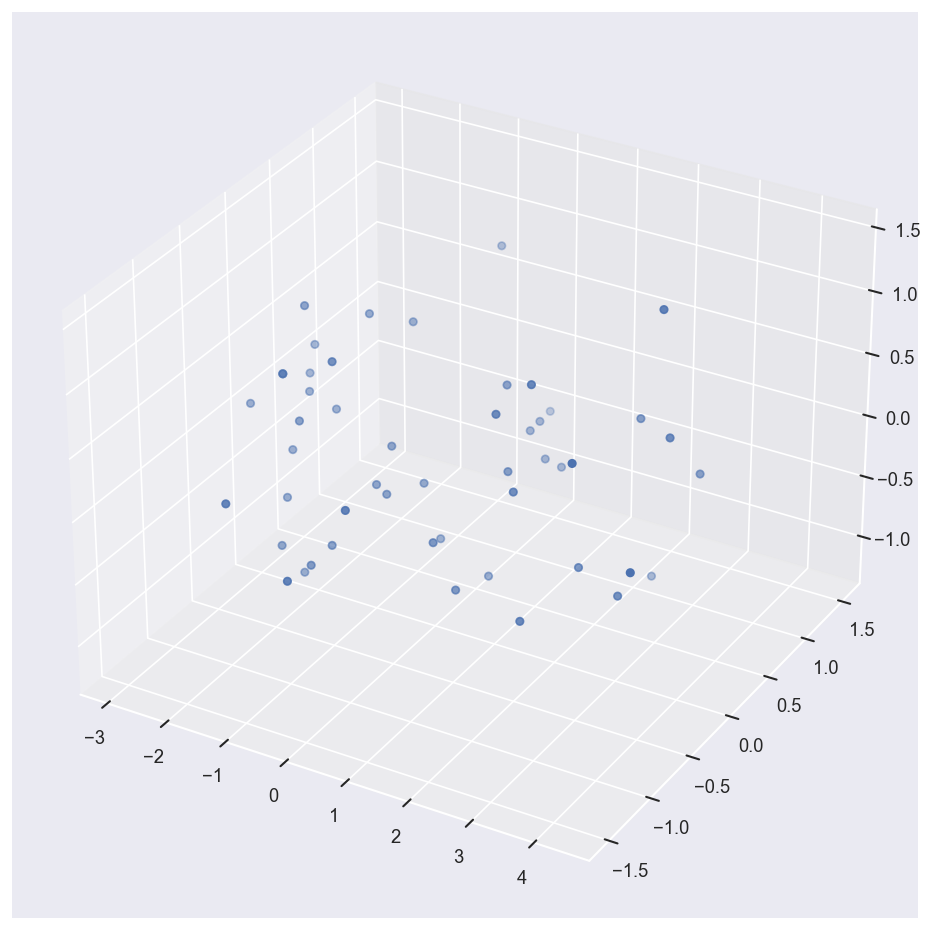

In [311]:
x=[]
y=[]
z=[]
for i in range(len(pca_comp)):
    x.append(pca_comp[i][0])
    y.append(pca_comp[i][1])
    z.append(pca_comp[i][2])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)

In [312]:
# Setting up our clustering data

X=df_prime[eir_avg]
y=df_prime['GCI: Average']

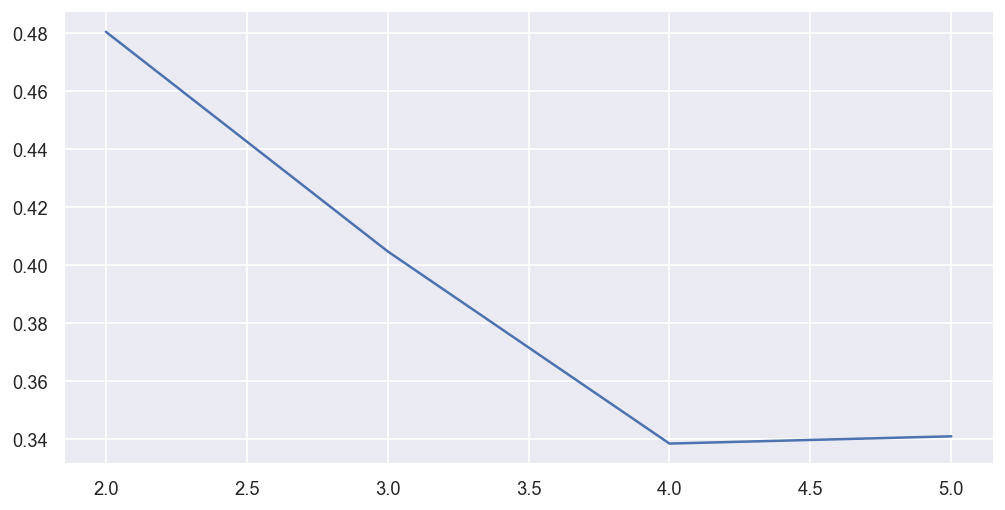

In [313]:
# Running Sil Scores

sil_scores=[]
K_vals=[2, 3, 4, 5]
for K in K_vals:
    kmeans=KMeans(n_clusters=K)
    kmeans.fit(X)
    sil_score=silhouette_score(X, kmeans.labels_)
    sil_scores.append(sil_score)
    
plt.plot(K_vals, sil_scores)

It seems as if two clusters is the best

In [314]:
# k-Means with k=2

K=2
kmeans=KMeans(n_clusters=K)
y_pred=kmeans.fit_predict(X)

for i in range(len(y)):
    print('GCI Score',list(y)[i], 'Group:', list(y_pred)[i])

GCI Score 4.0 Group: 0
GCI Score 4.0 Group: 0
GCI Score 3.0 Group: 1
GCI Score 4.5 Group: 0
GCI Score 2.0 Group: 1
GCI Score 5.0 Group: 0
GCI Score 4.0 Group: 0
GCI Score 4.0 Group: 1
GCI Score 5.0 Group: 0
GCI Score 4.0 Group: 0
GCI Score 5.0 Group: 0
GCI Score 3.0 Group: 1
GCI Score 5.0 Group: 0
GCI Score 5.0 Group: 0
GCI Score 3.0 Group: 0
GCI Score 2.5 Group: 0
GCI Score 4.5 Group: 0
GCI Score 5.0 Group: 0
GCI Score 2.0 Group: 1
GCI Score 4.0 Group: 0
GCI Score 3.0 Group: 1
GCI Score 2.0 Group: 1
GCI Score 4.0 Group: 1
GCI Score 4.5 Group: 0
GCI Score 2.5 Group: 1
GCI Score 3.0 Group: 1
GCI Score 3.0 Group: 0
GCI Score 3.5 Group: 1
GCI Score 4.0 Group: 0
GCI Score 3.5 Group: 0
GCI Score 5.0 Group: 0
GCI Score 4.0 Group: 0
GCI Score 3.0 Group: 1
GCI Score 5.0 Group: 0
GCI Score 4.0 Group: 1
GCI Score 5.0 Group: 0
GCI Score 1.0 Group: 1
GCI Score 1.5 Group: 1
GCI Score 4.5 Group: 1
GCI Score 3.0 Group: 1
GCI Score 2.0 Group: 1
GCI Score 1.5 Group: 1
GCI Score 1.5 Group: 1
GCI Score 4

It seems that group 0 is associated with higher GCI scores. Let's recode the GCI scores as high or low and then see how accurate these groups are. We find that 3.5 as the cutoff gives us the highest accuracy.

In [315]:

labels=[]
for val in y:
    if val <= 3.5:
        labels.append(1) # Low group
    else:
        labels.append(0) # High group


correct=[]
for i in range(len(y)):
    if labels[i] == y_pred[i]:
        correct.append(1)
        
print('The percentage correct is:', 100*round(len(correct)/len(y),4))

The percentage correct is: 84.31


In [316]:
# Viewing the cluster means

print('Both Clusters:',kmeans.cluster_centers_,'\n')
print('First Cluster:', kmeans.cluster_centers_[0],'\n')
print('Second Cluster:', kmeans.cluster_centers_[1])

Both Clusters: [[4.35714286 4.33928571 4.625      4.16071429 4.35714286]
 [2.95652174 3.02173913 3.73913043 2.19565217 2.23913043]] 

First Cluster: [4.35714286 4.33928571 4.625      4.16071429 4.35714286] 

Second Cluster: [2.95652174 3.02173913 3.73913043 2.19565217 2.23913043]


In [317]:
# Viewing their relationship with the factors

for i in range(len(eir_avg)):
    print(eir_avg[i],round(kmeans.cluster_centers_[0][i],2))

Control: Average 4.36
Competence: Average 4.34
Continuity: Average 4.62
Consciousness: Average 4.16
Connection: Average 4.36


In [318]:
# Top 3

ordered_cluster=list(kmeans.cluster_centers_[0].copy())
ordered_cluster.sort(reverse=True)


print('Top 3 Factors Most Indicative of a High Score for k-Means Clustering:')
for i in range(3):
    score=ordered_cluster[i]
    index=list(kmeans.cluster_centers_[0]).index(score)
    factor=eir_avg[index]
    print(factor, round(score,2))

Top 3 Factors Most Indicative of a High Score for k-Means Clustering:
Continuity: Average 4.62
Control: Average 4.36
Control: Average 4.36


Both Control and Connection show up here and in the Linear Regression.

Because Control and Connection have the same score, they top three are actually Continuity, Control, and Connection.

## Elder Developmental Tasks versus GCI

In [319]:
# Setting up our clustering data

X=df[elder_dev_tasks_avg]
y=df['GCI: Average']

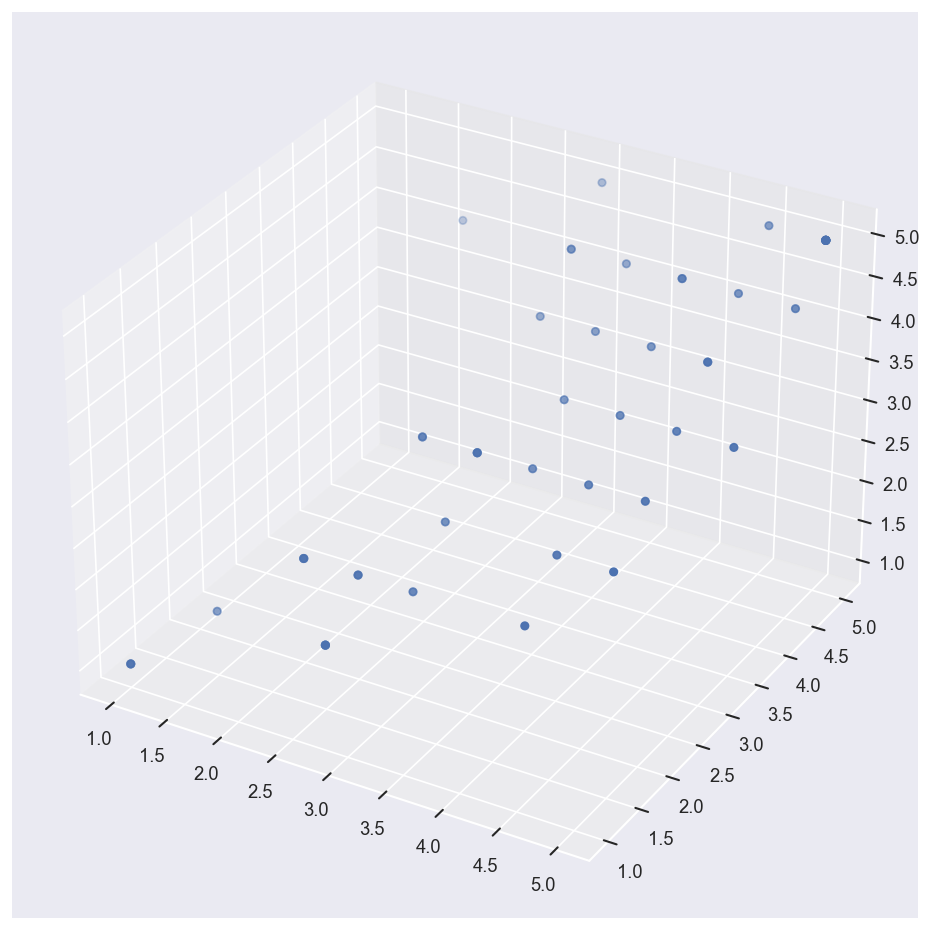

In [320]:
x=[df[elder_dev_tasks_avg[0]]]
y=[df[elder_dev_tasks_avg[1]]]
z=[df[elder_dev_tasks_avg[1]]]


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)

In [321]:
# Setting up our clustering data

X=df[elder_dev_tasks_avg]
y=df['GCI: Average']

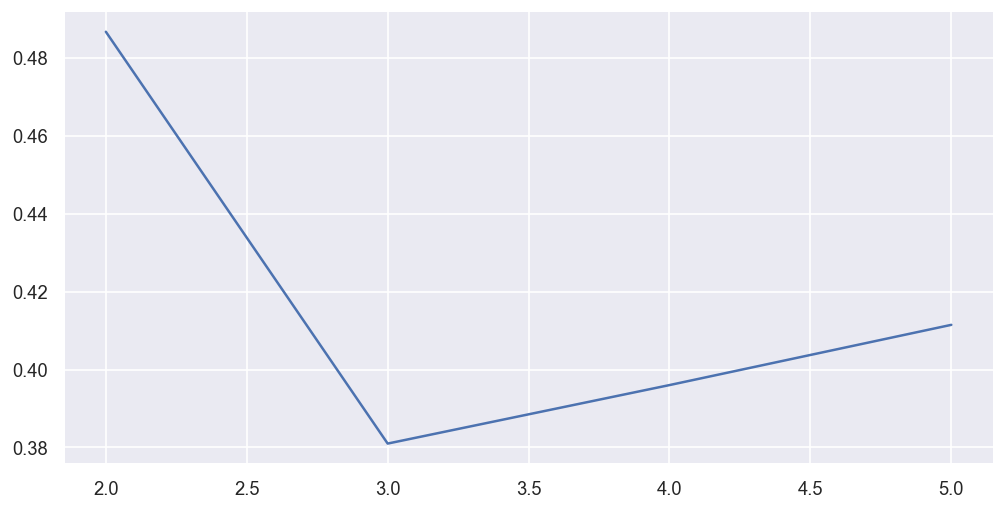

In [322]:
# Running Sil Scores

sil_scores=[]
K_vals=[2, 3, 4, 5]
for K in K_vals:
    kmeans=KMeans(n_clusters=K)
    kmeans.fit(X)
    sil_score=silhouette_score(X, kmeans.labels_)
    sil_scores.append(sil_score)
    
plt.plot(K_vals, sil_scores)

It seems as if two clusters is the best

In [323]:
# k-Means with k=2

K=2
kmeans=KMeans(n_clusters=K)
y_pred=kmeans.fit_predict(X)

for i in range(len(y)):
    print('GCI Score', y[i], 'Group:', y_pred[i])

GCI Score 4.0 Group: 0
GCI Score 4.0 Group: 0
GCI Score 3.0 Group: 1
GCI Score 4.5 Group: 0
GCI Score 2.0 Group: 1
GCI Score 5.0 Group: 0
GCI Score 4.0 Group: 0
GCI Score 4.0 Group: 0
GCI Score 5.0 Group: 0
GCI Score 4.0 Group: 0
GCI Score 5.0 Group: 0
GCI Score 3.0 Group: 1
GCI Score 5.0 Group: 0
GCI Score 5.0 Group: 0
GCI Score 3.0 Group: 0
GCI Score 2.5 Group: 1
GCI Score 4.5 Group: 0
GCI Score 5.0 Group: 0
GCI Score 2.0 Group: 1
GCI Score 4.0 Group: 0
GCI Score 3.0 Group: 1
GCI Score 2.0 Group: 1
GCI Score 4.0 Group: 0
GCI Score 4.5 Group: 0
GCI Score 2.5 Group: 1
GCI Score 3.0 Group: 1
GCI Score 3.0 Group: 1
GCI Score 3.5 Group: 0
GCI Score 4.0 Group: 0
GCI Score 3.5 Group: 0
GCI Score 5.0 Group: 0
GCI Score 4.0 Group: 0
GCI Score 3.0 Group: 0
GCI Score 5.0 Group: 0
GCI Score 4.0 Group: 0
GCI Score 5.0 Group: 0
GCI Score 1.0 Group: 1
GCI Score 1.5 Group: 1
GCI Score 4.5 Group: 0
GCI Score 3.0 Group: 1
GCI Score 2.0 Group: 1
GCI Score 1.5 Group: 1
GCI Score 4.0 Group: 0
GCI Score 1

It seems that group 0 is associated with higher GCI scores. Let's recode the GCI scores as high or low and then see how accurate these groups are. We find that 3 or 3.5 as the cutoff gives us the highest accuracy.

In [324]:

labels=[]
for val in y:
    if val <= 3:
        labels.append(1) # Low group
    else:
        labels.append(0) # High group


correct=[]
for i in range(len(y)):
    if labels[i] == y_pred[i]:
        correct.append(1)
        
print('The percentage correct is:', 100*round(len(correct)/len(y),4))

The percentage correct is: 92.31


In [325]:
# Viewing the cluster means

print('Both Clusters:',kmeans.cluster_centers_,'\n')
print('First Cluster:', kmeans.cluster_centers_[0],'\n')
print('Second Cluster:', kmeans.cluster_centers_[1])

Both Clusters: [[4.13636364 4.07575758 4.39393939]
 [2.31578947 2.10526316 2.23684211]] 

First Cluster: [4.13636364 4.07575758 4.39393939] 

Second Cluster: [2.31578947 2.10526316 2.23684211]


In [326]:
# Viewing their relationship with the factors

for i in range(len(elder_dev_tasks_avg)):
    print(elder_dev_tasks_avg[i],round(kmeans.cluster_centers_[0][i],2))

Generativity: Average 4.14
Keeper of Meaning: Average 4.08
Ego Integrity: Average 4.39


In [327]:
# Top 3

ordered_cluster=list(kmeans.cluster_centers_[0].copy())
ordered_cluster.sort(reverse=True)


print('Top 2 Factors Most Indicative of a High Score for k-Means Clustering:')
for i in range(2):
    score=ordered_cluster[i]
    index=list(kmeans.cluster_centers_[0]).index(score)
    factor=elder_dev_tasks_avg[index]
    print(factor, round(score,2))

Top 2 Factors Most Indicative of a High Score for k-Means Clustering:
Ego Integrity: Average 4.39
Generativity: Average 4.14


These are the same factors and in the same order of importance as identified by the Linear Regression.

## Elder Identity Revision versus Comp Meta Score

In [328]:
# Removing the same outliers as in Linear Regression

df_prime=df.copy()
df_prime=df_prime.drop(labels=37)
df_prime=df_prime.drop(labels=42)
df_prime

Case Number  Dem: Age Dem: Gender Dem: Marital Status Dem: Ethnicity  \
0             1  4.407407           M                   W              W   
1             2  2.481481           F                   W              W   
2             3  4.111111           M                   W              W   
3             4  3.074074           M                   M              W   
4             5  2.481481           M                   M              W   
5             6  1.592593           F                   W              W   
6             7  1.592593           M                   M              W   
7             8  1.888889           F                   W              W   
8             9  5.000000           F                   W              W   
9            10  2.925926           M                   M              W   
10           11  4.407407           M                   M              W   
11           12  3.370370           M                   D              W   
12           13  2.333333           F                   W              W   
13           14  2.481481           M                   M              W   
14           15  3.222222           M                   W              W   
15           16  1.296296           M                   M              W   
16           17  3.370370           F                   M              W   
17           18  1.444444           F                   M              W   
18           19  1.740741           F                   M              W   
19           20  4.703704           M                   M              W   
20           21  1.888889           M                   M              W   
21           22  1.296296           M                   D              W   
22           23  3.074074           M                   M              W   
23           24  1.888889           M                   M              W   
24           25  2.481481           F                   M              W   
25           26  2.629630           M                   M              W   
26           27  1.296296           F                   M              W   
27           28  3.074074           M                   M              L   
28           29  2.777778           F                   W              W   
29           30  3.222222           F                   D              W   
30           31  1.740741           M                   M              B   
31           32  2.333333           F                   D              B   
32           33  3.074074           M                   M              B   
33           34  1.740741           F                   D           H-NA   
34           35  1.888889           F                   S              B   
35           36  1.888889           M                   M              B   
36           37  1.740741           M                   D              W   
38           39  4.703704           F                   W              W   
39           40  4.703704           F                   W              W   
40           41  4.259259           F                   S              W   
41           42  2.925926           F                   D              W   
43           44  2.037037           F                   D              W   
44           45  4.259259           F                   W              B   
45           46  2.333333           M                   W              W   
46           47  1.000000           F                   D              W   
47           48  2.629630           M                   D              W   
48           49  1.888889           M                   M              L   
49           50  2.037037           F                   M              L   
50           51  2.333333           F                   M              A   
51           52  2.629630           M                   M         W-Arab   

   Dem: Socio-Economic Staus Dem: Residential Status  \
0                          U                       H   
1              

In [329]:
# Setting up our clustering data

X=df_prime[eir_avg]
y=df_prime['Meta-Factor Total']

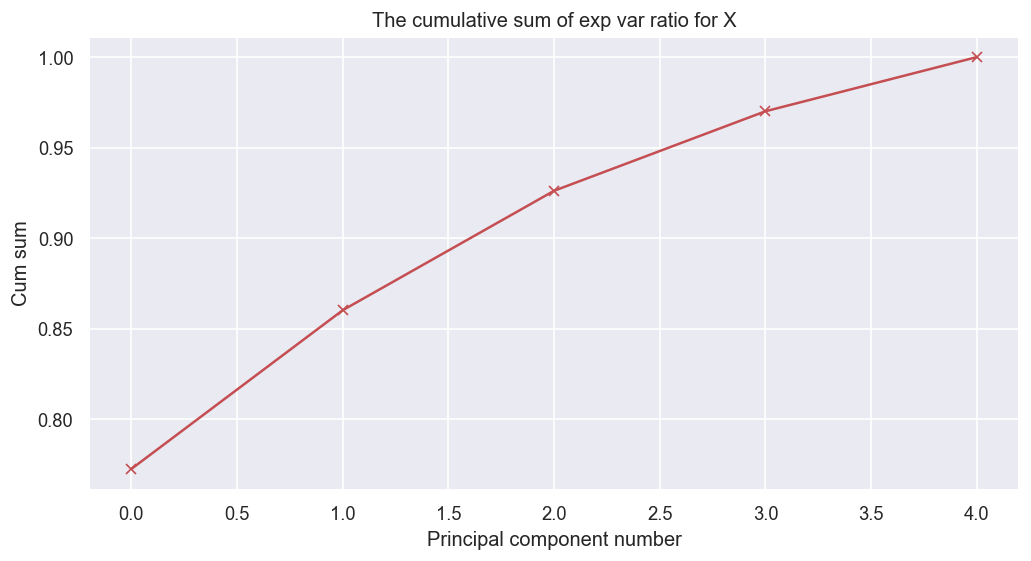

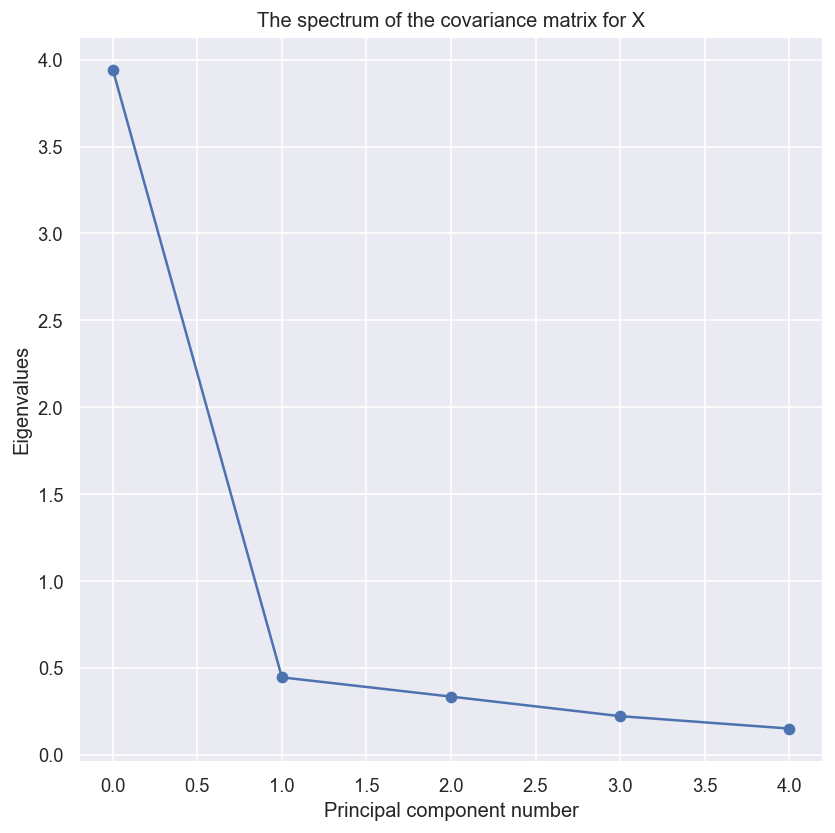

In [330]:
# PCA

# X=df[all_averages]
PCA_plotting(X)

In [331]:
pca_comp=pca_comps(X, 2)

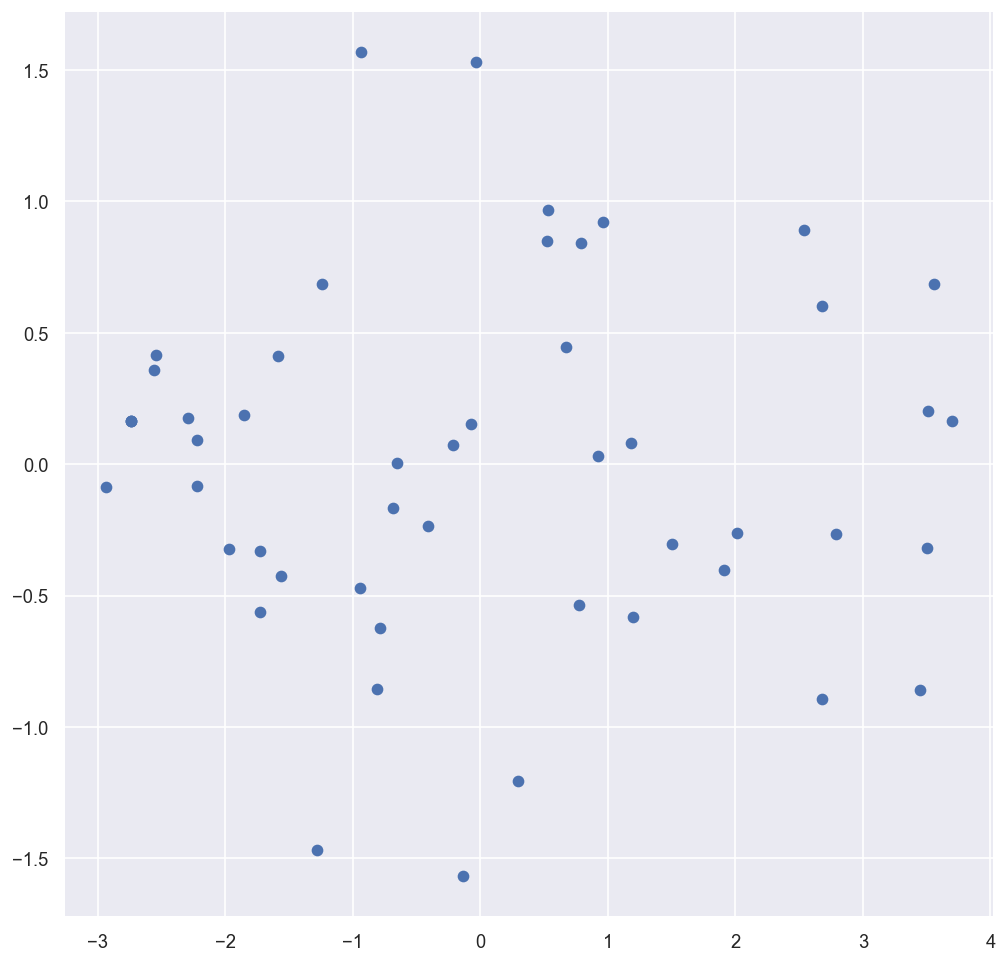

In [332]:
x=[]
y=[]
for i in range(len(pca_comp)):
    x.append(pca_comp[i][0])
    y.append(pca_comp[i][1])

fig = plt.figure(figsize=(10,10))
plt.scatter(x,y)

In [333]:
pca_comp=pca_comps(X, 3)

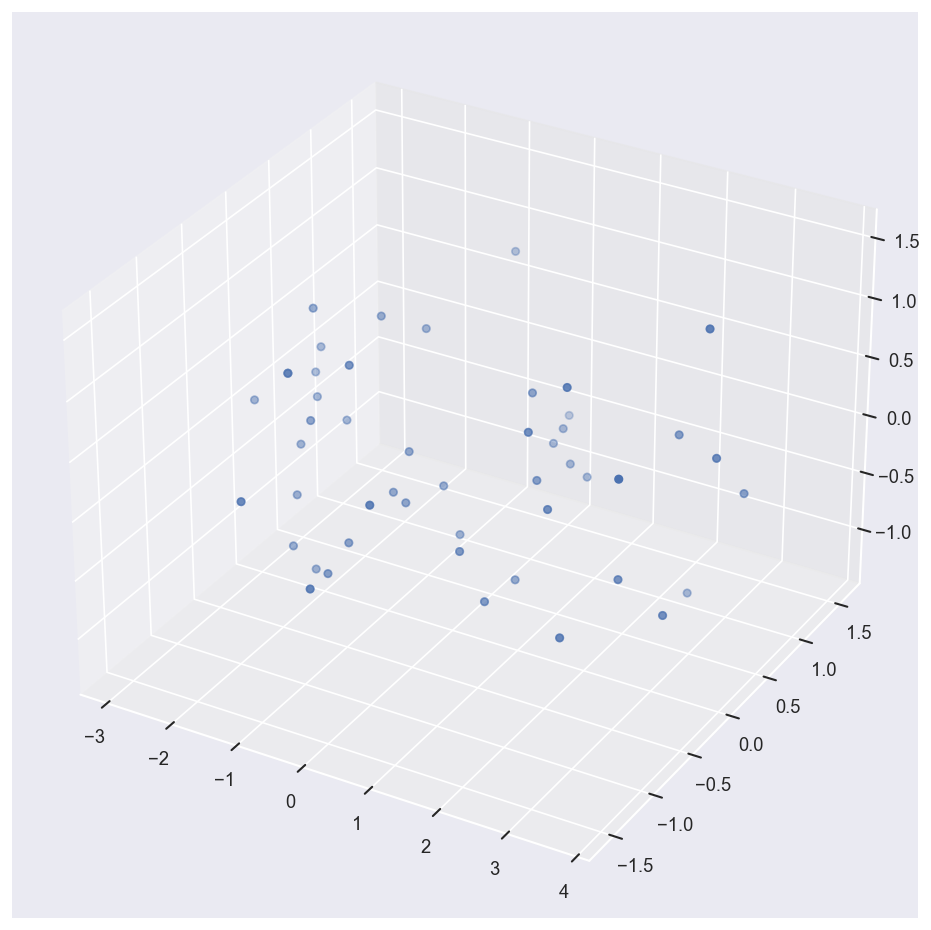

In [334]:
x=[]
y=[]
z=[]
for i in range(len(pca_comp)):
    x.append(pca_comp[i][0])
    y.append(pca_comp[i][1])
    z.append(pca_comp[i][2])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)

In [335]:
# Setting up our clustering data

X=df_prime[eir_avg]
y=df_prime['Meta-Factor Total']

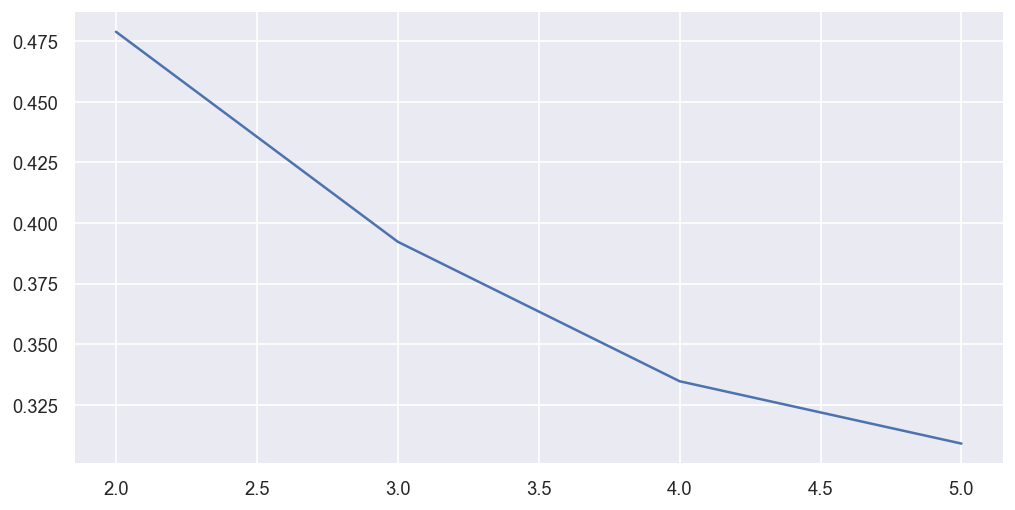

In [336]:
# Running Sil Scores

sil_scores=[]
K_vals=[2, 3, 4, 5]
for K in K_vals:
    kmeans=KMeans(n_clusters=K)
    kmeans.fit(X)
    sil_score=silhouette_score(X, kmeans.labels_)
    sil_scores.append(sil_score)
    
plt.plot(K_vals, sil_scores)

It seems as if two clusters is the best

In [337]:
# k-Means with k=2

K=2
kmeans=KMeans(n_clusters=K)
y_pred=kmeans.fit_predict(X)

for i in range(len(y)):
    print('Meta-Factor Total',list(y)[i], 'Group:', list(y_pred)[i])

Meta-Factor Total 4.2 Group: 0
Meta-Factor Total 4.0 Group: 0
Meta-Factor Total 2.6 Group: 1
Meta-Factor Total 4.4 Group: 0
Meta-Factor Total 2.4 Group: 1
Meta-Factor Total 5.0 Group: 0
Meta-Factor Total 4.2 Group: 0
Meta-Factor Total 4.0 Group: 1
Meta-Factor Total 4.6 Group: 0
Meta-Factor Total 3.6 Group: 0
Meta-Factor Total 5.0 Group: 0
Meta-Factor Total 3.0 Group: 1
Meta-Factor Total 4.6 Group: 0
Meta-Factor Total 5.0 Group: 0
Meta-Factor Total 3.3 Group: 0
Meta-Factor Total 3.2 Group: 1
Meta-Factor Total 4.9 Group: 0
Meta-Factor Total 4.7 Group: 0
Meta-Factor Total 3.2 Group: 1
Meta-Factor Total 3.6 Group: 0
Meta-Factor Total 3.1 Group: 1
Meta-Factor Total 2.4 Group: 1
Meta-Factor Total 4.6 Group: 1
Meta-Factor Total 4.5 Group: 0
Meta-Factor Total 4.0 Group: 1
Meta-Factor Total 3.6 Group: 1
Meta-Factor Total 3.1 Group: 0
Meta-Factor Total 4.5 Group: 1
Meta-Factor Total 3.1 Group: 0
Meta-Factor Total 4.2 Group: 0
Meta-Factor Total 4.8 Group: 0
Meta-Factor Total 3.5 Group: 0
Meta-Fac

It seems that group 0 is associated with higher Comp Meta scores. Let's recode the Comp Meta scores as high or low and then see how accurate these groups are. We find that 4 as the cutoff gives us the highest accuracy.

In [338]:

labels=[]
for val in y:
    if val <= 4:
        labels.append(0) # Low group
    else:
        labels.append(1) # High group


correct=[]
for i in range(len(y)):
    if labels[i] == y_pred[i]:
        correct.append(1)
        
print('The percentage correct is:', 100*round(len(correct)/len(y),4))

The percentage correct is: 20.0


In [339]:
# Viewing the cluster means

print('Both Clusters:',kmeans.cluster_centers_,'\n')
print('First Cluster:', kmeans.cluster_centers_[0],'\n')
print('Second Cluster:', kmeans.cluster_centers_[1])

Both Clusters: [[4.38888889 4.35185185 4.62962963 4.14814815 4.44444444]
 [3.02173913 3.13043478 3.82608696 2.32608696 2.26086957]] 

First Cluster: [4.38888889 4.35185185 4.62962963 4.14814815 4.44444444] 

Second Cluster: [3.02173913 3.13043478 3.82608696 2.32608696 2.26086957]


In [340]:
# Viewing their relationship with the factors

for i in range(len(eir_avg)):
    print(eir_avg[i],round(kmeans.cluster_centers_[1][i],2))

Control: Average 3.02
Competence: Average 3.13
Continuity: Average 3.83
Consciousness: Average 2.33
Connection: Average 2.26


In [341]:
# Top 3

ordered_cluster=list(kmeans.cluster_centers_[1].copy())
ordered_cluster.sort(reverse=True)


print('Top 3 Factors Most Indicative of a High Score for k-Means Clustering:')
for i in range(3):
    score=ordered_cluster[i]
    index=list(kmeans.cluster_centers_[1]).index(score)
    factor=eir_avg[index]
    print(factor, round(score,2))

Top 3 Factors Most Indicative of a High Score for k-Means Clustering:
Continuity: Average 3.83
Competence: Average 3.13
Control: Average 3.02


Continuity and Control also show up Linear Regression.

## Elder Developmental Tasks versus Comp Meta Score

In [342]:
# Setting up our clustering data

X=df[elder_dev_tasks_avg]
y=df['Meta-Factor Total']

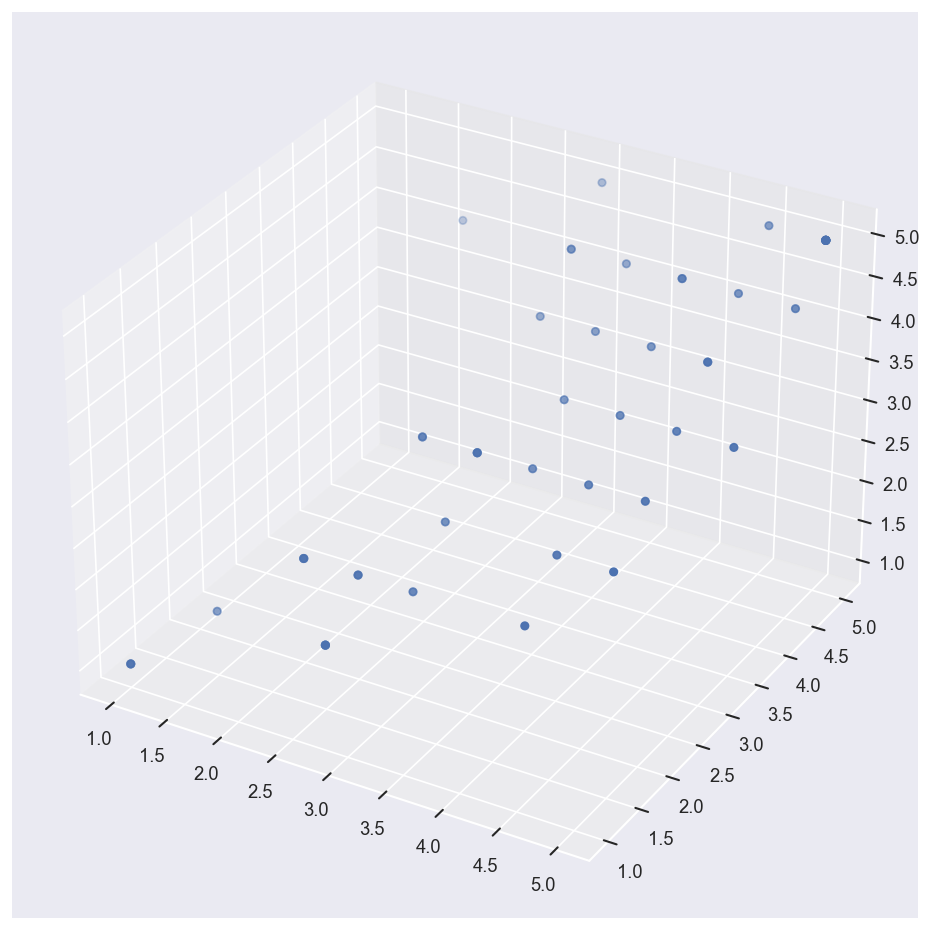

In [343]:
x=[df[elder_dev_tasks_avg[0]]]
y=[df[elder_dev_tasks_avg[1]]]
z=[df[elder_dev_tasks_avg[1]]]


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)

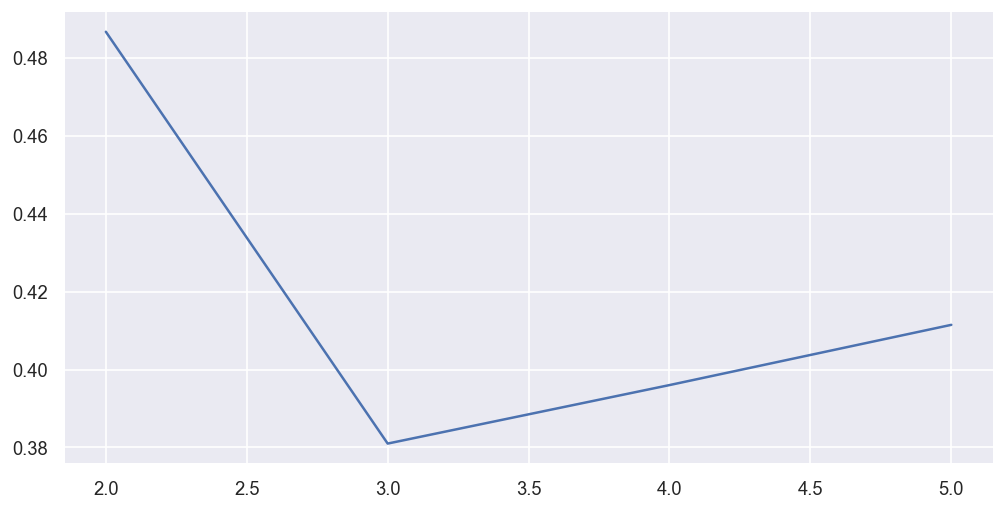

In [344]:
# Running Sil Scores

sil_scores=[]
K_vals=[2, 3, 4, 5]
for K in K_vals:
    kmeans=KMeans(n_clusters=K)
    kmeans.fit(X)
    sil_score=silhouette_score(X, kmeans.labels_)
    sil_scores.append(sil_score)
    
plt.plot(K_vals, sil_scores)

In [345]:
# Setting up our clustering data

X=df[elder_dev_tasks_avg]
y=df['Meta-Factor Total']

It seems as if two clusters is the best

In [346]:
# k-Means with k=2

K=2
kmeans=KMeans(n_clusters=K)
y_pred=kmeans.fit_predict(X)

for i in range(len(y)):
    print('Meta-Factor Total',y[i], 'Group:', y_pred[i])

Meta-Factor Total 4.2 Group: 1
Meta-Factor Total 4.0 Group: 1
Meta-Factor Total 2.6 Group: 0
Meta-Factor Total 4.4 Group: 1
Meta-Factor Total 2.4 Group: 0
Meta-Factor Total 5.0 Group: 1
Meta-Factor Total 4.2 Group: 1
Meta-Factor Total 4.0 Group: 1
Meta-Factor Total 4.6 Group: 1
Meta-Factor Total 3.6 Group: 1
Meta-Factor Total 5.0 Group: 1
Meta-Factor Total 3.0 Group: 0
Meta-Factor Total 4.6 Group: 1
Meta-Factor Total 5.0 Group: 1
Meta-Factor Total 3.3 Group: 1
Meta-Factor Total 3.2 Group: 0
Meta-Factor Total 4.9 Group: 1
Meta-Factor Total 4.7 Group: 1
Meta-Factor Total 3.2 Group: 0
Meta-Factor Total 3.6 Group: 1
Meta-Factor Total 3.1 Group: 0
Meta-Factor Total 2.4 Group: 0
Meta-Factor Total 4.6 Group: 1
Meta-Factor Total 4.5 Group: 1
Meta-Factor Total 4.0 Group: 0
Meta-Factor Total 3.6 Group: 0
Meta-Factor Total 3.1 Group: 0
Meta-Factor Total 4.5 Group: 1
Meta-Factor Total 3.1 Group: 1
Meta-Factor Total 4.2 Group: 1
Meta-Factor Total 4.8 Group: 1
Meta-Factor Total 3.5 Group: 1
Meta-Fac

It seems that group 0 is associated with higher Comp Meta scores. Let's recode the Comp Meta scores as high or low and then see how accurate these groups are. We find that 3.2-3.9 as the cutoff gives us the highest accuracy. We will go with 3.5

In [347]:

labels=[]
for val in y:
    if val <= 3.5:
        labels.append(1) # Low group
    else:
        labels.append(0) # High group


correct=[]
for i in range(len(y)):
    if labels[i] == y_pred[i]:
        correct.append(1)
        
print('The percentage correct is:', 100*round(len(correct)/len(y),4))

The percentage correct is: 17.31


In [348]:
# Viewing the cluster means

print('Both Clusters:',kmeans.cluster_centers_,'\n')
print('First Cluster:', kmeans.cluster_centers_[0],'\n')
print('Second Cluster:', kmeans.cluster_centers_[1])

Both Clusters: [[2.31578947 2.10526316 2.23684211]
 [4.13636364 4.07575758 4.39393939]] 

First Cluster: [2.31578947 2.10526316 2.23684211] 

Second Cluster: [4.13636364 4.07575758 4.39393939]


In [349]:
# Viewing their relationship with the factors

for i in range(len(elder_dev_tasks_avg)):
    print(elder_dev_tasks_avg[i],round(kmeans.cluster_centers_[0][i],2))

Generativity: Average 2.32
Keeper of Meaning: Average 2.11
Ego Integrity: Average 2.24


In [350]:
# Top 3

ordered_cluster=list(kmeans.cluster_centers_[0].copy())
ordered_cluster.sort(reverse=True)


print('Top 2 Factors Most Indicative of a High Score for k-Means Clustering:')
for i in range(2):
    score=ordered_cluster[i]
    index=list(kmeans.cluster_centers_[0]).index(score)
    factor=elder_dev_tasks_avg[index]
    print(factor, round(score,2))

Top 2 Factors Most Indicative of a High Score for k-Means Clustering:
Generativity: Average 2.32
Ego Integrity: Average 2.24


These are the same factors and in the same order as the Linear Regression found.